# Modeling the Joint Distribution of Wind Speed and Direction  using Gaussain Mixture Models

OEN Method: Harris, Cook
The parent wind speed distribution: Why Weibull?
http://www.sciencedirect.com/science/article/pii/S0167610514001056

Gaussian Mixture Models, 
http://scikit-learn.org/stable/modules/mixture.html

# 1. Set up

## 1.1 Environment

In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
%load_ext rpy2.ipython
%R require(movMF)

from import_file import *
from helpers.parallel_helper import *
load_libs()

plt.rcParams['axes.autolimit_mode'] = 'round_numbers'
plt.rcParams['axes.xmargin'] = 0.
plt.rcParams['axes.ymargin'] = 0.
mpl.rcParams['patch.force_edgecolor'] = True

In [2]:
mpl.rcParams['legend.handlelength'] = 1.8

In [3]:
# mpl.rcParams['savefig.dpi'] = 600
# pdf_fig_size=(3.2, 2.2)
pdf_fig_size=(3.5, 2.5)

## 1.2 Read Data

In [4]:
# file_path, bandwidth= './data/NCDC/europe/uk/marham/dat.txt', 1.7
# file_path, bandwidth= './data/NCDC/europe/uk/tiree/dat.txt', 1.9
# file_path, bandwidth, NUMBER_OF_GAUSSIAN = './data/NCDC/europe/uk/boscombe_down/dat.txt', 1.5, 4
# file_path, bandwidth= './data/NCDC/europe/uk/middle_wallop/dat.txt', 1.3
# file_path, bandwidth= './data/NCDC/europe/uk/bournemouth/dat.txt',1.3 # 4?
# file_path= "./data/NCDC/europe/uk/weybourne/dat.txt"
# file_path= "./data/NCDC/europe/uk/skye_lusa/dat.txt" # 
# file_path= "./data/NCDC/europe/uk/wattisham/dat.txt"
# file_path= "./data/NCDC/europe/uk/south_uist_range/dat.txt" # inpropoer direction R square measure
# file_path= "./data/NCDC/europe/uk/holbeach/dat.txt" # inpropoer direction R square measure
# file_path= "./data/NCDC/europe/uk/cambridge/dat.txt" # inpropoer direction R square measure
# file_path= "./data/NCDC/europe/us/baltimore/dat.txt" # time too short
# file_path= "./data/NCDC/europe/uk/bealach_na_ba/dat.txt" # time too short
# file_path= "./data/NCDC/europe/uk/benbecula/dat.txt" # truncate (untruncate in m/s), 4?
# file_path= './data/NCDC/europe/uk/southhamption/dat.txt' # high 0, trend

# file_path, bandwidth, NUMBER_OF_GAUSSIAN = "./data/NCDC/europe/germany/landsberg_lech/dat.txt", 0.9, 4 
# file_path, bandwidth= "./data/NCDC/europe/germany/neuburg/dat.txt", 0.7
# file_path, bandwidth= "./data/NCDC/europe/germany/laupheim/dat.txt", 0.7 # double peak, 4?, trend
# file_path, bandwidth= './data/NCDC/europe/germany/niederstetten/dat.txt', 0.9 # get the peak
# file_path, bandwidth= "./data/NCDC/europe/germany/holzdorf/dat.txt", 0.9 # 2008 year
# file_path,  NUMBER_OF_GAUSSIAN= './data/NCDC/europe/france/nantes/dat.txt', 4 # unit shift, one direction deviate big
# file_path= './data/NCDC/europe/france/pau_pyrenees/dat.txt'# unit shift, 2; 
# file_path= "./data/NCDC/europe/france/avord/dat.txt" # try 4, initial speed (should be good with m/s), incompete dataset
# file_path= "./data/NCDC/europe/france/vatry/dat.txt"  # double peak, initial speed, incompete dataset
# file_path, bandwidth, NUMBER_OF_GAUSSIAN= "./data/NCDC/europe/spain/valladolid/dat.txt", 1.1, 4
# file_path= './data/NCDC/europe/spain/jerez/dat.txt' # high 0
# file_path, bandwidth= "./data/NCDC/europe/spain/barayas/dat.txt", 0.7 # not good fit
# file_path, bandwidth= './data/NCDC/europe/spain/malaga/dat.txt', 0.7 # directions blocked?
# file_path, bandwidth= './data/NCDC/europe/spain/tenerife_sur/dat.txt', 0.7 # directions blocked?
# file_path, bandwidth= './data/NCDC/europe/spain/almeria/dat.txt', 0.7 # negative dimensions?
# file_path, bandwidth= './data/NCDC/europe/greece/eleftherios_intl/dat.txt',0.7 # some direction might be blocked
# file_path= './data/NCDC/europe/ciampino/dat.txt' # try 4, bandwidth?; time irregular
# file_path= "./data/NCDC/europe/huspel_aws/dat.txt"  # integer, 4?
# file_path= './data/NCDC/gibraltar/dat.txt' # bad fit

# MidEast
# file_path= './data/NCDC/mideast/uae/al_maktoum/dat.txt'
# file_path= './data/NCDC/mideast/uae/sharjah_intl/dat.txt' 
# file_path= './data/NCDC/mideast/uae/dubai_intl/dat.txt' 
# file_path= './data/NCDC/mideast/uae/abu_dhabi_intl/dat.txt' # Time shift
# file_path= './data/NCDC/mideast/uae/bateen/dat.txt' # Time shift
# file_path= './data/NCDC/mideast/buraimi/dat.txt' # not good dataset
# file_path= './data/NCDC/mideast/turkey/konya/dat.txt' 
# file_path= './data/NCDC/mideast/turkey/sivas/dat.txt' # bad dataset
# file_path= './data/NCDC/mideast/turkey/balikesir/dat.txt' # bad dataset
# file_path= './data/NCDC/mideast/turkey/bartin/dat.txt' # bad dataset

# file_path, bandwidth = "./data/NCDC/cn/shanghai/hongqiao_intl/dat.txt", 0.6
# file_path, bandwidth= "./data/NCDC/cn/shanghai/pudong/dat.txt", 0.8
# file_path, bandwidth= "./data/NCDC/cn/hefei_luogang/dat.txt", 0.6 # few 0, trend
# file_path, bandwidth= "./data/NCDC/cn/nanjing_lukou/dat.txt", 0.5
# file_path= "./data/NCDC/cn/zhengzhou_xinzheng/dat.txt" 
# file_path= "./data/NCDC/cn/tianjin/binhai/dat.txt" # few 0, trend, stationary speed, unstationary direction
# file_path= "./data/NCDC/cn/tianjin/tianjing/dat.txt" # 16 sectors
# file_path= "./data/NCDC/cn/shijiazhuang_zhengding/dat.txt" 
# file_path= "./data/NCDC/cn/henan_gushi/dat.txt" # 16 sectors, fit not very good
# file_path= "./data/NCDC/cn/nanning_wuxu/dat.txt" # unstationary speed
# file_path= './data/NCDC/cn/macau/dat.txt'  
# file_path= "./data/NCDC/cn/hk_intl/dat.txt" # few 0
# file_path= './data/NCDC/cn/gaoqi/dat.txt' 

# file_path= './data/NCDC/southeast_asia/malaysia/mersing/dat.txt' # 2 mode, paper comparison
# file_path= './data/NCDC/southeast_asia/malaysia/penang/dat.txt'
# file_path= './data/NCDC/southeast_asia/malaysia/butterworth/dat.txt' # 2 mode 
# file_path= "./data/NCDC/southeast_asia/malaysia/bsultan_mahmud/dat.txt" # stable
# file_path= "./data/NCDC/southeast_asia/malaysia/bsultan_ismail/dat.txt" # 
# file_path= "./data/NCDC/southeast_asia/singapore/changi/dat.txt" # trend, no 0, questionary data
# file_path= "./data/NCDC/southeast_asia/singapore/paya_lebar/dat.txt" # questionary data
# file_path= "./data/NCDC/southeast_asia/singapore/seletar/dat.txt"
# file_path= "./data/NCDC/east_asia/cheongju_intl/dat.txt" # 2005-2009  may have problem, fit is good; numpy problem
# file_path= "./data/NCDC/east_asia/daegu_ab/dat.txt" # recent 5 year may have problem, but fit is generally good; numpy problem

# file_path, bandwidth= "./data/NCDC/oceania/auckland_intl/dat.txt", 0.9  # Good data, double mode
# file_path= "./data/NCDC/oceania/brisbane_archerfield/dat.txt" # high 0, few data 
# file_path= "./data/NCDC/oceania/narrandera/dat.txt" # high 0, few data
# file_path, bandwidth= "./data/NCDC/oceania/canberra/dat.txt", 0.7 # high 0, bad fit
# file_path, bandwidth, NUMBER_OF_GAUSSIAN= './data/NCDC/oceania/horsham/dat.txt', 0.9, 4 # get the peak

# file_path, bandwidth= './data/NCDC/us/boston_16nm/dat.txt', 0.9 # Offshore, mixed type

# file_path= 'D:/data/NCDC/altdorf/dat.txt' 
# file_path= 'D:/data/NCDC/san_fran_bay_reserve/dat.txt'
# file_path= 'D:/data/NCDC/veracurz_harbor/dat.txt', # Dir problem
# file_path= 'D:/data/NCDC/senj/dat.txt', # Bad dir, may be update in recent years?
# file_path= 'D:/data/NCDC/leninogorsk/dat.txt', # Bad dir

# file_path, bandwidth, NUMBER_OF_GAUSSIAN = './data/asos/minneapolis_MN/hr_avg.csv', 1.1, 4
# file_path, bandwidth, NUMBER_OF_GAUSSIAN  = './data/asos/bismarck_ND/hr_avg.csv', 1.1, 4
# file_path, bandwidth, NUMBER_OF_GAUSSIAN = './data/asos/aberdeen_SD/hr_avg.csv', 1.7, 2 # only to 2012
# file_path, bandwidth = './data/asos/lincoln_NE/hr_avg.csv', 0.9
# file_path, bandwidth = './data/asos/des_moines_IA/hr_avg.csv', 1.3
# file_path, bandwidth = './data/asos/springfield_IL/hr_avg.csv', 1.1 
# file_path, bandwidth = './data/asos/denver/hr_avg.csv', 1.3
# file_path= 'D:/data/asos/olympia_WA/hr_avg.csv'
# file_path= 'D:/data/asos/olympia_WA/minute_avg.csv'
# file_path= 'D:/data/asos/topeka_KS/hr_avg.csv' # High 0
# file_path, bandwidth = 'D:/data/asos/topeka_KS/minute_avg.csv', 0.9 

# file_path, bandwidth, NUMBER_OF_GAUSSIAN = './data/NDAWN/baker/hr_avg.csv', 0.7, 4 
# file_path, bandwidth = './data/NDAWN/dickinson/hr_avg.csv', 0.6
# file_path = './data/NDAWN/rugby/hr_avg.csv'
# file_path = './data/NDAWN/bowman/hr_avg.csv'
# file_path = './data/NDAWN/grand_forks/hr_avg.csv'
# file_path = './data/NDAWN/williston/hr_avg.csv'
# file_path = './data/NDAWN/jamestown/hr_avg.csv'

# file_path= 'data/ECMWF/yemen/13N42E/dat.csv'
# file_path= 'data/ECMWF/spain/28N16W/dat.csv'
# file_path= 'data/ECMWF/usa/56N88W/dat.csv'
# file_path, bandwidth, NUMBER_OF_GAUSSIAN= 'data/ECMWF/usa/38N122W/dat.csv', 0.7, 4
# file_path= 'data/ECMWF/usa/47N123W/dat.csv'
# file_path, bandwidth, NUMBER_OF_GAUSSIAN = 'data/ECMWF/usa/47N123W/dat.csv', 0.4, 4 #good
file_path, bandwidth = 'data/ECMWF/usa/48.75N98.25W/dat.csv', 0.8# Olga, good accordance; might have overfitting problem in 4
# file_path, bandwidth= 'data/ECMWF/venezuela/8N67W/dat.csv', 0.3 # good, but the data might be problematic.
# file_path = 'D:/ECMWF/8N68W/dat.csv' 
# file_path = 'D:/ECMWF/9N68W/dat.csv' 
# file_path, bandwidth = 'data/ECMWF/chile/52S75W/dat.csv', 1.1 # good
# file_path, bandwidth = 'data/ECMWF/iceland/65N17W/dat.csv', 1.1 # good
# file_path, NUMBER_OF_GAUSSIAN  = 'data/ECMWF/germany/49N9E/dat.csv', 4 # good
# file_path, bandwidth= 'data/ECMWF/sudan/18N32E/dat.csv', 0.5 # good, good for angular linear
# file_path= 'data/ECMWF/china/24N121E/dat.csv'# good
# file_path, NUMBER_OF_GAUSSIAN, bandwidth= 'data/ECMWF/china/20N120E/dat.csv', 2, 1.1 # China East Sea
# file_path, NUMBER_OF_GAUSSIAN, bandiwdth = 'data/ECMWF/australia/37S142E/dat.csv', 5, 0.5

# file_path= 'd:/data/ECMWF/28.5N16.5W/dat.csv' # Tenerife

# file_path, NUMBER_OF_GAUSSIAN, bandwidth= 'data/portus/cabo_de_gata/dat.csv', 4, 0.7 # need to remove 0 speed
# file_path = 'd:/data/portus/alboran/dat.csv' # problem data

# USA Comparison
# file_path = 'd:/data/ECMWF/47.25N102.75W/dat.csv' # Green R, good accordance
# file_path= 'd:/data/ECMWF/48N103W/dat.csv' # Ray W, bag accordance

# Comparison with On the select of ...
# file_path= 'data/ECMWF/greece/38N25E/dat.csv' # Andors, good accordance, good
# file_path= 'D:/data/ECMWF/36N25E/dat.csv' # Crete, bad accordance
# file_path= 'D:/data/ECMWF/37N22E/dat.csv' # Pylos, general good accordance
# file_path= 'data/ECMWF/greece/38N25E/dat.csv' # Zak, bad accordance
# file_path= 'D:/data/ECMWF/36.75N2.25W/dat.csv' # Cabo de Gata, general good accordance
# file_path= 'data/ECMWF/portugal/36N5W/dat.csv' # Mar de Alboran, bad accordance

# US offshore
# file_path = 'D:/data/NDBC/46086/10_min.csv' # strong directionality
# file_path = 'D:/data/NDBC/42057/10_min.csv' # strong directionality
# file_path = 'D:/data/NDBC/46014/10_min.csv' # strong directionality, too weird
# file_path = 'D:/data/NDBC/cdrf1/10_min.csv' 
# file_path = 'D:/data/NDBC/46081/10_min.csv'  # strong directionality
# file_path = 'D:/data/NDBC/44013/10_min.csv' 

# file_path = 'D:/data/ECMWF/32N118W/dat.csv' #46086
# file_path = 'D:/data/ECMWF/17N81W/dat.csv' # 42057
# file_path = 'D:/data/ECMWF/39N124W/dat.csv' # 46014
# file_path = 'D:/data/ECMWF/29N83W/dat.csv' #cdrf1
# file_path = 'D:/data/ECMWF/61N148W/dat.csv' #46081, big difference with NDBC
# file_path = 'D:/data/ECMWF/42N71W/dat.csv' #44013

In [5]:
if "cn_database" in file_path: 
    df = read_cn_database(file_path)
elif 'NCDC' in file_path:
    df = pd.read_csv(file_path, header=0, skipinitialspace=True, dtype={'HrMn':'object'})
    df.rename(columns={'Date':'date','Dir':'dir','Spd':'speed','Type':'type','I.1':'wind_type'}, inplace=True)
    df = df[['date','HrMn','type','dir','speed','wind_type']]
    integer_data = True
    detect_sample_time = True
elif 'NDAWN' in file_path:
    df = pd.read_csv(file_path, header=0, skipinitialspace=True, dtype={'HrMn':'object'})
    integer_data = False
    convert_to_knot = False
elif 'asos' in file_path:
    df = pd.read_csv(file_path, header=0, skipinitialspace=True, dtype={'HrMn':'object'})
    integer_data = False # may have some problem
    knot_unit = True
    convert_to_knot = False
elif 'NDBC' in file_path:
    df = pd.read_csv(file_path, header=0, skipinitialspace=True, dtype={'HrMn':'object'})
    integer_data = False
    convert_to_knot = False
    BIN_WIDTH=0.5
elif 'portus' in file_path:
    df = pd.read_csv(file_path, header=0, skipinitialspace=True)
    df['time']=pd.to_datetime(df['time'])
    df['date']=df['time'].dt.strftime('%Y%m%d').astype(int)
    df['HrMn']=df['time'].dt.strftime('%H00')
    integer_data = False
    convert_to_knot = False
    BIN_WIDTH=0.5
else:
    # ECMWF
    df = pd.read_csv(file_path, header=0, skipinitialspace=True)
    df.rename(columns={'U':'x','V':'y'}, inplace=True)
    df.x, df.y=-df.x, -df.y
    df['speed']=np.sqrt(df.x**2+df.y**2)
    df['dir']=np.degrees(np.arctan2(df.y, df.x))%360
    df['time']=pd.to_datetime('1979-01-01T00:00:00Z')+pd.to_timedelta(df['time'], unit='h')
    df['date']=df['time'].dt.strftime('%Y%m%d').astype(int)
    df['HrMn']=df['time'].dt.strftime('%H00')
    integer_data = False
    cartesian = True
    convert_to_knot = False
    BIN_WIDTH=0.5

In [6]:
df.dropna(subset=['dir','speed'], inplace=True)
if 'knot_unit' not in globals():
    knot_unit = False
if 'cartesian' not in globals():
    cartesian = False
if not {'type', 'wind_type'}.issubset(df.columns):
    df['type']='default'
    df['wind_type']='default'
if 'detect_sample_time' not in globals():
    detect_sample_time = False
if 'BIN_WIDTH' not in globals():
    BIN_WIDTH = 1
df.head()

time        lat     lon         x         y     speed  \
0 1979-01-01 00:00:00  48.750004  261.75 -6.007003 -1.468434  6.183881   
1 1979-01-01 06:00:00  48.750004  261.75 -5.749926 -0.236968  5.754807   
2 1979-01-01 12:00:00  48.750004  261.75 -4.950674 -0.303665  4.959978   
3 1979-01-01 18:00:00  48.750004  261.75 -5.490054  1.950379  5.826206   
4 1979-01-02 00:00:00  48.750004  261.75 -3.863687  3.476271  5.197358   

          dir      date  HrMn     type wind_type  
0  193.736770  19790101  0000  default   default  
1  182.359959  19790101  0600  default   default  
2  183.510019  19790101  1200  default   default  
3  160.442068  19790101  1800  default   default  
4  138.021369  19790102  0000  default   default

In [7]:
if 'NCDC' in file_path:
    lat, long = get_lat_long(file_path)
    print(lat,long)
    map_osm = folium.Map(location=[lat, long], zoom_start=4)
    folium.Marker([lat, long]).add_to(map_osm)
    display(map_osm)

In [8]:
df['time']=pd.to_datetime(df["date"].astype(str).map(str) + df["HrMn"], format='%Y%m%d%H%M')
df.set_index(['time'], inplace=True)
df['HrMn']=df['HrMn'].astype(int)
df = df.query("(dir <= 999) & (speed < 99) ")['1970':'2016']

D:\ProgramData\Anaconda3\lib\site-packages\matplotlib\__init__.py:938: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


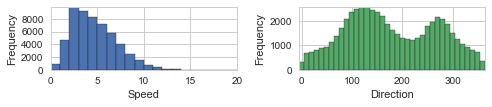

In [9]:
plot_speed_and_angle_distribution(df.speed, df.dir)

lat       lon             x             y         speed  \
count  5.552000e+04  55520.00  55520.000000  55520.000000  55520.000000   
mean   4.875000e+01    261.75     -1.023136      0.403814      4.729708   
std    3.152707e-11      0.00      3.186055      4.093201      2.396789   
min    4.875000e+01    261.75    -17.779930    -14.095932      0.065852   
25%    4.875000e+01    261.75     -2.997665     -2.488354      2.839346   
50%    4.875000e+01    261.75     -0.967118      0.583280      4.370591   
75%    4.875000e+01    261.75      1.197744      3.251902      6.225724   
max    4.875000e+01    261.75     11.594738     18.637878     19.479633   

                dir          date          HrMn  dir_windrose  
count  55520.000000  5.552000e+04  55520.000000  55520.000000  
mean     178.830542  1.997567e+07    900.000000    209.142080  
std       89.791404  1.096640e+05    670.826435    105.171154  
min        0.003026  1.979010e+07      0.000000      0.012248  
25%      108.565887  1.988070e+07    450.000000    138.823232  
50%      165.845953  1.997567e+07    900.000000    217.278887  
75%      259.333867  2.007070e+07   1350.000000    303.251672  
max      359.991104  2.016123e+07   1800.000000    359.997332

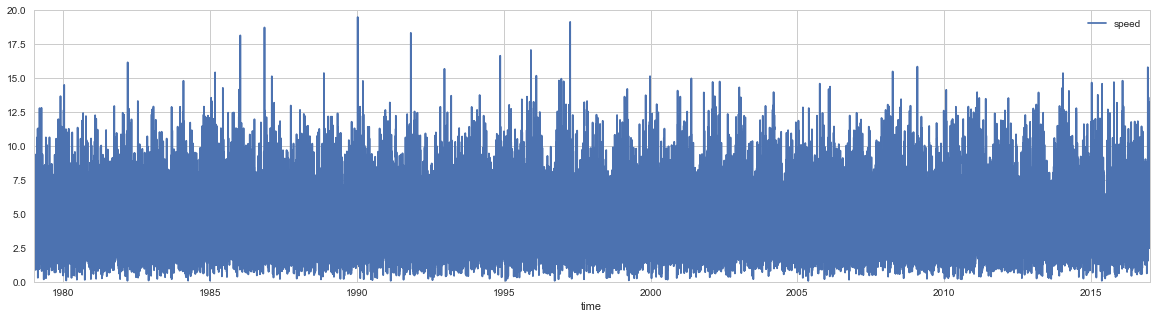

In [10]:
# Dir [10,360]=> [0,350]
df['dir'] = df['dir'].apply(lambda x: x%360 if x < 999 else x) 
# Convert Windrose coordianates to Polar Cooridinates 
if cartesian == True:
    df['dir_windrose'] = df['dir'].apply(lambda x: (90 - x)%360 if x < 999 else x)
else:
    df['dir_windrose'] = df['dir']
    df['dir'] = df['dir'].apply(lambda x: (90 - x)%360 if x < 999 else x)
display(df.describe())
df.plot(y='speed',legend=True,figsize=(20,5))

In [11]:
if "portus" in file_path: 
    df = df.query('speed >0 ')
    N_VM_DIR = 5
    N_VM_PHI = 2
else:
    N_VM_DIR = 4
    N_VM_PHI = 3

In [12]:
# if "portus" in file_path: 
#     df['dir'] = df['dir_windrose']

## 1.3 General Data Info

### 1.3.1 Unit Detection

False


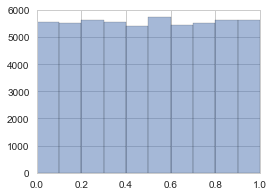

In [13]:
df['decimal'] = df.speed % 1
df.decimal.hist(alpha=0.5, label='m/s', figsize=(4, 3))

if 'convert_to_knot' not in globals():
    convert_to_knot = True if len(df.query('decimal >= 0.2')) / len(df) > 0.3 else False
    
if convert_to_knot:
    knot_unit = True
    df['speed'] = df['speed'] * 1.943845
    df['decimal'] = df.speed % 1
    df.decimal.hist(alpha=0.5, label='knot')
    # need more elaboration, some is not near an integer
    if integer_data:
        df['speed'] = df['speed'].apply(lambda x: int(round(x)))
    plt_configure(xlabel='Decimal', ylabel='Frequency', legend={'loc': 'best'}, title='Decimal Distribution')
    
df.drop(['decimal'], 1,inplace=True)
print(knot_unit)

In [14]:
dir_unit_text = ' (degree)'
if knot_unit == True:
    speed_unit_text = ' (knot)'
    bare_speed_unit_text = ' knot'
    dir_power_density_unit=''
    speed_power_density_unit=''
else: 
    speed_unit_text = ' (m/s)'
    bare_speed_unit_text = ' m/s'
    dir_power_density_unit=' (W/(m$^2$rad))'
    speed_power_density_unit=' (W/(m$^3$/s))'

### 1.3.2 Sampling Type Selection

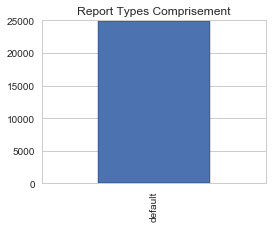

In [15]:
sample_type = df.query('date > 20000000')['type']
sample_type.value_counts().plot(
    kind = 'bar', title = 'Report Types Comprisement', figsize=(4,3))

report_type_most_used = sample_type.value_counts().argmax()
df = df.query("type==@report_type_most_used")

### 1.3.3 Sampling Time Selection

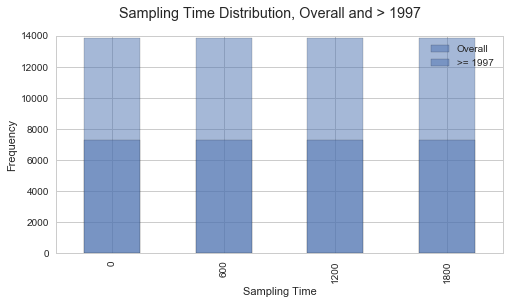

In [16]:
MID_YEAR = int(np.average(df.index.year))

df['HrMn'].value_counts().sort_index().plot(kind='bar', alpha=0.5,label='Overall')
df[str(MID_YEAR):]['HrMn'].value_counts().sort_index().plot(
    kind='bar', alpha=0.5, label='>= %s' %  MID_YEAR )

plt_configure(xlabel='Sampling Time', ylabel='Frequency', legend={'loc':'best'}, figsize=(8, 4), 
              title = 'Sampling Time Distribution, Overall and > %s ' %  MID_YEAR)

In [17]:
if detect_sample_time:
    df['sample_time'] = df.HrMn % 100 
    sample_time = df['2000':]['sample_time']
    sample_times = sample_time.value_counts()[sample_time.value_counts() > 1000]
    sample_times = sample_times.index.tolist()
    # df = df.query("sample_time in @sample_times")
    df = df.query("sample_time == @sample_times[0]")
    df.drop(['sample_time'], 1,inplace=True)
    print(sample_times)

    df['HrMn'].value_counts().sort_index().plot(kind='bar', alpha=0.5, figsize=(10, 4))
else:
    sample_times = 'Default'

## 1.4 Error Data handling and Adjustment

### 1.4.1 Artefacts

wrong direction record

In [18]:
if integer_data:
    display(df.query("(dir % 10 >= 0.1) & (dir != 999)"))
    df = df.query('(dir % 10 <= 0.1) | (dir == 999)')

sudden increase in speed

lat     lon          x          y      speed  \
time                                                                      
1990-01-11 00:00:00  48.750004  261.75 -17.779930   7.958027  19.479633   
1997-04-06 12:00:00  48.750004  261.75  -4.277940  18.637878  19.122533   
1986-11-08 18:00:00  48.750004  261.75  -4.474408  18.172195  18.714940   
1991-11-02 18:00:00  48.750004  261.75  -6.707623  17.043182  18.315629   
1986-01-12 00:00:00  48.750004  261.75 -17.087730   6.062214  18.131215   
1986-01-12 06:00:00  48.750004  261.75 -13.533293  11.584434  17.814296   
1997-04-06 06:00:00  48.750004  261.75  -0.293014  17.183838  17.186336   
1995-12-05 06:00:00  48.750004  261.75 -16.719627   3.378800  17.057615   
1986-11-09 00:00:00  48.750004  261.75  -6.050271  15.929230  17.039547   
1997-04-06 18:00:00  48.750004  261.75  -8.313403  14.840424  17.010316   

                            dir      date  HrMn     type wind_type  \
time                                                                 
1990-01-11 00:00:00  155.887435  19900111     0  default   default   
1997-04-06 12:00:00  102.927150  19970406  1200  default   default   
1986-11-08 18:00:00  103.832373  19861108  1800  default   default   
1991-11-02 18:00:00  111.482928  19911102  1800  default   default   
1986-01-12 00:00:00  160.466842  19860112     0  default   default   
1986-01-12 06:00:00  139.436633  19860112   600  default   default   
1997-04-06 06:00:00   90.976896  19970406   600  default   default   
1995-12-05 06:00:00  168.575199  19951205   600  default   default   
1986-11-09 00:00:00  110.797876  19861109     0  default   default   
1997-04-06 18:00:00  119.256954  19970406  1800  default   default   

                     dir_windrose     incre  incre_reverse  
time                                                        
1990-01-11 00:00:00    294.112565  5.992479       2.604981  
1997-04-06 12:00:00    347.072850  1.936197       2.112217  
1986-11-08 18:00:00    346.167627  2.116829       1.675394  
1991-11-02 18:00:00    338.517072  5.434352       6.738152  
1986-01-12 00:00:00    289.533158  1.644122       0.316919  
1986-01-12 06:00:00    310.563367 -0.316919       2.973535  
1997-04-06 06:00:00    359.023104  3.444777      -1.936197  
1995-12-05 06:00:00    281.424801  8.543028       0.263885  
1986-11-09 00:00:00    339.202124 -1.675394       3.948616  
1997-04-06 18:00:00    330.743046 -2.112217       4.005011

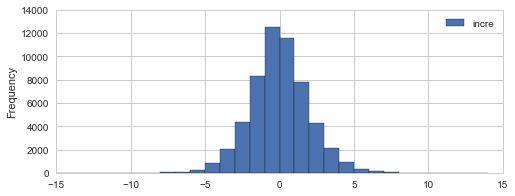

In [19]:
# sudden increse
df['incre'] = df.speed.diff(1)
df['incre'].fillna(0, inplace=True)
df['incre_reverse'] = df.speed.diff(-1)
df['incre_reverse'].fillna(0, inplace=True)

display(df.sort_values(by='speed',ascending=False).head(10))
df['incre'].plot(kind='hist', bins=arange(-15, 15), legend=True, figsize=(8, 3))

In [20]:
incre_threshold = 20 if knot_unit else 10
print('sudden increase number', len(df.query('(incre > @incre_threshold )&(incre_reverse > @incre_threshold )')))
df = df.query('(incre < @incre_threshold )|(incre_reverse < @incre_threshold )')

# Check the max speed
display(df.sort_values(by='speed',ascending=False).head(10))
df.drop(['incre', 'incre_reverse'], 1, inplace=True)

sudden increase number 0


lat     lon          x          y      speed  \
time                                                                      
1990-01-11 00:00:00  48.750004  261.75 -17.779930   7.958027  19.479633   
1997-04-06 12:00:00  48.750004  261.75  -4.277940  18.637878  19.122533   
1986-11-08 18:00:00  48.750004  261.75  -4.474408  18.172195  18.714940   
1991-11-02 18:00:00  48.750004  261.75  -6.707623  17.043182  18.315629   
1986-01-12 00:00:00  48.750004  261.75 -17.087730   6.062214  18.131215   
1986-01-12 06:00:00  48.750004  261.75 -13.533293  11.584434  17.814296   
1997-04-06 06:00:00  48.750004  261.75  -0.293014  17.183838  17.186336   
1995-12-05 06:00:00  48.750004  261.75 -16.719627   3.378800  17.057615   
1986-11-09 00:00:00  48.750004  261.75  -6.050271  15.929230  17.039547   
1997-04-06 18:00:00  48.750004  261.75  -8.313403  14.840424  17.010316   

                            dir      date  HrMn     type wind_type  \
time                                                                 
1990-01-11 00:00:00  155.887435  19900111     0  default   default   
1997-04-06 12:00:00  102.927150  19970406  1200  default   default   
1986-11-08 18:00:00  103.832373  19861108  1800  default   default   
1991-11-02 18:00:00  111.482928  19911102  1800  default   default   
1986-01-12 00:00:00  160.466842  19860112     0  default   default   
1986-01-12 06:00:00  139.436633  19860112   600  default   default   
1997-04-06 06:00:00   90.976896  19970406   600  default   default   
1995-12-05 06:00:00  168.575199  19951205   600  default   default   
1986-11-09 00:00:00  110.797876  19861109     0  default   default   
1997-04-06 18:00:00  119.256954  19970406  1800  default   default   

                     dir_windrose     incre  incre_reverse  
time                                                        
1990-01-11 00:00:00    294.112565  5.992479       2.604981  
1997-04-06 12:00:00    347.072850  1.936197       2.112217  
1986-11-08 18:00:00    346.167627  2.116829       1.675394  
1991-11-02 18:00:00    338.517072  5.434352       6.738152  
1986-01-12 00:00:00    289.533158  1.644122       0.316919  
1986-01-12 06:00:00    310.563367 -0.316919       2.973535  
1997-04-06 06:00:00    359.023104  3.444777      -1.936197  
1995-12-05 06:00:00    281.424801  8.543028       0.263885  
1986-11-09 00:00:00    339.202124 -1.675394       3.948616  
1997-04-06 18:00:00    330.743046 -2.112217       4.005011

### 1.4.2 Direction re-aligment 
For some dataset, the 16 sectors are not record properly,

e.g. the sectors are [0,20,50 ...], need to redistribute the angle into 22.5, e.g. [0, 22.5, 45...]

In [21]:
display(df['dir'].value_counts().sort_index())
effective_column = df.query('dir < 999')['dir'].value_counts()[df['dir'].value_counts() > 30].sort_index()
if 'SECTOR_LENGTH' not in globals():
    if integer_data:
        SECTOR_LENGTH = 360/len(effective_column) 
    else: 
        SECTOR_LENGTH = 10
print(len(effective_column), SECTOR_LENGTH)

0.003026      1
0.024999      1
0.043512      1
0.095594      1
0.101178      1
0.152644      1
0.159109      1
0.164975      1
0.174803      1
0.184286      1
0.184784      1
0.189856      1
0.194780      1
0.197551      1
0.202469      1
0.226156      1
0.239702      1
0.242288      1
0.257882      1
0.258034      1
0.266782      1
0.275204      1
0.284157      1
0.301771      1
0.312160      1
0.313661      1
0.335668      1
0.339468      1
0.345943      1
0.422797      1
             ..
359.648288    1
359.692081    1
359.704991    1
359.709218    1
359.713566    1
359.726712    1
359.742328    1
359.750869    1
359.764612    1
359.779436    1
359.781165    1
359.804539    1
359.811885    1
359.815428    1
359.823268    1
359.827777    1
359.834705    1
359.842399    1
359.849495    1
359.850159    1
359.858650    1
359.874073    1
359.881292    1
359.899789    1
359.964413    1
359.969737    1
359.976378    1
359.981613    1
359.984731    1
359.991104    1
Name: dir, Length: 55520

0 10


In [22]:
if integer_data:
    df=realign_direction(df, effective_column)

### 1.4.3 0 Speed

In [23]:
with_too_many_zero, null_wind_frequency = is_with_too_many_zero(df['2005':])
delete_zero = with_too_many_zero
if delete_zero:
    df = df.query('(speed > 0)')
print(delete_zero, null_wind_frequency)

False 0.0155144877937


Series([], Name: speed, dtype: int64)


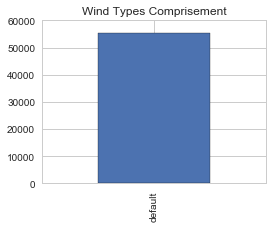

In [24]:
print(df.query('dir == 999')['speed'].value_counts())
df=fill_direction_999(df, SECTOR_LENGTH, integer_data)

## 1.5 Time Shift Comparison

In [25]:
display(df[df['dir'].isnull()])
df.dropna(subset=['dir'], inplace=True)

Empty DataFrame
Columns: [lat, lon, x, y, speed, dir, date, HrMn, type, wind_type, dir_windrose]
Index: []

1979 - 1980


D:\ProgramData\Anaconda3\lib\site-packages\matplotlib\__init__.py:938: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


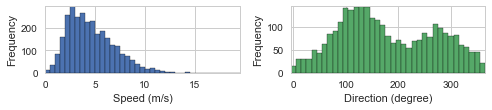

1981 - 1985


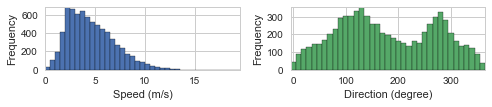

1986 - 1990


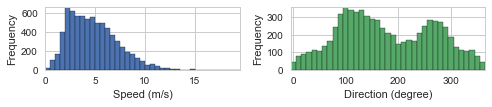

1991 - 1995


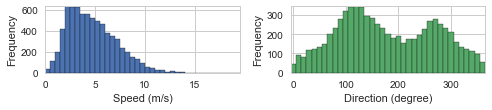

1996 - 2000


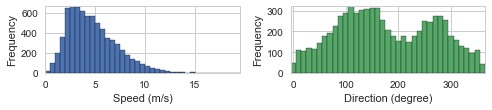

2001 - 2005


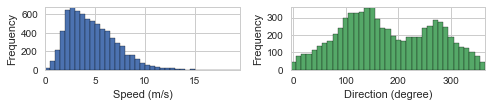

2006 - 2010


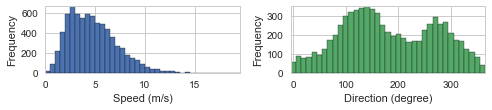

2011 - 2015


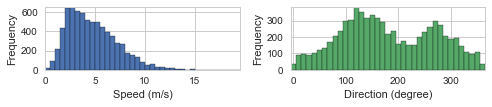

2016 - 2016


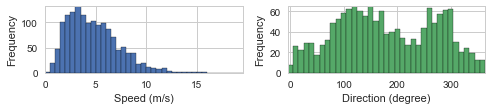

In [26]:
# Inspect the time shift of speed and degree distribution, and odd-even bias
check_time_shift(df, speed_unit_text=speed_unit_text, dir_unit_text=dir_unit_text, bin_width=BIN_WIDTH)

In [27]:
# def plot_speed(df_speed, speed_limit, title=None):
#     bin_width=1
#     bins = np.arange(0, speed_limit + bin_width, bin_width)
#     df_speed.hist(bins=bins)
#     plt.locator_params(axis='y', nbins=5)
#     plt_configure(xlabel="Speed"+speed_unit_text, ylabel="Frequency", tight='y', figsize=(2.7,1.2), title=title)
#     plt.show()

In [28]:
# init_time = (myround(df.date.min() // 10000, 5)+1) * 10000
# speed_limit = df['speed'].quantile(0.999)
# for start_time in range(init_time, 20200000, 50000):
#     end_time = min(start_time + 50000, df.date.max() + 10000)
#     sub_df = df.query('(date >= @start_time) & (date < @end_time)')
#     if len(sub_df) > 0:
#         title = '%s - %s' % (sub_df.date.min() // 10000, sub_df.date.max() // 10000)
#         print(title)
#         plot_speed(sub_df.speed, speed_limit=speed_limit, title=title)

(0, 7.0)

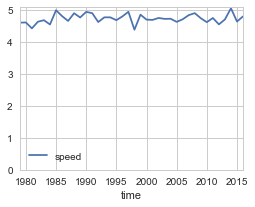

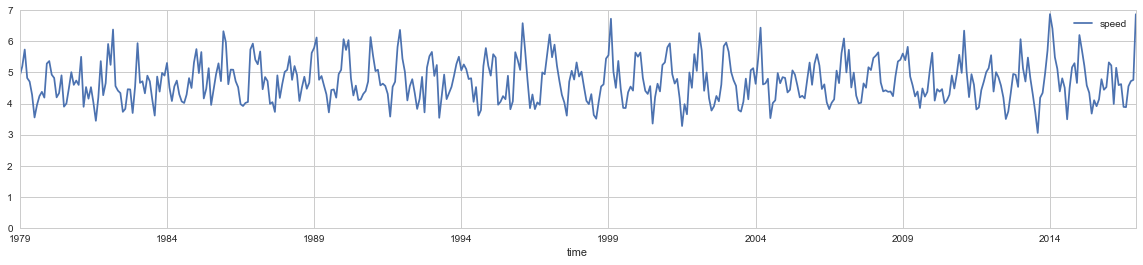

In [29]:
df.resample('A').mean().plot(y='speed', figsize=(4,3))
plt.gca().set_ylim(bottom=0)
df.resample('M').mean().plot(y='speed', figsize=(20,4))
plt.gca().set_ylim(bottom=0)

In [30]:
for column in ['speed', 'dir']:
    if column == 'speed':
        bins = arange(0, df[column].max()+BIN_WIDTH, BIN_WIDTH)
    else:
        bins = arange(0, 361, 10)
    density_all, _ = np.histogram(df[column], bins=bins, density=True)
    df[column].hist(bins=bins, figsize=(5,3))

    R_squares, years = [], []
    for year in arange(1980, 2016):
        sub_df = df[str(year-1):str(year+1)]
        if len(sub_df) > 1000:
            current_density, _ = np.histogram(sub_df[column], bins=bins, density=True)
            R_square = sector_r_square(density_all, current_density)
            R_squares.append(R_square)
            years.append(year)

    plt.figure()
    plot(years, R_squares)
    ylim = max(min(plt.gca().get_ylim()[0],0.85),0)
    plt.gca().set_ylim(bottom=ylim, top=1)
    plt_configure(figsize=(5,3))
    align_figures()

<img style="margin:0" align="left" src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAUwAAADECAYAAAD0+hheAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAALEgAACxIB0t1+/AAAF6lJREFUeJzt3X9Q0/f9B/DnJ0AQk6Clnbvdl9IBJXc6j5Ufo+15Yv2u
Lb3NVms1NnG4ndqv5Xo6uBWDCqKHU7mVdMMrq2z0tgsFxrRbN/er0zm4Q8p1n862ooxbvo47tbWI
tSYRgg3v7x898jVNTD5APiHg83HXu/p+vwOvzyfhSfL5vN9vJCGEABERhaWZ7gKIiGYKBiYRkUIM
TCIihRiYREQKMTCJiBRiYBIRKRSvZNDTTz8NvV4PAEhNTcXzzz+PiooKSJKErKwsVFdXQ6PRoL29
HW1tbYiPj0dJSQmWL1+OkZERlJeXY2hoCDqdDrW1tUhJSVH1oIiIVCHCGBkZEStXrvRr27Jli3j7
7beFEEJUVVWJt956S3z88cdixYoVwuPxiOvXr/v+/7XXXhP19fVCCCGOHTsmampqwn1LIqKYFPYj
eV9fH4aHh7Fx40Zs2LABp0+fRm9vLwoKCgAAhYWFOHXqFN5//33k5ORAq9XCYDAgLS0NfX19kGUZ
S5cu9Y3t7u5W9zcAEZFKwn4knzNnDjZt2oS1a9fiP//5D5577jkIISBJEgBAp9PB6XTC5XLBYDD4
HqfT6eByufzax8eGI8vyZI+HiCikvLy8ST82bGCmp6fjvvvugyRJSE9Px/z589Hb2+vrd7vdSE5O
hl6vh9vt9ms3GAx+7eNjlZjKQUVKf38/thw8Dv1d/xXQ5/rkIg5XPAqj0RiVWmRZjolzArCW22Et
wcVaLVMR9iP5kSNHcPDgQQDA5cuX4XK5sGTJEvT09AAAOjs7kZ+fj+zsbMiyDI/HA6fTCYfDAaPR
iNzcXHR0dPjGxsqJG+f1etHf3x/0v/Pnz093eUQUQ8K+w1yzZg127NgBs9kMSZKwf/9+3HXXXaiq
qoLNZkNGRgaKiooQFxeH4uJiWCwWCCFQVlaGxMREmM1mWK1WmM1mJCQkoK6uLhrHpZjD4UDxjhbM
nbcgoG/owjncnbpwGqoiolgUNjC1Wm3QkGtubg5oM5lMMJlMfm1JSUmor6+fQonqmztvQdCP3Tc+
vTwN1RBRrOLEdSIihRiYREQKMTCJiBRiYBIRKcTAJCJSSNHmGxRIjI2FnKeZmZmJuLi4KFZERGpj
YE7SsHMQuxuvYO48R0DfjU8/hv2AJWqrgIgoOhiYU3C7+ZtENDvxGiYRkUIMTCIihfiRXAW8IUQ0
OzEwVcAbQkSzEwNTJbwhRDT78BomEZFCDEwiIoUYmERECjEwiYgUYmASESnEwCQiUojTiqIs1KR2
Tmgnim0MzCi73aR2Tmgnin0MzGnASe1EMxOvYRIRKcR3mDEi3IYdXq83itUQUTAMzBgRbsMO6/ps
FBQUTENlRDROUWAODQ1h9erVeO211xAfH4+KigpIkoSsrCxUV1dDo9Ggvb0dbW1tiI+PR0lJCZYv
X46RkRGUl5djaGgIOp0OtbW1SElJUfuYZixe2ySKbWGvYd68eRO7d+/GnDlzAAAHDhxAaWkpWlpa
IITAiRMnMDg4CLvdjra2NjQ1NcFms2F0dBStra0wGo1oaWnBqlWr0NDQoPoBERGpJew7zNraWjz7
7LNobGwEAPT29vo+GhYWFqKrqwsajQY5OTnQarXQarVIS0tDX18fZFnG5s2bfWMnEpiyLE/meCZs
YGAgKt8nEqJ1TpRgLcGxluBiqZapCBmYb7zxBlJSUrB06VJfYAohIEkSAECn08HpdMLlcsFgMPge
p9Pp4HK5/NrHxyqVl5c34YOZDIPBABz7KCrfa6qidU7CkWWZtQTBWoKLtVqmImRgHj16FJIkobu7
G+fOnYPVasXVq1d9/W63G8nJydDr9XC73X7tBoPBr318LBHRTBXyGubrr7+O5uZm2O12LFy4ELW1
tSgsLERPTw8AoLOzE/n5+cjOzoYsy/B4PHA6nXA4HDAajcjNzUVHR4dvbKz8liEimowJTyuyWq2o
qqqCzWZDRkYGioqKEBcXh+LiYlgsFgghUFZWhsTERJjNZlitVpjNZiQkJKCurk6NYyAiigrFgWm3
233/39zcHNBvMplgMpn82pKSklBfXz+F8oiIYgeXRhIRKcTAJCJSiEsjZwAxNoZLly6hv78/aD/3
0SSKDgbmDDDsHIT9pISj7x4P6OM+mkTRw8CcIbjOnGj68RomEZFCDEwiIoUYmERECjEwiYgUYmAS
ESnEu+QzXLi/BcQ5mkSRw8Cc4cL9LSDO0SSKHAbmLMA5mkTRwWuYREQKMTCJiBRiYBIRKcTAJCJS
iIFJRKQQA5OISCEGJhGRQgxMIiKFGJhERAoxMImIFLojlkZ6vV44HIFrrQGE3LhipuPGHESRFTYw
vV4vKisrcf78eUiShL179yIxMREVFRWQJAlZWVmorq6GRqNBe3s72traEB8fj5KSEixfvhwjIyMo
Ly/H0NAQdDodamtrkZKSEo1j83E4HCje0YK58xYE9A1dOIe7UxdGtZ5o4cYcRJEVNjBPnjwJAGhr
a0NPTw9efvllCCFQWlqKBx98ELt378aJEyfwwAMPwG634+jRo/B4PLBYLFiyZAlaW1thNBqxdetW
/OEPf0BDQwMqKytVP7Avut0GFTc+vRz1WqKJG3MQRU7YwHz00UfxyCOPAAAuXbqE5ORknDp1CgUF
BQCAwsJCdHV1QaPRICcnB1qtFlqtFmlpaejr64Msy9i8ebNvbENDg3pHQ0SkIkXXMOPj42G1WvHX
v/4V9fX16OrqgiRJAACdTgen0wmXywWDweB7jE6ng8vl8msfH6uELMsTPZbbGhgYiNjXmk3OnDmj
+Pn4okg+P1PFWoJjLZGn+KZPbW0tXnzxRZhMJng8Hl+72+1GcnIy9Ho93G63X7vBYPBrHx+rRF5e
ntLSwjIYDMCxjyL29WaLxYsXT+oapizLEX1+poK1BMdagptqcIedVvTb3/4Whw8fBgAkJSVBkiQs
XrwYPT09AIDOzk7k5+cjOzsbsizD4/HA6XTC4XDAaDQiNzcXHR0dvrGxcuKIiCYq7DvMxx9/HDt2
7MD69evx2WefYefOncjMzERVVRVsNhsyMjJQVFSEuLg4FBcXw2KxQAiBsrIyJCYmwmw2w2q1wmw2
IyEhAXV1ddE4LiKiiAsbmHPnzsVPfvKTgPbm5uaANpPJBJPJ5NeWlJSE+vr6KZRIRBQbuNKHiEgh
BiYRkUIMTCIihRiYREQKMTCJiBRiYBIRKXRHbO9Ggbj1G9HEMTDvUNz6jWjiGJh3MG79RjQxvIZJ
RKQQA5OISCEGJhGRQgxMIiKFGJhERAoxMImIFGJgEhEpxMAkIlKIgUlEpBADk4hIIQYmEZFCXEtO
AcLtZOT1eqNYDVHsYGBSgHA7GVnXZ6OgoGAaKiOaXgxMCoo7GREF4jVMIiKFGJhERAqF/Eh+8+ZN
7Ny5ExcvXsTo6ChKSkpw//33o6KiApIkISsrC9XV1dBoNGhvb0dbWxvi4+NRUlKC5cuXY2RkBOXl
5RgaGoJOp0NtbS1SUlKidWxERBEV8h3m7373O8yfPx8tLS34+c9/jpqaGhw4cAClpaVoaWmBEAIn
TpzA4OAg7HY72tra0NTUBJvNhtHRUbS2tsJoNKKlpQWrVq1CQ0NDtI6LiCjiQr7DfOKJJ1BUVAQA
EEIgLi4Ovb29vjukhYWF6OrqgkajQU5ODrRaLbRaLdLS0tDX1wdZlrF582bfWAYmEc1kIQNTp9MB
AFwuF7Zt24bS0lLU1tZCkiRfv9PphMvlgsFg8Hucy+Xyax8fq5QsyxM+mNsZGBiI2Neiz0Xy+Zkq
1hIca4m8sNO

<img style="margin:0" align="left" src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAUsAAADECAYAAAAWJgMnAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAALEgAACxIB0t1+/AAAGEhJREFUeJzt3X1MFHf+B/D3PrAUdxctP9PE/DgULBurm408xObCHS1J
FWPqaS+6uV2DSYEGuJ4e9MRFBNFAbInC3WGkT/H+WZTtRi49c+ZSK+lBgpY/5q4SsJy5DUeieC3S
B3e2sgjM74/+2DvKAsO6j/B+JSb6nVnnM1/Y9+7Md74zCkmSJBAR0YKUkS6AiCgWMCyJiGRgWBIR
ycCwJCKSgWFJRCQDw5KISAb1YitMTU2hpqYGQ0NDUCgUOHXqFOLj41FVVQWFQoH09HTU1dVBqVTC
6XTC4XBArVajrKwMeXl5GB8fR2VlJcbGxqDVatHY2IikpKRw7BsRUdAs+s3yk08+AQA4HA6Ul5fj
t7/9Ld58802Ul5fj0qVLkCQJnZ2dGB0dhd1uh8PhwIULF9Dc3IyJiQm0t7fDYDDg0qVL2Lt3L1pb
W0O+U0REwbboN8uXXnoJL774IgBgZGQEiYmJuHHjBrZt2wYAyM3NRU9PD5RKJTIyMqDRaKDRaJCS
koLBwUEIgoDi4mLfugxLIopFi4YlAKjVathsNnz88cdoaWlBT08PFAoFAECr1cLtdkMURej1et9r
tFotRFGc1T6z7mIEQQhkX4iIFpWVlRXQ62SFJQA0NjbiyJEjMJvN8Hq9vnaPx4PExETodDp4PJ5Z
7Xq9flb7zLpyBLpDwSYIQlTUEi11AKxlPqzFv2irJVCLnrP88MMP8e677wIAEhISoFAoYDQa0dvb
CwDo7u5GdnY2TCYTBEGA1+uF2+2Gy+WCwWBAZmYmurq6fOtGS6cRES3Fot8sd+zYgWPHjuHAgQOY
nJxEdXU1Nm7ciNraWjQ3NyMtLQ35+flQqVQoKCiA1WqFJEmoqKhAfHw8LBYLbDYbLBYL4uLi0NTU
FI79IiIKqkXDctWqVfj9738/p72trW1Om9lshtlsntWWkJCAlpaWJyiRiCjyeFE6EZEMDEsiIhkY
lkREMjAsiYhkYFgSEcnAsCQikoFhSUQkA8OSiEgGhiURkQwMSyIiGRiWREQyMCyJiGRgWBIRycCw
JCKSgWFJRCQDw5KISAaGJRGRDLIfWEaxZ2pqCi6Xa97lGzduhEqlCmNFRLGLYbmMuVwuFBy7hFWr
n5mz7Ltvv4T9TSsMBkMEKiOKPQuG5ePHj1FdXY179+5hYmICZWVlWLduHUpKSrBhwwYAgMViwa5d
u+B0OuFwOKBWq1FWVoa8vDyMj4+jsrISY2Nj0Gq1aGxsRFJSUjj2i/7fqtXPQPf0/0a6DKKYt2BY
XrlyBWvWrMGZM2fwzTffYO/evXj99dfx6quvorCw0Lfe6Ogo7HY7Ojo64PV6YbVakZOTg/b2dhgM
Bhw6dAhXr15Fa2srampqQr5TK8lCh9pDQ0NhroZo+VowLHfu3In8/HwAgCRJUKlU6O/vx9DQEDo7
O7F+/XpUV1ejr68PGRkZ0Gg00Gg0SElJweDgIARBQHFxMQAgNzcXra2tod+jFWahQ+2xu5/jf5Kf
i0BVRMvPgmGp1WoBAKIo4vDhwygvL8fExAT2798Po9GIt99+G+fPn8emTZug1+tnvU4URYii6GvX
arVwu92yCxMEIZD9CYloqcVfHcPDw/Mean/37Rfz/l/S9DSuXbuG/v5+v8uTk5MXHPyJlj4BWMt8
WEtwLTrAc//+fbz++uuwWq3YvXs3Hj58iMTERADA9u3bUV9fj+zsbHg8Ht9rPB4P9Ho9dDqdr93j
8fheJ0dWVtZS9yUkBEGIeC1TU1P405/+BKPROGfZzAfaUj1yj8L+iQKrVs+9euz7wR/jvIM/0dAn
M1iLf6zFvycJ7QXD8sGDBygsLMSJEyfw4x//GABQVFSE2tpamEwm3Lx5E1u2bIHJZMLvfvc7eL1e
TExMwOVywWAwIDMzE11dXTCZTOju7o6aDos1LpcLjRf7sGr1v+cse5JDbQ7+EMm3YFi+8847ePjw
IVpbW33nG6uqqnD69GnExcVh7dq1qK+vh06nQ0FBAaxWKyRJQkVFBeLj42GxWGCz2WCxWBAXF4em
pqaw7NRyFMihdqCk6ekFB4empqaCvk2iaLdgWNbU1PgdvXY4HHPazGYzzGbzrLaEhAS0tLQ8YYkU
bo/cozjx3gOsWj13lP27b7+E7YAJ27Zti0BlRJHDi9LJLx6iE83GueFERDIwLImIZGBYEhHJwLAk
IpKBAzy0JNL0NEZGRnDnzh2/y3nbN1quGJa0JDMzfzr+dn3OMt72jZYzhiUtGS8ropWI5yyJiGTg
N8sowftSEkU3hmWU4H0piaIbwzKKhPNmGRQd+FC52MGwJIogPlQudjAsiSKMVxfEBo6GExHJwLAk
IpKBYUlEJAPDkohIBoYlEZEMHA2noFnsQWcr9ZpBzs5aHhYMy8ePH6O6uhr37t3DxMQEysrK8Oyz
z6KqqgoKhQLp6emoq6uDUqmE0+mEw+GAWq1GWVkZ8vLyMD4+jsrKSoyNjUGr1aKxsRFJSUnh2jcK
s8UedLZSrxnk7KzlYcGwvHLlCtasWYMzZ87gm2++wd69e7Fp0yaUl5fj+eefx4kTJ9DZ2YmtW7fC
brejo6MDXq8XVqsVOTk5aG9vh8FgwKFDh3D16lW0trb6fVokLR+8ZtA/zs6KfQuG5c6dO5Gfnw8A
kCQJKpUKAwMDvseg5ubmoqenB0qlEhkZGdBoNNBoNEhJScHg4CAEQUBxcbFv3Zlnj8shCEKg+xR0
4ahleHg45NuItP7+frjd7qD/v9H+uxLoz1aansa1a9fQ39/vd3lycvKCpzWivV9izYJhqdVqAQCi
KOLw4cMoLy9HY2MjFAqFb7nb7YYoitDr9bNeJ4rirPaZdeXKyspa8s6EgiAIYalFr9cDf/53yLcT
SUajMeiH4eH6+cgxXy2B/mxnbrS8avXccdjvT2vM35+x0C+R8CShveho+P3793Hw4EHs2bMHu3fv
hlL5n5d4PB4kJiZCp9PB4/HMatfr9bPaZ9YlIvlmDt9/+Mff+U8KrQXD8sGDBygsLERlZSX27dsH
ANi8eTN6e3sBAN3d3cjOzobJZIIgCPB6vXC73XC5XDAYDMjMzERXV5dv3Wj5dCEiWqoFD8Pfeecd
PHz4EK2trb7zjcePH0dDQwOam5uRlpaG/Px8qFQqFBQUwGq1QpIkVFRUID4+HhaLBTabDRaLBXFx
cWhqagrLThERBduCYVlTU+N39LqtrW1Om9lshtlsntWWkJCAlpaWJyyRiCjyeFE6URBMTU1heHh4
1kDnDF54vjwwLMNsvtkcfEPFNpfLhcaLfVi1eu6oNy88Xx4YlmE232wOvqFiHy88X94YlhHg703F
NxRRdONdh4iIZGBYEhHJwLAkIpKBYUlEJAPDkohIBo6GU1jwLurBtVh/Tk1NhbGalYFhSWHBu6gH
12L9aTtg8t13loKDYUlhw7uoBxf7M7x4zpKISAaGJRGRDAxLIiIZeM6SSCY+/3tlY1gSycTnf69s
DEuKuFi6BpO3YVu5GJYUcbwGk2KBrLC8desWzp49C7vdjtu3b6OkpAQbNmwAAFgsFuzatQtOpxMO
hwNqtRplZWXIy8vD+Pg4KisrMTY2Bq1Wi8bGRiQlJYVyf6ICz20tHa8ZpGi3aFi+//77uHLlChIS
EgAAAwMDePXVV1FYWOhbZ3R0FHa7HR0dHfB6vbBarcjJyUF7ezsMBgMOHTqEq1evorW11e8D0JYb
ntsiWn4WDcuUlBScO3cOR48eBQD09/djaGgInZ2dWL9+Paqrq9HX14eMjAxoNBpoNBqkpKRgcHAQ
giCguLgYAJC

## 1.6 Re-distribute Direction and Speed (Optional)
e.g. Dir 50 -> -45 ~ 55, to make KDE result better

In [31]:
DIR_REDISTRIBUTE = 'even'
if DIR_REDISTRIBUTE == 'even':
    DIR_BIN = arange(-5, 360, 10) 
elif DIR_REDISTRIBUTE == 'round_up':
    DIR_BIN = arange(0, 360+10, 10) 

if integer_data:
    df = randomize_angle(df, DIR_REDISTRIBUTE, SECTOR_LENGTH)
    
if 'portus' in file_path:
    df = randomize_angle(df, DIR_REDISTRIBUTE, 1)

In [32]:
if integer_data:
    if delete_zero:
        redistribute_method = 'down'
    else:
        redistribute_method = 'up'

    df, speed_redistribution_info = randomize_speed(df, redistribute_method)
else: 
    speed_redistribution_info = 'None'

## 1.7 Generate (x,y) from (speed,dir)

In [33]:
# There might be a small dot in the centre, which is due to too many zero (more than 1 speed) in center
# Scatter plot in matplot has performance issue, the speed is very slow
df['x'] = df['speed'] * cos(df['dir'] * pi / 180.0)
df['y'] = df['speed'] * sin(df['dir'] * pi / 180.0)

# 2. Re-select Data and Overview

## 2.1 Data Overview

In [34]:
## Summery of the data selection
print('Knot unit?', knot_unit)
print('Report type used:', report_type_most_used)
print('Sampling time used:', sample_times)
# print('Speed redistribution info:', speed_redistribution_info )

print(len(df))

Knot unit? False
Report type used: default
Sampling time used: Default
55520


In [35]:
df_all_years = df
if 'ECMWF' in file_path:
    df = df_all_years['2006':'2015']
elif 'portus' in file_path:
    df = df_all_years
else:
    df = df_all_years['2011':'2015']
# df = df.query('(HrMn == 0) and (speed >= 0.5) and (date%10000 > 900) and (date%10000 < 1000)' )
# df = df.query('(HrMn%600 == 0)' )
df.describe()

lat       lon             x             y         speed  \
count  1.460800e+04  14608.00  14608.000000  14608.000000  14608.000000   
mean   4.875000e+01    261.75     -1.109358      0.384930      4.748665   
std    5.990080e-12      0.00      3.211968      4.081346      2.408673   
min    4.875000e+01    261.75    -15.540935    -14.095932      0.078250   
25%    4.875000e+01    261.75     -3.088625     -2.488610      2.839054   
50%    4.875000e+01    261.75     -1.099026      0.498566      4.399262   
75%    4.875000e+01    261.75      1.117667      3.211591      6.256472   
max    4.875000e+01    261.75     11.594738     14.818791     15.833463   

                dir          date          HrMn  dir_windrose  
count  14608.000000  1.460800e+04  14608.000000  14608.000000  
mean     180.842596  2.010567e+07    900.000000    212.993658  
std       88.380238  2.872210e+04    670.843355    102.903882  
min        0.024999  2.006010e+07      0.000000      0.024554  
25%      113.554200  2.008070e+07    450.000000    144.801217  
50%      168.028948  2.010567e+07    900.000000    224.524145  
75%      259.781612  2.013070e+07   1350.000000    303.423234  
max      359.969737  2.015123e+07   1800.000000    359.997332

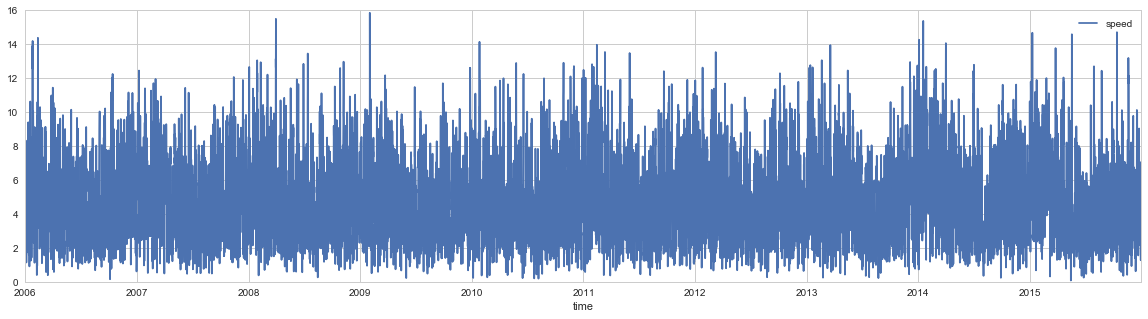

In [36]:
df.plot(y='speed',legend=True,figsize=(20,5))

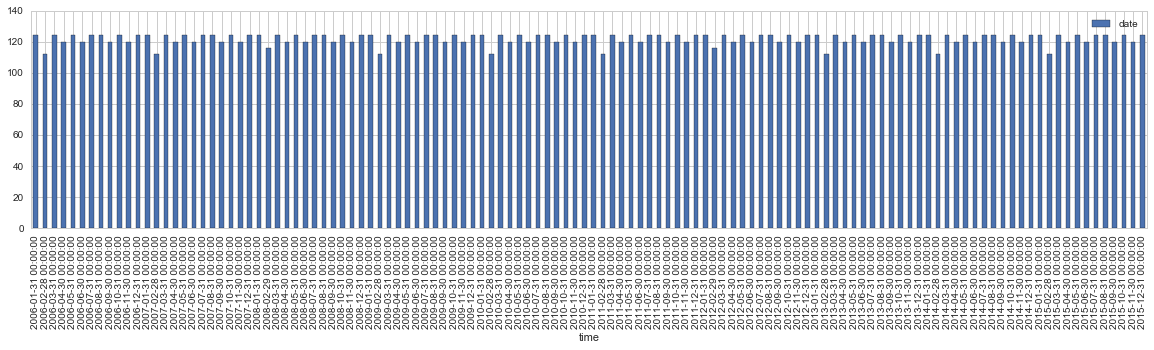

In [37]:
# Accumulation by month
df.resample('M').count().plot(y='date', kind='bar',figsize=(20,4))

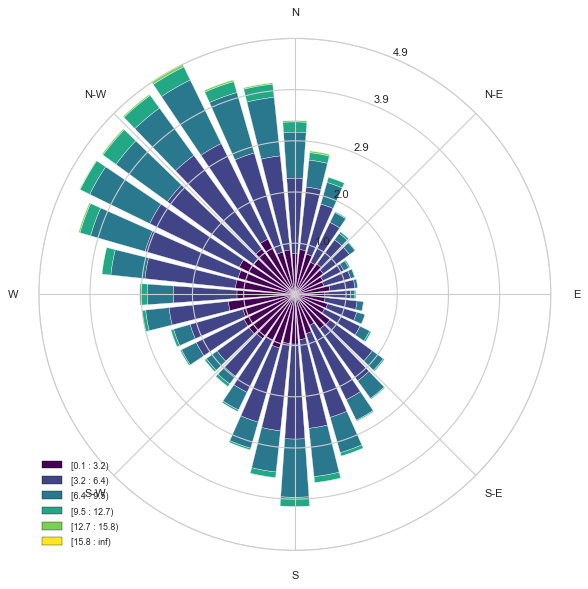

In [38]:
# 90 degree is east
ax = WindroseAxes.from_ax()
viridis = plt.get_cmap('viridis')
ax.bar(df.dir_windrose, df.speed, normed=True, opening=0.8, edgecolor='white', nsector=36, cmap=viridis)
ax.set_legend()

In [39]:
if len(df) > 300000:
    bins=arange(0,362)
    df['dir'].hist(bins=bins, normed=True,alpha=0.5,label='min')
    
    df = df_all_years.sample(n=300000, replace=True)    
    df['dir'].hist(bins=bins, normed=True,alpha=0.5,label='min resmapled')
    plt_configure(legend=True, figsize=(20,4))

In [40]:
# 2. CDF comparison
print('test') # papermill may have bugs on this
x, y_weibull, _, y_cdf_weibull,  weibull_params, y_ecdf = fit_weibull_and_ecdf(df.speed)

# 1. Histogram comparison
fig = plt.figure()
df['speed'].hist(bins=arange(0, df.speed.max()+BIN_WIDTH, BIN_WIDTH), alpha=0.5, label='Data', normed=True)             
plot(x, y_weibull, '-', color='black',label='Weibull')   
plt_configure(figsize=(4,3),xlabel='V',ylabel='PDF', legend=True)

fig = plt.figure()
plot(log(x), log(-log(1-y_ecdf)),'o', label='ECDF')
plot(log(x), log(-log(1-y_cdf_weibull)),'-', label='Weibull')
plt_configure(xlabel="ln(V)", ylabel="ln(-ln(1-P)",legend={'loc':'best'}, figsize=(4,3))
align_figures()

test


D:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in log
  if sys.path[0] == '':
D:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in log
  del sys.path[0]


<img style="margin:0" align="left" src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAARsAAADSCAYAAAB6vWTpAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAALEgAACxIB0t1+/AAAIABJREFUeJzt3XlcVPX+x/HXsAzKJihqmUloehUQd3C3JNTMJQUERNxL
SzPUH6Lkghu4tVwNSbNbrml6taTcccFQySUKwSUUyS1UFlllPb8/jLkQqzgbw/f5ePB4wHznzHwY
4MM5c873/ZVJkiQhCIKgYnqaLkAQhLpBNBtBENRCNBtBENRCNBtBENRCNBtBENRCNBtBENTCQFUP
XFRURGBgINeuXUMul7Ns2TKsra0V4z/++CObN29GX1+fNm3aEBgYCFDuNomJicydOxeZTEbr1q1Z
tGgRenqiTwpCbaKyv9hjx46Rl5fHrl27mD17NitWrFCMPXnyhM8++4wtW7awc+dOMjMzOXHiRIXb
BAcH4+vry44dO5AkifDwcFWVLQiCiqis2Vy8eJE+ffoA0LFjRy5fvqwYk8vl7Ny5k/r16wNQUFCA
kZFRhdvExsbi6OgIQN++fTlz5oyqyhYEQUVUdhiVmZmJqamp4mt9fX0KCgowMDBAT08PKysrALZu
3Up2dja9evXi4MGD5W4jSRIymQwAExMTMjIyKn3uixcvquA7EgShurp06VLmNpU1G1NTU7KyshRf
FxUVYWBgUOrr1atXk5CQwLp165DJZBVuU/L9maysLMzNzat8/vK+WU24ePGiqKUcopby6UItFf2z
V9lhVOfOnYmIiAAgOjqaNm3alBpfuHAhubm5rF+/XnE4VdE2tra2REVFARAREUHXrl1VVbYgCCqi
sj0bFxcXIiMj8fT0RJIkgoKCCAsLIzs7G3t7e/bs2UPXrl0ZN24cAGPHji13GwB/f38WLFjAJ598
QsuWLRk4cKCqyhYEQUVU1mz09PRYsmRJqdtatWql+Pzq1avlbvfPbQBsbGzYtm2bcgsUBEGtxMUq
giCohWg2giCohWg2giCohWg2giCohWg2giCohWg2glBLjBs3jt9//x2AvLw8unTpwqZNmxTjPj4+
XLlypcx2ERER7Nq1izt37jBq1KhqP997772neNwbN248Z/UqPPUtCHWBn58fu3fvVspjubu74+np
WeF4r169uHDhAg4ODly8eJHevXtz6tQpJk+eTG5uLnfv3qVt27Zltuvbty8Ad+7cUUqdNSX2bASh
lujZsycXLlwA4NSpU7i7u5ORkUFGRga//vorjo6OnD9/Hi8vL8aMGcO8efPIz89n7969rFmzBoCU
lBSmTp2Ku7s7ISEhAMydO1dx5X5ERARz585VSf1iz0YQnsPq1atZvXq10h6vsknEtra23Lx5E0mS
OH/+PLNmzaJHjx6cOXOGa9eu0bt3bxYsWMCOHTto1KgRn332Gfv27Ss1JzE7O5vVq1djbGyMt7c3
zs7OSqu9KqLZqFBRURFpaWkkJyeXO25paSlCwIRq09PTo23btkRERNC4cWPkcjl9+/bl5MmTXL16
FW9vbxYsWICvry/wNDeqZ8+epULr2rZti5mZGQDt27cnISGh1HOochk50WxUKDU1laPn7xGfYlxm
LCsznXHDutKoUSMNVCbUVr169WLDhg289dZbwNN0g/Xr1wNP/3m98MILrF+/HjMzM8LDwzE2Nub+
/fuK7W/cuEFWVhZGRkb8/vvveHh4cPbsWR4+fAhAXFycymoXzUbF6puYYmZuqekyBB3Rs2dP5s+f
z6pVq4CnQXRmZma0a9cOPT09PvroI959910kScLExIRVq1aVajYNGjRg5syZpKSkMHjwYF599VXc
3d0JCAggLCyMV155RWW1i2YjCLXISy+9xLVr10rdVrxnA9C7d2969+5danzkyJGKz/fv31/mMdu3
b09YWFiZ20NDQ4GnAXfKoLHAc4CcnBwmTJjA8uXLadWqFXv37mXfvn0A5ObmcuXKFSIjI7lz5w5T
pkxRdF0vLy8GDx6sqtIFQVABlTWbkuHl0dHRrFixQtEpAWJiYli0aBFJSUmK20aOHKnowosXL8bV
1RVzc3NiY2OZMGECEydOVFW5giComMqaTWWB5/D0CsiQkBDmzJlTZtuYmBji4+NZtGgRAJcvXyYh
IYHw8HCsra0JCAgolVVc0fNrWlpaGgD37t0rM5aV+Zjo6GwsLCzUWpM2vC7FRC3l09VaNBJ4DpVn
BG/YsIFp06YpvnZwcMDd3R17e3tCQ0MJCQnB39+/0ufXhhzX5ORkfo6LoFmzZmXGMtLr07FjG7We
jdKFfFtVELWUT9kZxBoLPK9Ieno6CQkJdO/eXXGbi4uLIuTcxcWFpUuXKr9gQaiBoqIiUlNTlfJY
lpa6fdZSZc2mc+fOnDhxgsGDB5cbeF6R8+fP06NHj1K3TZo0iQULFuDg4MDZs2exs7NTRcmC8MxS
U1PZvP8CJqZVr/hRmeLrrnSZRgLPPTw8KtwuISGB5s2bl7otMDCQpUuXYmhoiJWVlVbt2VT2ny0l
JUWlV2QK2sHE1Fxt11JFRUXh6+vLq6++iiRJFBQUMHbs2ArPzt67d4+rV6/Sv39/tdRXGY0Fnhf7
5zn8yZMnl7mPnZ0dO3fuVG6BSlLZf7YHf90hL7dQA1UJuqx79+58+umnwNN11Hx8fLCxsaFdu3Zl
7nvu3Dlu3ryp282mLqnoP1tmxmNynqRpoCKhrjAxMcHDw4MDBw6wbds2/vrrLx48eED//v2ZMWMG
Gzdu5MmTJ3Tq1AkzMzM+//xzJEkiKyuLjz/+GBsbG7XVKmYBCkIt16hRI+Li4ujYsSNfffUVe/bs
YefOnejr6/Puu+8yZMgQnJ2d+eOPP1i9ejVbt25lwIABHDp0SK11ij0bDSkqKiIlJaXC8fJmhCcn
JxMVFaX4SEhIYNasWUyZMkXV5Qpa7N69e3Tq1ImYmBjOnTuHqakpeXl5Ze7XtGlTli9fjrGxMUlJ
SXTu3FmtdYpmoyHZWRnsPvqIRo2blBnLykzHa5ADd+7cISoqinPnzhEVFUV8fHyp+8nlcqZOnUp8
fDwrV64UcRUakpWZrrHHyMzMZPfu3bi5uZGTk8OSJUtITEzku+++Q5Ik9PT0KCoqAmDBggUcPXoU
U1NT/P391X7yQjQbDTI2NSv1Xk/81d84d+og12IvEvDeH+Tm5irGLCwsGDBgAE5OTnTv3h1HR0fS
09MZPHgwa9asITExkc2bNyvWTRfUw9LSUmmnrC0tLbl161aV9zt37hw+Pj7o6elRWFjIBx98gI2N
DbNnzyY6Ohq5XI61tTUPHjygTZs2hIaGYmdnx7Bhw/D29qZ+/fpYWVnx4MEDpdRdXaLZaIm7f95g
md9Y8vPz0NPTx87Olt69e+Pk5ISTkxNt2rQps+diZWXFmTNnGDFiBLt37+bu3bv88MMPWFlZaei7
qHv09PTUehW4k5MTZ8+eLXesvBndTZs25fDhwwCKDBxNEc1GCxQWFrDh4wDy8/N4x3cp7bv0YvSb
DtX6JW7YsCFHjhxhwoQJfPvtt/To0YODBw/y6quvqqFyQag+cZCvBQ7s/YYb136n1+tDeW2QG3Kj
es+0vZGREdu2bSMgIID4+Hi6d+/OmTNnVFStINSMaDYadvfPG/x3yzoaWFrh8968Gj+Onp4ey5cv
Z+PGjaSlpdG/f3+lLTEiCMogmo0GFRYWKg6fJs4IVLxZXHxaPDk5udyP4rML5XnnnXf48ccfMTQ0
ZNSoUaxZs0ZMmRC0gnjPRoNOHtqtOHzq2uN/S2pUdVq8qqD0QYMG8fPPP/PWW2/h5+fHzZs3Wbt2
rUq+B0GoLrFnoyFJ9/7k0L5vKjx8Kj4t/s+P6s4u7tChA+fOncPBwYHQ0FDefvttsrOzlf1tCEK1
aVUGMcCIESM

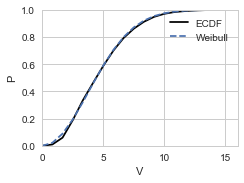

In [41]:
plot(x, y_ecdf,'-', label='ECDF', color='black')
plot(x, y_cdf_weibull,'--',label='Weibull')
plt_configure(xlabel = "V", ylabel='P', legend=True, figsize=(3.5,2.5))

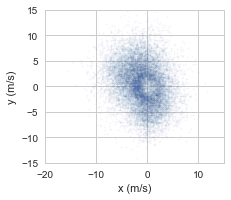

In [42]:
df.plot(kind='scatter', x='x', y='y', alpha=0.05, s=2)
plt.gca().set_aspect('equal')
plt_configure(figsize=(3.2,3.2),xlabel='x'+speed_unit_text, ylabel='y'+speed_unit_text)

## 2.2 Overview by Direction

In [43]:
if len(effective_column) == 16:
    rebinned_angle = 22.5
else: 
    rebinned_angle = 10

In [44]:
%%time
original_incre, incre = SECTOR_LENGTH, rebinned_angle
start, end = -original_incre/2 + incre/2, 360

max_speed = df.speed.max()
max_count = max_count_for_angles(df, start, end, incre, BIN_WIDTH)
plot_range = [0, max_speed, 0, max_count*1.05]

for angle in arange(start, end, incre):
    start_angle, end_angle = angle-incre/2, angle+incre/2
    sub_df, sub_max_speed = select_df_by_angle(df, start_angle, end_angle)   
    
    fig = plt.figure()
    sub_df['speed'].hist(bins=arange(0, max_speed+BIN_WIDTH, BIN_WIDTH), alpha=0.5, label='Data')
    plt.axis(plot_range)
    plt_configure(figsize=(3,1.5), title='%s (%s - %s), %s' % (angle, start_angle, end_angle, len(sub_df)) )
align_figures()

D:\ProgramData\Anaconda3\lib\site-packages\matplotlib\pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<img style="margin:0" align="left" src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAMgAAAB6CAYAAAD6WhzgAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAALEgAACxIB0t1+/AAAEI9JREFUeJzt3X1QVNX/B/D35UlIVFCUmgwT0RxMEEWIKSRH0YxISRoB
xd+ImVpNOo0jPvGQ+IA6OuM4iOJDEZkxKTiMWtMPG8VMMWhJESPBr1gpsDwssjwEsuf7B8P9urB7
2F32mc9rhhnu2XPvfu7ufvaee+7ZcwXGGAMhRCUbUwdAiDmjBCGEgxKEEA5KEEI4KEEI4aAEIYTD
YhOks7MT27dvR2BgIAIDA7F37150dXXprT4AyOVyhIeHQyaTqa2TmJiIV155Relv+/btauvfu3cP
S5cuha+vL8LCwlBQUND/zvZj5cqVfWI4ceKE2vpFRUWIiIiAj48PFi9ejNu3b4uP/fjjj9i8ebPO
sZw/fx7vvfeeUlnv2Hr+VD2PqvVNilmo1NRUFhoayiQSCbt27Rp7/fXXWVpamt7qM8ZYSkoKO3Lk
CLdOVFQUO3z4MKutrRX/mpubVdZta2tjs2bNYgkJCayiooKlpaWxqVOnsgcPHvS/wxzBwcEsNzdX
KYbW1laVdaurq5mfnx87ePAgq6ioYMnJySwwMJA1NTWJdRYvXswKCwu1juPnn39mvr6+LCIiQqn8
2bhqa2vZ2bNn2ZQpU9jt27c1Wt+ULDJB2tvbma+vL8vPzxfLcnJyWFBQEOvq6hpwfca639Rp06Yx
mUzGjSUgIIBduXJFo7hzc3NZUFAQ6+joEMuWLVvGUlNTNVpflebmZjZp0iRWUVGhUf1Dhw6xRYsW
icsKhYLNmTOHZWVlKcW5bNkyreJITU1lU6ZMYe+88w73A97S0sKCg4NZenq6Tusbm0U2se7evYu2
tjYEBASIZf7+/qivr8fDhw8HXB8AsrOz4efnhxEjRqiNQyqVQiaTYfz48RrF/dtvv8HPzw/29vZi
2cyZMyGRSDRaX5WKigrY2dnBw8NDo/oSiQQzZ84UlwVBwIwZM5RimD17NiQSCcrLyzWO48aNG8jM
zMS8efO49b744gvY29sjLi5Op/WNzSITpKamBk5OThg2bJhYNnr0aABAdXX1gOsDwOXLlxEcHMyN
o6KiAoIg4NixYwgJCcHbb7+NkydPQqFQqKxfW1uLMWPGKJW5ubmhpqaG+zz9xeDs7IxNmzbhjTfe
wMKFC5Gbm6u2viYxjBgxAlOnTsWVK1c0jiM3NxczZszg1mlvb0dmZiZWr14NBwcHrdc3BYtMkLa2
NgwZMkSprOcF7+joGHD9rq4ulJWVwcvLixvH/fv3YWNjAw8PD2RkZCAuLg5paWk4fvy4VnGrikFT
lZWVaG9vR1BQEI4fP45FixYhISEBFy5cGFAMXl5eKC0t1TkuVc6fPw8bGxssXLhQr9s1JDtTB6AL
R0fHPm9oz7KTk9OA68tkMnR1dcHV1VUs++CDD1BcXCwuX7hwATExMQgLC4OLiwuA7t6apqYmfPnl
l/jwww81jsPR0VHlfoaFheHRo0fisqqm2IYNG7BmzRqxKTh58mT89ddfyMrKQlhYmM4xuLi44P79
+yrj0tXFixexYMGCPglqziwyQZ5//nm0trZCLpfD2dkZQPf5AAC4u7sPuL4gCACg1FTauXMn2tvb
xeUxY8ZAEAQxOXp4eXmhrq4OXV1dsLW1VXrM3d1dfN4eUqlUZQwAkJGRgadPn6p8rIetrW2f86QJ
Eybg8uXLKutrGkNXVxdsbPTXwGhtbcXNmzexatUqvW3TGCyyiTV58mQ4OTkpfaMXFRXBzc1N5cmq
tvVdXV1hZ2eHxsZGsczd3R3jxo0T/+zs7LBz506sWLFCad3S0lK8/PLLfZIDAPz8/CCRSJQ+9EVF
RfDz81O5ny+++KLSc6ryySefYOvWrUpld+7cgaenp8r6fn5+KCoqEpcZY2LnwbMaGxvF8zR9KCsr
A2MM06dP19s2jcEiE8TR0RGRkZHYvn07iouLcf36dezfvx/Lly8X68hkMvECnyb1nyUIAry9vfvt
xZk7dy5u3LiBjIwMPHz4EOfOncPx48exdu1aAN3fwlKpVDzy9PTQJCQkoLKyEunp6bh16xaioqJ0
fi3mzp2Lc+fO4ezZs3j48CEyMzORl5eHNWvWAOhuPkmlUrFZFRkZiYqKChw4cACVlZVISUlBS0sL
wsPDlbZbXl6OqVOnAug+uZZKpf1eWOUpLy/H2LFjLap5BQACY4b/wdSz39z60tHRgczMTNy4cQP2
9vaYNWsWoqKixGZBSkoKgO4Poyb1e8vJycG9e/cQHx/PjePmzZvIycnB48eP4erqivDwcMyZMwdA
d9Nl3bp1WL16NUJCQgAADx48wMmTJ1FVVQV3d3csW7YMPj4+A3ot8vPz8f3336Ourg7u7u54//33
xa7csrIy7NixA9u2bYO3tzeA7qPcV199hZqaGnh4eGDFihVKR5zW1lasXr0ae/fuxQsvvIArV67g
6NGjOHjwYL9HlTNnzkAikWDnzp1K5d999x1u377NHWXAW9/Q1PagGeNiS1FRkTGeRq+qq6uZr68v
k0qlKh+3xH3qT88+ffvtt2z58uVKj61atUrta2HONHmfeHUssollDO7u7oiIiEB2drapQzEqxhhO
nz4tNhOB7gucNjY2cHNzM2FkpkEJwvHZZ5/h4sWL3MGK1uaHH37ApEmT8Nprr4llPj4+SE9PN2FU
pmOR3bzGMmzYMLUX3KzVggULsGDBAqUyO7vB+zGhIwghHJQghHBQghDCQQlCCAclCCEclCCEcGjU
f3f06FH89NNP6OzsRHR0NAICArBp0yYIgoCJEyciKSlJryM/CTEX/X6qCwsLIZFIcPr0aWRlZaG6
uhq7d+/G+vXr8c0334AxhkuXLhkjVkKMrt/Bivv374cgCLh37x7kcjk2btyIjz76CAUFBRAEAfn5
+bh27RqSkpLUbsMQgxUJ0Sd1gxX7bWI1Njbi0aNHOHLkCP7++2+sXbsWjDHxR0VDhw5Fc3OzzgFY
quLiYtonC6DJPvG+wPtNEBcXF3h6esLBwQGenp4YMmSI0kQHLS0tGD58uBYhE2I5+j0HmTFjBq5e
vQrGGGpqatDW1oagoCAUFhYCAAoKCuDv72/wQAkxhX6PILNnz8avv/6KyMhIMMaQmJiIsWPHIiEh
AQcOHICnpyfmz59vjFgJMTqNunk3btzYp+zrr7/WezCEmBu6eEEIByUIIRyUIIRwUIIQwkEJQggH
JQghHJQghHBQghDCQQlCCAclCCEclCCEcFCCEMJBCUIIByUIIRwaJUh9fT1CQkJQWVmJqqoqREdH
IyYmBklJSWpveUyINeg3QTo7O5GYmCjeBZVmNCGDSb8JsmfPHkRFRYk3n79z5w4CAgIAALNmzcIv
v/xi2AgJMSHuLwpzcnIwcuRIBAcHIyMjAwB0mtEEsM6pf2ifLMNA9ombIGfPnoUgCLh+/Tru3r2L
+Ph4NDQ0iI9rM6PJYJxOxtIM1n3SedqfU6dOif/HxsYiOTkZ+/btQ2FhIQIDA1FQUKB0qy5CrI3W
3bzx8fE4dOgQlixZgs7OTprRhFg1jW8+l5WVJf5PM5qQwYIuFBLCQQlCCAclCCEclCCEcFCCEMJB
CUIIByUIIRyUIIRwaHyh0BIoFAo0Njb2KXd1daW78BKdWFWCNDY2IjOvCEOd/zeAskX+BP/3rj9G
jRplwsiIpbKqBAGAoc7DMWy4q6nDIFaC2h2EcFCCEMJBCUIIByUIIRzck/TOzk5s2bIF//zzDzo6
OrB27Vp4eXlh06ZNEAQBEydORFJSEnWhEqvFTZC8vDy4uLhg3759kMlkWLRoESZPnoz169cjMDAQ
iYmJuHTpEkJ

Wall time: 8.98 s


## 2.3 Overview by Month

In [45]:
%%time
current_df = df.query('speed>=1')
for month in arange(1, 13): 
    sub_df = current_df[current_df.index.month == month]
    ax = WindroseAxes.from_ax()
    ax.bar(sub_df.dir_windrose, sub_df.speed, normed=True, opening=0.8, edgecolor='white', nsector=36, cmap=plt.get_cmap('viridis'))
    plt_configure(figsize=(3,3), title='Month: %s'%(month))
align_figures()

<img style="margin:0" align="left" src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAOwAAADxCAYAAADIm1tRAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAMTQAADE0B0s6tTgAAIABJREFUeJzsnXd81PX9+J+3R+6Su1z2niSEsAVkTwEriKPUbfVr269W
y7fjZ9VWRdE6OqyrVau2VYsDWxcOUEGW7A3Ze1wu61Zu798fMQcxgwDHsnk+Hnk8ks985+7z+rxf
79cUhEKhEMMMM8wFgfBcD2CYYYYZOsMCO8wwFxDDAjvMMBcQwwI7zDAXEMMCO8wwFxDDAjvMMBcQ
wwL7X8Cw5+67w7DAngXmzZtHQUEBTzzxRL/79Xo9BQUFFBQUYDKZInrvL7/8kpUrV4b/fu655xg/
fnxE72G325k7dy7r1q2L6HWH6cuwwJ4lBAIBX3zxRb/71q9ff8bu+9prr9HW1nbGrm+32/npT39K
S0vLGbvHMMcYFtizxPjx42lubqa0tLTPvnXr1lFQUHAORnV67N69m+XLl1NeXn6uh/Jfw7DAniVG
jhxJenp6n9m0paWFI0eOsHjx4j7nfPHFF1x99dWMGzeO2bNn8/TTT+P3+8P7582bx8svv8zKlSuZ
PHkyEyZM4J577sFutwNw0003sXv3bjZt2kRBQQHNzc3hcz/99FMWLVrE6NGjueqqq9i/f394X3Nz
MwUFBTz33HOD/k933nknI0aM4JVXXjmlz2SYk2dYYM8iCxcu7KMWr1+/nrFjx5KUlNRr+zvvvMNd
d93FmDFjeP7557nxxhv5+9//zr333tvruJdeeomuri6eeuopfv7zn/PJJ5/wwgsvALBy5UqKioqY
MGEC77zzDgkJCQC4XC7+/Oc/s2LFCp555hlcLhc/+9nPwi+DhIQE3nnnHZYvXz7o/7N69WqeeeYZ
YmNjT+tzGWboiM/1AP6bWLx4Ma+++io1NTXk5uYC3erwpZde2uu4QCDA008/zWWXXRY2GM2YMQO1
Ws3KlSv50Y9+RGFhIQBJSUk89dRTCAQCZsyYwebNm3nllVeYPHkys2fPRqVSoVQq+eUvf8nrr78O
dFuN//CHPzBu3DgA/H4/P/vZz6iurqawsBCpVBreNxgjRoyI2GczzNAYnmHPIqNHjyY5OZnPP/8c
AIPBwOHDh1m0aFGv42prazGZTH3U5MsuuwyAvXv39rqmQCAI/x0fHw90z642m63fcYhEIsaMGRP+
OzU1FWDA44c5fxgW2LOIQCDopRavX7+eMWPGkJyc3Os4q9UKgE6n67VdrVYjlUrDa1QAhULR5x4i
kYgZM2bw+OOP9zsOmUyGUHjsq+/5PRgMnuJ/NszZYlhgzzILFy6kpKSE5uZm1q9f30cdBtBoNAAY
jcZe27u6uvB6veH9g3HvvfeyY8cOLBZLZAY+zHnBsMCeZSZMmEB8fDxvv/02hw4d6qMOA2RnZ6PV
avsEInz66afha5wIlUrFI488Qn19fS/L8jAXNsNGp7OMUCjkkksu4Z///Gd4TfttRCIRd911F488
8ggxMTHMnz+fiooKnnvuORYvXjxkY8+MGTOIj4/nwIEDKBQKPB7PkM7zer2UlpaSlJTUx3o9zLll
eIY9ByxcuBCfz9ev77WHG2+8kd/97nfs2rWL22+/ndWrV3Prrbfyxz/+8aTutWrVKlwuF52dnVRX
Vw/pnPb2dq655hrefffdk7rXMGcewXBNp+8Wzc3N3HzzzWzcuDG8bdu2bdx2221s2LCBtLS0czi6
YU6XYYEdZpgLiGGVeJhhLiCGBXaYYS4ghgV2mGEuIIbdOt8BgsEggUAgXFkiFAqFfxcIBL1+RCJR
r1DGs81bb73F22+/Hf67paWFOXPm8Ic//CG8raSkhEceeQSn04lCoeDhhx8Ox07/tzNsdDqPCYVC
+Hw+vF4vPp8v/OPxeMLb/H7/SYcUikQiJBIJEokEqVSKVCoN/y2RSJDJZIjFZ/5dXldXx2233cZb
b71FYmJiePtll13GQw89xKRJk/j666958skn+eijj874eC4EhmfY84RQKITX68XpdOJwOHA4HDid
ToLBIEKhMPwjFosRi8UoFApiYmKQyWRhoesRMqFQSCAQ4ODBg4wbNw6BQEAoFMLv9+P1evF4PGGh
77lnj+AHg0FCoRASiQSlUhnO9lEqlREX4lWrVrFixYpewhoMBrn11luZNGkS0J1HbDAYInrfC5lh
gT1H+P1+bDZbH+EUi8VIJBIUCgU6nY6YmBgkEslp3asnuF8kEiGTyVCr1QMeGwqFcLlcWK1WHA4H
nZ2d+Hw+gsFgLyGOiopCpVKdsnq9d+9eOjs7WbZsWZ+xfv/73w///fTTT7NgwYJTusd3kWGBPYt4
PB4sFgtmsxmHwxFWTZVKJfHx8cTExCASic7pGAUCQXhGPR6v14vZbKarq4uOjg5aWloQCATExMSg
0WhOeuxvvfUWt95664ACHwgEeOyxxzh69Civvfbaaf1P3yWG17BnkFAohNPpxGw2Y7FY8Hg8SCQS
VCoV8fHxg850p8vxKvGZeAkEg0FMJhNGoxGXy0UgECAqKorY2Niwqj4QPp+PWbNm8cUXX6BSqfrs
93q9/PznP8fpdPL888/3e8x/K8MzbIQJhUJhVdJisRAMBpHJZGg0GhITE09bvT1fEAqFxMXFERcX
B4DD4aC9vZ3W1laampqQyWRotVri4+ORSqW9zq2srCQzM3NAQXzggQeQSCS8/PLL35nPK1IMC2yE
CAQCmM1m2tra8Hg8yGQykpKSSEhI6JUs/l0lKiqK7OxsoFv1b2trw2g00traSkxMDAkJCajVagQC
AY2NjX2ylH77298yb948cnNz+eCDD8jOzu61ln3vvffO+XLhfGBYJT5N3G437e3tdHZ2IhQK0Wg0
pKamnvOZ4UyrxEPFbrej1+txOByIxWISExPR6XRnxW30XWT4UzsFQqEQFouFtrY2HA4HcrmczMxM
YmNjz2lQwvmISqWioKCAQCCAwWCgtbUVvV5PbGwsCQkJfYxbwwzO8Ax7EoRCIUwmE3q9nkAggEql
Ij09Hblcfq6H1ofzZYbtD7PZTEtLC263G5VKRVpaGlFRUed6WBcEwzPsEAiFQnR1ddHY2IDX50Wr
1ZKZkXXeCcKFglarRavV4nK5aGhooLy8PLyUOB9ffucTwwJ7Aux2O41NjThdTpxSKwa1kqwoETnD
wnraKBQKCgsLcblc1NXVUVJSgk6nIyUlpY9leZhuhgV2AFwuF03NTdi6unBKumiLUfJadS2llnYW
po5gnC4NmWj444sECoWCoqIi7HY79fX1HD16lISEBJKSkoaNU99i+NP4Fn6/n6amJkwmEy6RjS6t
gtUNenaWNYaP+Vxfyd6OJqYnZZ/DkX73UKlUFBcXYzKZaG5upqOjg+TkZBITE4eNed8wLLDHYTab
qa+vw4sbuybE58Yu/r3n636Pfaf2IJPiM5AOq8YRJzY2ltjYWFpaWjAYDJhMJnJycobXtwwnsAPd
s2p1TTW1tTVYZCYOyQKsOLCNf9cdGfCcT5pK2W9sHnD/MKdPSkoKo0ePRigUUlpaSmtr6399N/n/
+hm2Z1Z148SqlfLXqnpKLENrgPzv2kNMjEtDIjz5WdYX9NDpbiFRkYFQ8N2bpX/5y19SUlISnhXv
uusuLrnkkvD+5ubmcGtMtVrNk08+Ge7xczxisZjCwkI6OzvDS5X/5tn2v9YP6/f7aWhowGq1ItNI
WW9r46/lOznZD+PteTcxKT5jSMd6Ai4M7jqaHJUctmyj1V3PihHPEC/v+6CeLufaD7tw4ULWrFkz
YFuRu+++m3HjxnHDDTfwxhtvcOjQoRPWXA4EAlRXV+NwOEhJSfmvXNueNypxTxPhzZs399o+b968
Xo2IfT4f48e

Wall time: 19.7 s


In [46]:
df.describe()

lat       lon             x             y         speed  \
count  1.460800e+04  14608.00  14608.000000  14608.000000  14608.000000   
mean   4.875000e+01    261.75     -1.109358      0.384930      4.748665   
std    5.990080e-12      0.00      3.211968      4.081346      2.408673   
min    4.875000e+01    261.75    -15.540935    -14.095932      0.078250   
25%    4.875000e+01    261.75     -3.088625     -2.488610      2.839054   
50%    4.875000e+01    261.75     -1.099026      0.498566      4.399262   
75%    4.875000e+01    261.75      1.117667      3.211591      6.256472   
max    4.875000e+01    261.75     11.594738     14.818791     15.833463   

                dir          date          HrMn  dir_windrose  
count  14608.000000  1.460800e+04  14608.000000  14608.000000  
mean     180.842596  2.010567e+07    900.000000    212.993658  
std       88.380238  2.872210e+04    670.843355    102.903882  
min        0.024999  2.006010e+07      0.000000      0.024554  
25%      113.554200  2.008070e+07    450.000000    144.801217  
50%      168.028948  2.010567e+07    900.000000    224.524145  
75%      259.781612  2.013070e+07   1350.000000    303.423234  
max      359.969737  2.015123e+07   1800.000000    359.997332

# 3. Create input data and configuration

In [47]:
SPEED_SET = array(list(zip(df.x, df.y)))
if 'NUMBER_OF_GAUSSIAN' not in globals():
    NUMBER_OF_GAUSSIAN = 3
FIT_METHOD = 'square_error'
# FIT_METHOD = 'chi_square'
# FIT_METHOD = 'k_s'
DEFAULT_BANDWDITH = 1.5 if knot_unit else 0.7
fig_list = []

In [48]:
fit_limit = ceil(df['speed'].quantile(.95))
fitting_axis_range = arange(-fit_limit, fit_limit+BIN_WIDTH, BIN_WIDTH)
print(fitting_axis_range)

FITTING_RANGE = []
for i in fitting_axis_range:
    for j in fitting_axis_range:
        FITTING_RANGE.append([i,j])
        
plot_limit = ceil(df['speed'].quantile(.95))
PLOT_AXIS_RANGE = arange(-plot_limit, plot_limit+BIN_WIDTH, BIN_WIDTH)

[-10.   -9.5  -9.   -8.5  -8.   -7.5  -7.   -6.5  -6.   -5.5  -5.   -4.5
  -4.   -3.5  -3.   -2.5  -2.   -1.5  -1.   -0.5   0.    0.5   1.    1.5
   2.    2.5   3.    3.5   4.    4.5   5.    5.5   6.    6.5   7.    7.5
   8.    8.5   9.    9.5  10. ]


# 4. Kernel Density Estimation

In [49]:
sample = SPEED_SET
KDE_KERNEL = 'gaussian'
# KDE_KERNEL, bandwidth = 'tophat', 1

In [50]:
%%time
if 'bandwidth' not in globals():
    from sklearn.model_selection import GridSearchCV  

    # The bandwidth value sometimes would be too radical
    if knot_unit:
        bandwidth_range = arange(0.7,2,0.2)
    else:
        bandwidth_range = arange(0.3,1.2,0.1)

    # Grid search is unable to deal with too many data (a long time is needed)
    if len(sample) > 50000:    
        df_resample=df.sample(n=40000, replace=True)
        bandwidth_search_sample = array(list(zip(df_resample.x, df_resample.y)))
    else:
        bandwidth_search_sample = sample

    grid = GridSearchCV(neighbors.KernelDensity(kernel=KDE_KERNEL),
                    {'bandwidth': bandwidth_range}, n_jobs=-1, cv=4, return_train_score=False) 

    grid.fit(bandwidth_search_sample)
    bandwidth = grid.best_params_['bandwidth']
    plt.plot(bandwidth_range, grid.cv_results_['mean_test_score'], label='test')
    plt.fill_between(bandwidth_range,
                     grid.cv_results_['mean_test_score']+grid.cv_results_['std_test_score'], 
                     grid.cv_results_['mean_test_score']-grid.cv_results_['std_test_score'], alpha=0.2)
    plt_configure(figsize=(4,3))
    
print(bandwidth)

0.8
Wall time: 0 ns


In [51]:
if 'bandwidth' not in globals():
    bandwidth = DEFAULT_BANDWDITH
    
points = FITTING_RANGE    
config = {'bandwidth': bandwidth, 
          'fitting_range': FITTING_RANGE,
          'fit_limit': fit_limit,
          'kde_kernel': KDE_KERNEL,
          'bin_width': BIN_WIDTH
         }

In [52]:
# very slow if the dataset is too large, e.g. 100,000
# kde returns log prob, need to convert it
kde_result, kde = fit_kde(df, config)
print('bandwidth:', bandwidth, len(kde_result))
print(kde_result[:5])

bandwidth: 0.8 1681
[  3.31485877e-06   6.72312929e-06   1.35443643e-05   2.56899964e-05
   3.95017099e-05]


In [53]:
# Plot jPDF
X = Y = PLOT_AXIS_RANGE
# Can't work if pass as generate_Z_from_X_Y(X,Y, exp(kde.score_samples())), need to use lambda
# see http://stackoverflow.com/questions/21035437/passing-a-function-as-an-argument-in-python
kde_Z = generate_Z_from_X_Y(X,Y, lambda coords: exp(kde.score_samples(coords)))
colorbar_lim = 0, kde_Z.max()

plot_3d_prob_density(X,Y,kde_Z)

fig_kde,ax1 = plt.subplots(figsize=pdf_fig_size)
plot_2d_prob_density(X,Y,kde_Z,xlabel='x'+speed_unit_text, ylabel='y'+speed_unit_text, ax=ax1)

with sns.axes_style({'axes.grid' : False}):
    from matplotlib import ticker
    fig_hist,ax2 = plt.subplots(figsize=pdf_fig_size)
    _,_,_,image = ax2.hist2d(df.x, df.y, bins=PLOT_AXIS_RANGE, cmap='viridis',)
    ax2.set_aspect('equal')
    cb = plt.colorbar(image)
    tick_locator = ticker.MaxNLocator(nbins=6)
    cb.locator = tick_locator
    cb.update_ticks()
    plt_configure(ax=ax2, xlabel='x'+speed_unit_text,ylabel='y'+speed_unit_text)
align_figures()

<img style="margin:0" align="left" src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAATkAAAE5CAYAAADr4VfxAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAALEgAACxIB0t1+/AAAIABJREFUeJzsvXuULHdZLvzUta/TPff7fXaCUVa4hLDJEuUzHgRZeFBR
JK7zhwf0W3owHAJLIYQIh7AlICb4iWStxA89JxtNYj49yIIlXgBBWUggbnNIQkhmZs+9p6/T9+66
fn/0/Gqqq6uqq6pr9nRP6lkrK3tmqn716+6qp9/L874vpaqqigABAgQ4p6DPegMBAgQIcJoISC5A
gADnGgHJBQgQ4FwjILkAAQKcawQkFyBAgHONgOQCBAhwrhGQXIAAAc41ApILECDAuUZAcgECBDjX
CEguQIAA5xoByQUIEOBcIyC5AAECnGsEJBcgQIBzjYDkAgQIcK4RkFyAAAHONQKSCxAgwLlGQHIB
AgQ41whILkCAAOcaAckFCBDgXCMguQABApxrBCQXIECAc42A5AIECHCuEZBcgAABzjUCkgsQIMC5
RkByAQIEONdgz3oDAc4eqqpCEARIkgSGYcBxHGiaBkVRZ721AAF6BqWqqnrWmwhwdmg2mygWixga
GoIoigCA/f19jIyMYGhoCDRNB6QXYKARWHIvYsiyjHq9jkwmg1gsBkmSwHEcVFWFqqqQZRmSJEEQ
BFAUBYZhAtILMHAISO5FCFVVIUkSZFkGRVGQZRnr6+uQZRksy0JRFNRqNYRCIbDsyS1CSK/ZbIKm
aTAMA4ZhwLJsQHoB+haBu/oig6IoEEUR5GM/ODhAPp/H4uIieJ6HIAhIpVKgKAqiKIJlWUSjUUQi
EUSjUTAM07YeWYeiKI3sWJbtOC5AgLNCYMm9SEDcT1mWAQCSJGF3dxeKooDjOAwNDUEQBITDYXAc
h2QyiVgshmaziVqthmKxiMPDQ430CPHpyUySJKiqimaziXQ6jampKfA8H5BegDNFQHIvAiiKAkmS
oCgKKIpCuVzG3t4eRkdHkUgksL293XY8RVFQVRUURSEcDiMcDmN0dBSqqqLRaKBer+Po6AipVAoc
x2mEpye9arUKQRA00iPubWDpBbjWCEjunIPE0UgyIZVKoVQqYWFhQbPUnEYsKIrSyExPerVaDUdH
Rzg4OADP84hGo1BVVSNV4CQOGJBegGuNgOTOKRRFgSzLUBQFACAIAnZ2dsDzPNbW1rSEQi/JAj3p
kWsSS09RFOzs7CAUCmnxvEgkAppu6c8D0gtwrRCQ3DmEoijIZrMoFotYXFxEoVBAKpXC5OQkRkdH
O4jNaMkRd9UtaJrW4nWlUgkzMzNapjafz6PRaCAUCrW5t3akV6lUkEgkEAqFAtIL4BkByZ0zEPcU
aBHH7u4u6vU6VlZWEA6HO44/TdkHTdMIh8OIRqMAWuRbr9dRr9eRy+XQbDYRDoc1Sy8cDreRXjqd
BsuykCQpsPQCeEZAcucERu2bKIqoVCoYHh7G2tqaRh5W5wKnS3hAi/RisRhisRiAE9Kr1WrIZrMa
6RFLjyQ/iGVp5d7yPB9o9AJYIiC5cwCj9i2bzSKdToPneczNzdmea0YOXt1VtzCSHqnAIFUYkiQh
lUohFotpll63RAapvQ1ILwBBQHIDDmK9AS2S2NvbgyRJmJ6eRqlUcrRGv+jBGYZBPB5HPB4HAGxs
bCCRSEAQBKTTaYii2GbpmZGeKIpoNBoa6VEUBY7jAvf2RYyA5AYURve0Uqlgd3cXw8PDWFxcRLVa
dUReVhaPH8TX6xoURSEajWJ4eBjAiaVXq9VweHgISZI00otGowiFQh2kd3BwoK0RWHovTgQkN4DQ
a98A4PDwEIVCAXNzcxgaGtKO80oyfhDAaZCI0dKTJEkjvVQqBUmS2uQqoVBI24uVpReQ3vlHQHID
BFVVkcvlwHEcwuEwRFHE7u4uKIrC2toaOI7TjnX60F6r+NtpgGVZDA0NacSuJ72joyPIsqwlXEKh
UFuCQk96JKZHiC8gvfOFgOQGBKQ0q1AoaHGqvb09jI+PY3x8vOOh7JW8BpH4zEhvf39f+78sy23N
BvSkpyiKlsDRkx7LsmBZNiC9AUZAcgMAWZa1hpYAUCgUIAgClpaWNA2aV+jrVPW/Ow8gBEWITxTF
NktPURSN8KLRaJsFpyc9URRRLpcxNTUVkN4AIiC5PoYxudBoNFCpVBAKhXDhwgXbjOEgu6GnBY7j
wHEcEokEAEAURdRqNdTrdeTzeaiq2mbpEdKTJAm1Wk1zbymKCiy9AUJAcn0KfecQAMjn8zg8PEQ4
HEYymewqiXBKcvoYldtzBx2kpVQymYSqqm2WXj6fBwBEIhGtkaje4tVbegHp9TcCkutD6LVviqJg
f38fjUYDKysr2sP3YoBfMhYnhENRFHieB8/zbaRXq9VQLpfRbDaxublpaukBAen1MwKS6yMY3dNa
rYadnR0MDQ1ppVluLDQ3LZTIA6pvd94r/CCpsyIHPelxHId8Po+pqSnUajVUq1Vks1nQNN0mWbEi
PaAlfyFiZr2eL8DpIyC5PoFR+5bJZJDNZjE7O4tkMulpTacko6oqrl692pZV5Hkeoii2yVLc4Dw9
xKqqau8Jz/MYHh7WxjjWajVUKhWk02kwDNOWyNBbcIqiIJ1OIxaLYWhoqG0oEKnMCHA6CEjujKGq
KqrVKg4ODrC4uAhZlrW25Gtra+B5vu14t7G2biClX0NDQ5ifn4coikin0xAEAVtbW2AYRntozWY8
9DucuqtuQVEUQqEQQqEQRkZG2kivXC5rpKdvFa9vOGBm6ZGhQAHp+YuA5M4QJLlAJmCRtuQjIyOY
nJzsqXi+23GqquLw8BDFYhEURWFsbAyyLIPnea0mdHR0FM1mE/V6HaVSCYeHh5btzs8znBClGekZ
3zvSLRk4SWgY3VtBEACgYyhQQHreEZDcGUHvnpLWSHt7e5ifn9fKlszgJtZmdRzpEsyyLNbW1vD8
889r+zD+n8x4IA8uaXdeKBRwcHCgNcE09oM7T/ASWzR777a3t8GybMdQIP0kNEJmZOiQceZtQHru
EZDcNYZZ37fd3V2oqooLFy44Cvz34q6WSiXbSoluaxILbmxsTGt3btYPjkguzhp+uau9rkEyrolE
QpuBQVrFF4tFpFIp8DzflsiwIr2DgwPMzMy0TUILSM8aAcldQxinZhWLRezv72N0dNRxZtNrTare
PTWrlOi13TnQ3iWEjDzUx/MGtbnlacT13AwF0ocGKIpCvV7XqmACS687ApK7RtBr31RVxf7+PqrV
KpaXlzWJghN4Eeoa3VMjmZrVvZLYkRvou4TU63WMjY1BVVVHZVQvBtiRpd1QIH1oIBKJtFnJgXvb
HQHJnTLMSrN2dnYQiUSwtrYGhmEgy7IrTZubxINT9/Q0rBUiqSAF88YyKgBt2UevchU7XEtBsZ/r
6K1kY2iASH7MhgLpSU+SpID0EJDcqcJYWJ/L5ZBOpzE9PY2RkRHt926Fu24SDwcHB10L+U9LYmGE
WRkV0ZllMpm2B5tILk5rL2eBXshS/97k83msrq6i2WyiVqt1HQoEmJNes9lEPB4/9xUZAcmdAlRV
hSzLePrpp3HhwgUAwP7+PgRBwOrqqtbMkcCtC9rtWOKeAjB1T63WJDf6tahd1VcUGMW1RHKhKApy
uRzi8fiZylVOS2vnBeRzMcZDrYYC2ZHe1atXsbS0pAmSiThZbxGeBwQk5zOMhfXVahWpVAqJRALz
8/Ndp2Y50WPZgbinExMTqNfrjoihH25oM53Z+vo6GIbpSa7SDxleAj/IUi8o1sNuElomk4EgCG2t
4sPhMFRV1e4PM0uPiJMHnfQCkvMRxtIsUlw/NzentfcxA7lpnZKc2YOrqipSqRRKpZLmnqZSKccP
lnHNsyYH8p6

## 4.1 Bootstrap GOF limit

In [54]:
%%time
gof_kde=Parallel(n_jobs=-1)(delayed(resampled_kde)(df, kde_result, config) 
                                       for i in arange(20)) 

Wall time: 11.4 s


In [55]:
for gof_name in [ 'R_square', 'K_S','Chi_square']:
    plt.figure(figsize=(4,3))
    pd.DataFrame(gof_kde)[gof_name].hist()
    plt_configure(title=gof_name)
align_figures()

<img style="margin:0" align="left" src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAQ8AAADXCAYAAAAENdTIAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAALEgAACxIB0t1+/AAAEwxJREFUeJzt3XtQVOX/B/A3F0G5COpAX/2iqChKogQUWikl5TVFJE0E
t4ymi6Em4YDaDlKKYFpqlGJe0jFQyXHyNqPjBdGSMTuohamMC5GgUoIot2BZnt8fjVt+fxrwcNBd
eL/+2oVzHj4PD7z37DnPedZCCCFARNRMlo+6ACIyTwwPIpLC8CAiKQwPIpLC8CAiKQwPIpJi/agL
oAcLCgpCcXHxPV+zs7PDwIEDERsbC19f30dUGRFgwXkepisoKAjTpk1DaGgoAEAIgRs3buDTTz/F
xYsXcfToUTg4ODziKqm94tsWE2dvbw8XFxe4uLjA1dUVQ4YMQXJyMsrLy3H69OlHXR61YwwPM2Rj
YwMAsLKyanTbK1euQKPRwNfXF8OGDcMHH3yA6upq4/c3b96MwMBA+Pn5YdmyZZg9ezZSUlIAAAsW
LMDcuXPvaS8oKAhff/01AKC+vh6rVq1CUFAQBg0ahGeeeQaJiYkwGAzG/efPn4+pU6ciICAAp06d
gl6vx8qVK/Hss8/C398fb7zxBvLz81X5vdDDxfAwM2VlZUhMTISLiwuefPLJRrePiYlBjx49sGfP
Hqxfvx7Z2dn48ssvAQDffPMNUlJSEBcXh507d+LatWvIyspqci0bN27Enj17kJycjEOHDiE2NhZp
aWk4duyYcZv9+/cjIiICW7duha+vLz777DOcOHECq1evRkZGBvr06QONRoOKiorm/zLokWJ4mLjk
5GT4+vrC19cXPj4+CAwMRGlpKb766qsmne8oKiqCs7MzevToAR8fH6xbtw7BwcEAgO3btyMsLAwv
vfQS+vfvj+TkZHTq1KnJtfXr1w9JSUkICAiAm5sbQkJC4OHhgby8POM2ffr0QUhICLy8vGBhYYEt
W7YgISEBTz31FDw8PKDVauHg4IC9e/c2/5dDjxSvtpi4t99+G8HBwairq0N6ejoOHz6M2bNno3//
/k3af86cOVi+fDl2796N4cOHY9SoURg3bhwAQKfTITIy0ritg4MDBgwY0OTaXnzxRfzwww9YsWIF
CgoKkJeXh6tXr2L06NHGbXr27Gl8/Ntvv6Gurg6RkZGwsLAwfr22tpZvXcwQw8PEdenSBe7u7gCA
xYsXo6ysDLNmzcLevXvRvXv3RvefOXMmxo4di6NHj+LkyZOIjY3FyZMnkZSUhI4dO6KhoeGe7e+e
TwFwzz/4XfX19cbHn3/+ObZu3YqXX34Zo0ePRkxMDGJiYu7ZvmPHjsbHd8+FbN68Gd26dbtnO141
Mj9822JmFi9eDCsrKyQkJDS6bW1tLRITE6HX6xEREYHU1FTEx8fjwIEDAABPT0+cP3/euH1dXR0u
X75sfN6hQwdUVVUZn1dVVaGsrMz4fNOmTYiLi8OCBQsQEhICNzc3XLt2DQ+6+t+rVy9YW1ujrKwM
7u7ucHd3R8+ePbFmzZp76iDzwPAwM127dkVMTAyOHz+OI0eO/Ou2tra2yMnJwUcffYS8vDzodDoc
PnwYQ4YMAQC89dZbyMjIwK5du5Cfn48PP/wQf/zxh3H/wYMH48cff0RWVhby8/Oh1Wphafn3n8xj
jz2GrKwsFBYW4sKFC3jvvfdw+/Zt1NXV3bcee3t7TJ8+HYmJicb9EhISkJmZ2eS3YWQ6GB5maMqU
KfD19cWyZctQU1Pzr9uuXr0alpaWCA8Px5QpU2BjY4OVK1cCAEaMGIH4+Hh88cUXCA0NRadOneDl
5WXcd9KkSZgwYQKio6MREREBLy8v+Pn5Gb+fnJyMoqIiTJw4EVFRUXBzc8OUKVNw4cKFB9YTGxuL
MWPGYNGiRQgODkZeXh42btx4z7kRMg+cYUr3CA0NxciRIzFnzpxHXQqZOJ4wNWNlZWXGk5D3Y2dn
B3t7+4dYEbUnDA8zFh4ejoKCggd+/80338T8+fMfYkXUnvBtCxFJ4QlTIpLC8CAiKQwPIpLSpPA4
f/48NBoNAKCwsBDTp09HeHg4Fi9e/P+mNxNR+9BoeGzYsAFarRa1tbUAgKSkJMybNw/p6ekQQuDo
0aOtXiQRmZ5Gw6NXr17GxWEA4MKFCwgICAAABAYG4tSpU61XHRGZrEbDY8yYMbC2/ns6iBDCeLel
vb09F3EhaqeaPUnsnzdGVVVVoXPnzo3uoyhKc38MEanI399f9TabHR6PP/44Tp8+jaFDh+LEiRMY
NmxYk/ZrjeJNhaIo7J8ZUxQFjo6OeDv5CBy6/LfF7VXeKsb6BS/C09NTheparrVevJt9qTYuLg4p
KSmYNm0a9Ho9xowZ0xp1EZGJa9KRh5ubGzIyMgD8tSbl3dWziaj94iQxIpLC8CAiKQwPIpLC8CAi
KQwPIpLC8CAiKQwPIpLC8CAiKQwPIpLC8CAiKQwPIpLC8CAiKQwPIpLC8CAiKQwPIpLC8CAiKQwP
IpLC8CAiKQwPIpLC8CAiKQwPIpLC8CAiKQwPIpLC8CAiKQwPIpLS7M+qBQC9Xo8FCxaguLgYlpaW
WLJkCTw8PNSujYhMmNSRR1ZWFurr67Fjxw5ERUVh9erVatdFRCZOKjz69OkDg8GAhoYGVFZWwtpa
6gCGiMyY1H+9nZ0diouLMW7cONy6dQupqamN7qMoisyPMhvsn3nLzc1Vvb2KigpV2zQ1UuGxZcsW
DB8+HDExMbh+/Tpee+017Nu3D7a2tg/cx9/fX7pIU6coCvtnxhRFgbe3N7D/hmptent7w9PTU7X2
WqK1gl8qPDp37owOHToAAJycnFBfXw+DwaBqYURk2qTCY+bMmVi0aBHCw8Oh1+sRHR0NOzs7tWsj
IhMmFR729vZYs2aN2rUQkRnhJDEiksLwICIpDA8iksLwICIpDA8iksLwICIpDA8iksLwICIpDA8i
ksLwICIpDA8iksLwICIpDA8iksLwICIpDA8iksLwICIpDA8iksLwICIpDA8iksLwICIpDA8iksLw
ICIpDA8iksLwICIpDA8ikiL1iXEAsH79ehw7dgx6vR7Tp0/H1KlT1ayLiEycVHicPn0aZ8+exfbt
21FTU4PNmzerXRcRmTip8Pjuu+/g6emJqKgoVFZWIjY2Vu26iMjESYXHrVu3cO3aNaSmpqKoqAiz
Zs3CwYMHYWFh8cB9FEWRLtIcsH/mLTc3V/X2KioqVG3T1EiFh7OzM/r27QsbGxv07dsXtra2KCsr
Q7du3R64j7+/v3SRpk5RFPbPjCmKAm9vb2D/DdXa9Pb2hqenp2rttURrBb/U1RZ/f3+cPHkSQgiU
lJSgpqYGzs7OatdGRCZM6shj5MiROHPmDKZMmQIhBOLj42FlZaV2bURkwqQv1fIkKVH7xkliRCSF
4UFEUhgeRCSF4UFEUhgeRCSF4UFEUhgeRCSF4UFEUhgeRCSF4UFEUhgeRCSF4UFEUhgeRCSF4UFE
UhgeRCSF4UFEUhgeRCSF4UFEUhgeRCSF4UFEUhgeRCSF4UFEUhgeRCSF4UFEUloUHqWlpXjuueeg
0+nUqoeIzIR0eOj1esTHx6Njx45q1kNEZkI6PJYvX46wsDC4urqqWQ8RmQmp8Ni9eze6du2KESNG
qF0PEZkJCyGEaO5OERERsLCwgIWFBS5evIjevXtj3bp1cHFxue/2iqK0uFCi1lRYWIiU/Tfg0OW/
LW6r8lYx5kz4D9zd3VWoTB3+/v6qt2kts1NaWprxsUajQUJCwgOD467WKN5UKIrC/pkxRVHg7e0N
7L+hWpve3t7w9PRUrb2WaK0Xb16qJSIpUkce/7Rt2zY16iAiM8MjDyKSwvAgIikMDyKSwvAgIikM
DyKSwvAgIik

## 4.2 Bivariate Empirical Limit

In [56]:
fig1, ax1 = plt.subplots(figsize=(3,2.5))
fig2, ax2 = plt.subplots(figsize=(3,2.5))
gofs_mean_set_bivar, gofs_bivar_set=[], {}

# for year_length, line_style in zip([5, 7, 10], ['-.','--', '-']):
for year_length, line_style in zip([5, 10], ['-.','-']):
    # 1. Set time
    start_year, end_year = df_all_years.index.year[0], 2015-year_length+1
    # 2. Obtain gofs_bivar
    df_standard = df_all_years[str(2015-year_length+1):'2015']
    kde_result_standard, _ = fit_kde(df_standard, config)
    gofs_bivar=Parallel(n_jobs=-1)(delayed(kde_gofs)(df_all_years[str(start_year):str(start_year+year_length-1)], kde_result_standard, config) 
                                   for start_year in arange(start_year, end_year+1)) 
    gofs_bivar_set[year_length] = gofs_bivar = pd.DataFrame(gofs_bivar, index=arange(start_year, end_year+1))
    # 3. Make plot
    if len(gofs_bivar)>0:
        gofs_bivar.plot(y='R_square', ax=ax1, label=str(year_length)+' years', style=line_style)
        gofs_bivar.plot(y='K_S', ax=ax2, label=str(year_length)+' years', style=line_style)
    # 4. Obtain gofs averaged over late 5 years
        year_lim = end_year-year_length-5, end_year-year_length
        gofs_mean = gofs_bivar.query('index >= @year_lim[0] & index <= @year_lim[1]').mean().to_dict()
        gofs_mean['year_lim']=year_lim
        gofs_mean_set_bivar.append(gofs_mean)
    
plt_configure(ax=ax1, ylabel='$\ R^2$', xlabel='Start year')
plt_configure(ax=ax2, ylabel='K-S', xlabel='Start year')
align_figures()
if len(gofs_mean_set_bivar)>0:
    gofs_mean_set_bivar = pd.DataFrame(gofs_mean_set_bivar).set_index('year_lim')
    display(gofs_mean_set_bivar)

<img style="margin:0" align="left" src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAOsAAAC3CAYAAADzRqlZAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAALEgAACxIB0t1+/AAAIABJREFUeJztnXlA1NXaxz8z7PumAooiqKiYiKCikWvuuQS4Qbmlde2q
bZpLt1zKSq0srVtaaXW9dU19zcy6arkmboi7iIRsIruArMNs5/2DyyQJsjgwDP4+f8lvOec543zn
bM95HpkQQiAhIdHkkRvaAAkJidohiVVCwkiQxCohYSRIYpWQMBIksUpIGAmSWCUkjASDifXixYtM
nTr1nuuHDh0iLCyMyZMns337dgC0Wi3Lli1j8uTJTJ06leTk5MY2V0LC4JgaotIvvviCPXv2YGVl
Vem6SqXi3XffZefOnVhZWREeHs6QIUM4d+4cSqWS77//ngsXLrB69Wo+++wzQ5guIWEwDNKztmvX
jo8//vie6zdu3KBdu3Y4ODhgbm5OYGAgUVFRREdH079/fwD8/f25cuVKY5ssIWFwDNKzjhgxgtTU
1HuuFxUVYWdnp/vbxsaGoqIiioqKsLW11V03MTFBrVZjalq9+dHR0fo1WkJCzwQGBtbpeYOItTps
bW0pLi7W/V1cXIydnd0917Va7X2FWkFVH0Z0dHSdP6SmjNSe2qHSqDh18zz7448SdzsBAEtTC/xc
u9LTvRv+7t1wsXbSe73wZ5s27brE3shEBvRsw5CusjqX06TE2qFDB5KTk8nPz8fa2pqzZ88ya9Ys
ZDIZhw8fZvTo0Vy4cAEfHx9DmyphBKg0Km7eSeN06gUOJURyp6wQGTJ6undjeMeB9HDtiqlJ40hA
pdaSmlWEp5sd8yf6c/XKxTqX0STE+tNPP1FSUsLkyZNZsmQJs2bNQghBWFgYrq6uDBs2jMjISKZM
mYIQgnfeecfQJks0QdIKMriUGUti3k0S81K4eScNjdACYGNuzdjOQxnWcQButi0b3TYzUzkrnutH
QXEZlhb1k53BxOrh4aHbmhk7dqzu+pAhQxgyZEilZ+VyOW+++Waj2idhPOSU5LL98l6OJp1CUH6I
zNzEDG9nT7yc2tLZpQNBHv6Ym5o3um1FpSoSMhQEAiZyGU52lvUuq0n0rBIS9aFYWcKPsQf4Oe4Q
Ko2Ktg6tGePzOB1d2tPazhUTuYmhTeSTHReIvJiDj082PTo9WI8uiVXCaBBCkKe4w62CDP64ncje
6wcpUhbjbOXIlO7jGOAZhFzetJzywgZ3pLgwn0c6tHjgsiSxSjRpckvy2Xn1Z5LyU7lVmEGpSqG7
Z2VmSYTfk4zuNNggQ9z7oVJrMTOV06mtE0/2dcZEXvfV378iiVWiyZJbks+Kw+vIKMrGRG6Cu20r
2ri60cbejTZ2bvi7+2JnYVtzQY3Mb2eS2X30Biue7UcLR6uaX6glklglmiS5pfmsPPIhGUXZhHQd
ycRHxmDaBOagNXH6Sjof77iIjaUpJQoVIInV6AgJCdF5YXl4ePDuu+8a2KKmS17pHd48/BHphVk8
2XUEU7qPQyZ78GFkQ3M14TZrt57FzFTOstl9aedmr9fyH2qxzlp1oNbPvjGrL+3d7XXvdfZ0ZtHU
XrV6t6ysDCEEW7durZedDxNF6hLePPwRaYWZjOsynPDu441CqH/czOOtzafQaAVvzOxDF09nvdfx
UIu1sYiNjaW0tJRnnnkGtVrNK6+8gr+/v+7+8ePH2b59Oxs2bABgypQprF+/nnPnzvH1118jl8sJ
DAxk4cKFZGRksGLFCsrKysjOzmbMmDEEBgYyZswY2rdvj5mZGU8//TRr1qzB1NQUKysr1q9fX8m3
uqmSW5LPtrRfuK3MZ2znoTzl96RRCPXA6WQ27rqEWqPllfAAAru4NkxFoply9uzZOl1vSGJjY8X3
338vtFqtSEhIEI8//rhQqVS6+1qtVowYMULk5+eLuLg4MWfOHJGXlydGjRolSkpKhBBCLFy4UBw/
flxERkaKU6dOCSGEiI6OFqGhoUIIIQYPHiyuXr0qhBBi9erVYsuWLUKj0Yhff/1V3Lp1q5FbXDcy
C7PFF1HfiYjt88TEbXPEN+d2CK1Wa2izaqRMqRYbvj8vxryyW0z5x88iKiajyueq+s7V53so9ayN
gJeXF56enshkMry8vHB0dCQ7Oxt3d3cAZDIZ48aNY+/evaSmpjJhwgRSUlLIzc3lueeeA8oPNaSk
pNCrVy8+++wzdu7ciUwmQ6PRVKoHYM6cOWzcuJHp06fj6uqKn59f4ze6Fty8k8bua/uJTDmLVmhp
ZeNCgHVXpvqHNfkeNSu3hHe/OUN86h282ziwdHpv3FxsGrTOprWD3EzZuXMnq1evBiAzM5OioiJa
tqzszRIWFsa+ffuIiopi4MCBeHh44O7uzpYtW9i6dStPP/00/v7+rF+/nvHjx/Pee+8RFBSEuCtG
e4VDwJ49ewgJCWHr1q106tRJ59bZVBBCsDl6Gwv2vcXvyWdoY+/GC31nsn70Sno4dGnyQgX4au9V
4lPvMKxPO9bO79/gQgVpztooTJgwgaVLlxIeHo5MJuOdd96554ifq6srNjY2+Pv7Y2pqirOzMzNm
zGDq1KloNBratGnDqFGjGDlyJGvXruXzzz/Hzc2NwsLCe+rz8/Pj9ddfx8rKqkn6VR9MOM7++KN4
2LsT4fckAa0fQS4zrn5jTqgfvX1dGdKrXeNVWueBs5HQlOasteW5554TSUlJdXqnKbenKpLyboqI
HfPFzF0LRHbx7XvuN/X2KJTqOr+jrzmrcf2cNVMUCgWhoaF4e3vj6elpaHMaDIVKwUcnNqPSqPh7
n2m0sNb/9kZDklegYNaqA/xwJN4g9UvD4CaApaUlu3btMrQZDc7mc99zqzCDJ3wep1ebprnodT/S
bxdjIpfX+zzqgyKJVaJROJJ4kqNJp+jg7MlTfk8a2px64evlwqalj2NmYpgBqTQMlmhwbhVksDl6
G9ZmVrzcb3ajhVLRJwqlGgBLc1NMJLFKNEdyS/NZF/k5ZRolc3o/TSvbBz/X2dhcuZHDrFW/cvJy
mkHtML6fOAmjIS4ngQ8iPydPcYfRPkPo2zbA0CbVGSEEX+29SkGxEmf7+odk0QeN3rPWlApj9+7d
jB07loiICHbs2AGAUqlkwYIFTJo0iWeeeYakpKTGNlsv/DVlSHJyMuHh4URERLB8+XK0Wq0BrdMv
hxIiWXH4Q/LLCpjmH8Z0/wmGNqleHL+YRlxKPsE9WtO5AZzz60Kj96y//fZbtakwcnNz2bBhA7t2
7cLe3p4ZM2bQr18/jhw5grW1Ndu3bychIYG33nqLzZs3P5AdWy/8H6duntNHk+jbNoCp/mH3faaq
lCHvvvsuL730EkFBQSxbtoyDBw8ybNgwvdhkKNRaDd+c38H++KPYmFvzcr/Z+Ll1NbRZ9SItu4gt
P13F1ETG9NG+hjan8cV6v1QYqampdO7cGUdHRwC6d+/OxYsXiY+PZ8CAAQB4e3tz48aNxjb7galI
GbJo0SLdtatXr9KnTx8ABgwYQGRkZCWxLliwgLFjxzJo0CBu3LjBmjVr+Oc//8ny5ctJTk5Gq9Uy
evRoAgMD2bdvH99++y1qtRqZTMYnn3zCH3/8wfvvv4+ZmRmTJk0iMTGR06dPo1arGT58uM7vWF+U
qEpZ+/tnxGT/QVuH1ix6bA6uBgj7qQ8ux+fwztdnKCpVMW10V9xbNLw7YU00uljvlwrD09OT+Ph4
cnJysLGx4eTJk7Rv356uXbty+PBhhg4dysWLF8nMzESj0WBicv/IAdWl0IiOjsaX9vi2bq+fRmlq
TtfRokULYmNjKS4u1j2rVCo5d668d09LSyM5OblSOT169GDLli3Y2dnx7bff0rNnTz744AOUSiWv
vPIKhYWFvPn

Chi_square  Chi_square_2       K_S           MSE  RMSE / Max  \
year_lim                                                                     
(2001, 2006)    0.276953  2.684603e+06  0.018811  1.321299e-07    0.027436   
(1991, 1996)    0.117373  1.312346e+06  0.018339  1.436740e-07    0.029923   

              RMSE / Mean  R_square  
year_lim                             
(2001, 2006)     0.154744  0.985249  
(1991, 1996)     0.161446  0.983623

## 4.3 Univariate GOF Limit

In [57]:
%%time
x = arange(0, df.speed.max() + 1)
fig1, ax1 = plt.subplots(figsize=(2.7,2.4))
fig2, ax2 = plt.subplots(figsize=(2.7,2.4))
fig3, ax3 = plt.subplots(figsize=(2.7,2.4))
gofs_mean_set, gofs_univar_set = [], {}

for year_length, line_style in zip([5, 7, 10], ['-.', '--','-']):
    # 1. Set time
    start_year, end_year =df_all_years.index.year[0], 2015-year_length+1
    # 2. Obtain gofs
    df_standard = df_all_years[str(2015-year_length+1):str(2015)]
    _, _, density, y_ecdf, density_dir = empirical_marginal_distribution(df_standard, x)
    gofs = [univar_gof(df_all_years[str(start_year):str(start_year+year_length-1)], density, y_ecdf, x, density_dir) 
            for start_year in arange(start_year, end_year+1)]
    # 3. Make plot
    if len(gofs)>0:
        gofs_univar_set[year_length]=gofs = pd.DataFrame(gofs, index=arange(start_year, end_year+1))
        ax1.plot(gofs.r_square, line_style, label=str(year_length)+' years')
        ax2.plot(gofs.k_s, line_style, label=str(year_length)+' years')
        ax3.plot(gofs.r_square_dir, line_style, label=str(year_length)+' years')
    # 4. Obtain gofs averaged over late 5 years
        year_lim = end_year-year_length-5, end_year-year_length
        gofs_mean = gofs.query('index >= @year_lim[0] & index <= @year_lim[1]').mean().to_dict()
        gofs_mean['year_lim']=year_lim
        gofs_mean_set.append(gofs_mean)
for ax, ylabel in zip([ax1, ax2, ax3], ['$\ R^2$','K-S', '$\ R^2$']):
    plt_configure(ax=ax, xlabel='Start year', ylabel=ylabel, tight='xtight', legend=True)
align_figures()
if len(gofs_mean_set)>0:
    gofs_mean_set_df = pd.DataFrame(gofs_mean_set).set_index('year_lim')
    display(gofs_mean_set_df)

<img style="margin:0" align="left" src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAOAAAACyCAYAAABba8MdAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAALEgAACxIB0t1+/AAAIABJREFUeJzsnWdgFOXahq+t6b2HkEpNCITQRSAiTaRIL0oTPHIUFA8e
EcQKIjb8ABXBhmJFUJQiIl0INZBAEgikQkjv2ZTNlvl+LNkQ0uuGw16/YObdmWc2e8/bniISBEHA
iBEjBkFsaAOMGLmfMQrQiBEDYhSgESMGxChAI0YMiFGARowYEKMAjRgxIAYTYEREBLNmzapy/PDh
w0yaNIlp06axfft2ALRaLa+99hrTpk1j1qxZJCUlAZCUlMSMGTOYOXMmr7/+OlqttlWfwYiRJiMY
gC1btghjxowRpkyZUul4WVmZMGzYMCEvL09QKpXCxIkThczMTOGvv/4Sli1bJgiCIFy8eFFYuHCh
IAiC8PTTTwunT58WBEEQXn31VeHAgQOt+yBGjDQRg/SAnp6ebNy4scrxuLg4PD09sbGxQS6X06tX
L86dO0dYWBiDBg0CICgoiMjISACioqLo27cvAIMHDyY0NLT1HsKIkWZAaoibjhw5kuTk5CrHFQoF
VlZW+v9bWFigUChQKBRYWlrqj0skEtRqNYIgIBKJ9G0LCwvrvHdYWFgzPIERI9XTq1evBrU3iABr
wtLSkqKiIv3/i4qKsLKyqnJcq9UilUoRi8WV2lpbW9frPnd/SWFhYQ3+4toK96vtyuxsCq/GUHAl
hsKrMRQlJCCo1frzMhtrzD09MWvnjplHO8zatcOyQwdk1la1XLV6tIIWsajyYPFO25UqDSYySaNe
7m1KgH5+fiQlJZGXl4e5uTnnz59n/vz5iEQijhw5wujRowkPD6dTp04A+Pv7c+bMGfr168fx48fp
37+/gZ/ASHOgLiqiOOkGRUlJlKaloykpQVuqRFNaiqa0lNKUFJSZWfr2IokEC19frDp3xKpzJ6w6
d8LE2Vk/OmoMWkFLsaoES7lFFfHdSWFxGfNX/83oB7wJdGv4fdqEAHfv3k1xcTHTpk3j5ZdfZv78
+QiCwKRJk3BxcWH48OGcPHmS6dOnIwgCa9asAWDZsmW8+uqrrFu3Dl9fX0aOHGngJzHSWMpyc4n/
/CsU165VEld1yGysse/XB6suXbDu0hkLP18kJibNas/pmxfYfP57FvWbS592PWpsd/ziLUqUaqwt
TIDSBt/HYAL08PDQbzOMHTtWf3zo0KEMHTq0UluxWMxbb71V5Ro+Pj589913LWuokRZHXVxM9Jtv
U5SQgMzOFtugHph7e2Hh5YVZO3ckFuZITEwRm5ogMTVFLJO1qD0arYbtkXsoU5fR3sa91rZHzt9E
LIKQXh4kXM9v8L3aRA9o5P5Fq1Jxdc27FCUk4DJyOH7/frpJQ8fm4ETSOVIK03nY90FcLZ1qbJec
UUjMjVyCuzhjb21KQiPuZfSEMWIwBK2Wa+vWk385Evv+/fB7+imDi0+t1bAjai9SsZRJ/o/U2vbw
+ZsADO3VvtH3M/aARgyCIAio9x8g+/wFrAP86bx0CSKJxNBmcTThFOlFWYzqEIKjhX2N7bSCwJHz
NzE3ldK/MasvtzEK0Eiroy4q4ub2HWjOX8Dc24uuK15GLJcb2iwAYrLikElkTPAfVWu7xHQlWfml
DO/riYms8S8OowCNtBqF12NJ23+ArH9OoFUqEdna4P/aSqSWFoY2Tc+z/eYwJeBR7Mxsam0XHl8M
wMN9PJt0P6MAjbQ4itg44jZtRhEbB4CJszOuI4eT5uKEiUPNw7zWQhAEItKu0MO1KyKRCGdLx1rb
lyjVXLlZgou9OV29m2a/UYAG4E4XuvuBhC+/RhEbh33fPrg+MhLboB6IxGLS24hb4C9Re9kRtZdZ
PSYxtsuwOtuHXkpBpREY2rs9YnHT/o5GAbYyUW+uRnE9Frtewdj37Y1tzyCk5uaGNqvFUBeXUBhz
DcuOHen6ysuGNqcK+64dZkfUXpwtHHjQq0+N7VRqLcWlKmwsTbAwk+FuL+OhJqx+lmMUYCtSkppK
3oWLIBaTefQYmUePIZJKsekWgPtj47DrGWRoE5udgshIBI0G26DuhjalCv8knmXrxV+wNbVmZcjz
Nc77MnKKefb9w/QPdGPpzF707+aGTJmCm2PT565GAbYi2aGnAejw7EIsvL3JOXeenHPnyQuPIC88
AudhD+Pz5BykFm1nUaKp5IVHAGDbs2Z3LkNQoirls/PfYSEz45Uhi2vdcHeyM8PPwxZ3h+b/uxgF
2Ipkh55CJJFg368vMisrLDv44TljGor4BGI3fELGwUPkXbyI3zMLse99b0Y43E1eeARiU1OsbjvQ
10R6TjEvbfyHeWP8CWmGoV1dXEq/gkqjYnyX4XjZelTbplSpxkQuQSQSsfbZB1vEDqMnTCtRmp6O
IjYOm+6ByKwqh8RY+vrQ/YO1eM6cjiq/gCur1nB9/cdoy8oMZG3zoMzMpORWCjaBAXX6b56OTCWn
oJSte6NRqTUtblsv9+688dALhHgPqLHNZ79d4rkPj5KdX9JidhgF2EqUDz8dHqj+Dy6WSmk/bQo9
PnwPCz9fMg4f4cZP21vTxGZHP/zsUffw89J1XQREdn4pB87caFG7AKRiCf7OnWrccshXKDl+8RZl
Kg12VqYtZodRgHegVaspy8mlND0doZlLZmSFngKxGIf+fWttZ+HtReA7qzFxdiZl1x8U32j5H2NL
kXuxfvM/jUZLZHwW9tamyGUSdhy61qK9YE5JHumKzFrbHDiThEqt5dGBPk3eaqiN+3oOqC0r49pH
G1DGxHBGWYZaodCfs+zgh/tj43F8oH+TfRSVmZkorl3Hpkd3ZPWI2peYmOD79AKurFpD3KYtdHv7
LUTie+tdKWg05F+6hNzBAbN27Sqdyy3J1684agUt12/mUlyqZlBQO+ytTdFqBTQaAVkL/Tr/jv2H
ndH7WDF4MUFu/lXOazRa9oUmYiqXNNnTpS7uawGm/32Q7NBTYGqK3NkJc28vZDY2aEtLyb1wkWsf
rCPJ2Qn3cWNwfvhhpOZmjbpP9qkzADjWMPysDvvevXAY0I/sU2fIOHwEl2EPN+rehkIRn4C6UIHz
sL56p4M0RSY/ROwiPC2K9aPfBCD0xnm+Ob8biaMr3fyCCAn2anHbLqRcRiqW0sXRt9rzZ6LSyMor
4ZEHvLEwa9nYw/tWgNqyMpJ3/IbYxATZs0/Tc/DgSudLUlJI+WMvGYcOk/DF19z8+Re8nngcl+EP
V+kRNaWlJO/8jbQ//8JzxjTcHq0cxpJ1MhTEYuzrGH7ejc+C+eRejCBx67fY9+mNzKZ2/8S2RH7E
JUA3/ytWlbAjci9/xh5Fo9XQ0d6bIpXOlzKlMJ18dTZy3yy+u3EDT+9n8bX3RKPRkp5bjLujZW23
aTA5xXkk5N2kh6s/prLq53Z7Tugi+8YM9GnWe1fHvTWuaUbS/z5IWU4Obo8+gqiafTczd3f8Fj5F
7y83037GNLQqNXGbNhPx35cpuBoD6FzKMv85yYVnniN5+w7UhYXEf/4lWSdO6q9TnjzI2r8rclvb
Btlo4uiA1+MzUBcqSNy6rWkP3MrkXgwHkQjboO78ELGLPdcOYW9my5IB81k97CU8rHUhPFO7jSVY
mI5NaWcKlAXsv34UjVZgyUfHePWzUFTq5k22fCH1MgC93AOrPZ+YWsDluCx6dHTE07V+Sb6awn3Z
A2rLykjeqev92j02juzY2Brbyqyt8Zw+FdcRw0n85lsyjx7n8rIVOIUMQZmZSUFUNCKpFI8pk7Dr
FUz0m6u59tEGZDY22AR2a9Tw807cHn2EjMNHyTh8BOeHH8KmW0CjrtOaaEpLKbwag4WvDzJraxLz
kpGIxHw06jX

k_s  r_square  r_square_dir
year_lim                                      
(2001, 2006)  0.016605  0.993412      0.907984
(1997, 2002)  0.011990  0.995680      0.927815
(1991, 1996)  0.012304  0.994883      0.938097

Wall time: 1.08 s


# 5. GMM by Expectation-maximization

In [58]:
sample=SPEED_SET
# clf = mixture.GaussianMixture(n_components=NUMBER_OF_GAUSSIAN, covariance_type='full')
clf = mixture.GaussianMixture(n_components=NUMBER_OF_GAUSSIAN, covariance_type='full', max_iter=1, init_params='random')
clf.fit(sample)
gmm_em_result = read_gmm_em_result(clf)
pretty_print_gmm(gmm_em_result)

D:\ProgramData\Anaconda3\lib\site-packages\sklearn\mixture\base.py:237: ConvergenceWarning: Initialization 1 did not converged. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  % (init + 1), ConvergenceWarning)


weight  mean_x mean_y  sig_x  sig_y    corr
1  0.335  -1.109  0.363  3.222  4.075  -0.242
2  0.334  -1.107  0.408  3.196  4.094  -0.233
3  0.331  -1.112  0.384  3.217  4.074  -0.239

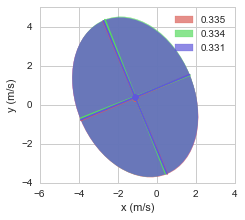

In [59]:
fig,ax = plt.subplots(figsize=(3.5,3.5))
plot_gmm_ellipses(gmm_em_result, ax=ax, xlabel='x'+speed_unit_text, ylabel='y'+speed_unit_text)

In [60]:
X = Y = PLOT_AXIS_RANGE
pdf_Z = generate_Z_from_X_Y(X,Y, lambda coords: exp(clf.score_samples(coords)))

def residule_between_kde_and_gmm(points):
    kde_vals = exp(kde.score_samples(points))
    gmm_vals = exp(clf.score_samples(points))
    return kde_vals - gmm_vals 

residual_Z = generate_Z_from_X_Y(X,Y, residule_between_kde_and_gmm)

plot_3d_prob_density(X,Y,pdf_Z)
plot_3d_prob_density(X,Y,residual_Z)
align_figures()

fig = plt.figure(figsize=pdf_fig_size)
plot_2d_prob_density(X,Y,kde_Z,xlabel='x'+speed_unit_text, ylabel='y'+speed_unit_text, colorbar_lim=colorbar_lim)
fig_em = plt.figure(figsize=pdf_fig_size)
plot_2d_prob_density(X,Y,pdf_Z,xlabel='x'+speed_unit_text, ylabel='y'+speed_unit_text, colorbar_lim=colorbar_lim)
fig = plt.figure(figsize=pdf_fig_size)
plot_2d_prob_density(X,Y,residual_Z,
                     xlabel='x'+speed_unit_text, ylabel='y'+speed_unit_text)
align_figures()

<img style="margin:0" align="left" src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAATkAAAE5CAYAAADr4VfxAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAALEgAACxIB0t1+/AAAIABJREFUeJzsvXmULNddJvjFmlvtVa/2qveq6llq2WBbEuJZpxs0iCMM
GpiGdpvF3T0wdk8DDVLbGPAiC7stP7wieQxGpy0Py+iZYwkNtPGxBg5gg419vAoJ0Ga9qldrVlZW
7pmRS6zzR9aNioiMiIyIjHqVWYrvHB29qrp582ZmxJe/9ftRmqZpiBAhQoQzCvq0DxAhQoQIJ4mI
5CJEiHCmEZFchAgRzjQikosQIcKZRkRyESJEONOISC5ChAhnGhHJRYgQ4UwjIrkIESKcaUQkFyFC
hDONiOQiRIhwphGRXIQIEc40IpKLECHCmUZEchEiRDjTiEguQoQIZxoRyUWIEOFMIyK5CBEinGlE
JBchQoQzjYjkIkSIcKYRkVyECBHONCKSixAhwplGRHIRIkQ404hILkKECGcaEclFiBDhTCMiuQgR
IpxpRCQXIUKEMw32tA8Q4fShaRpEUYQsy2AYBhzHgaZpUBR12keLEKFnUJqmaad9iAinh1arhXK5
jOHhYUiSBABIp9MYHx/H8PAwaJqOSC/CQCOy5F7GUBQFjUYDh4eHSKVSkGUZHMdB0zRomgZFUSDL
MkRRBEVRYBgmIr0IA4eI5F6G0DQNsixDURRQFAVFUbC+vg5FUcCyLFRVRb1eRywWA8seXyKE9Fqt
FmiaBsMwYBgGLMtGpBehbxG5qy8zqKoKSZJAPvb9/X0UCgUsLy+D53mIoohMJgOKoiBJEliWRTKZ
RCKRQDKZBMMwpv3IPhRF6WTHsmzHuggRTguRJfcyAXE/FUUBAMiyjN3dXaiqCo7jMDw8DFEUEY/H
wXEcRkdHkUql0Gq1UK/XUS6XcXBwoJMeIT4jmcmyDE3T0Gq1kM1mMTMzA57nI9KLcKqISO5lAFVV
IcsyVFUFRVGoVqvY29vDxMQERkZGsL29bVpPURQ0TQNFUYjH44jH45iYmICmaWg2m2g0GiiVSshk
MuA4Tic8I+kJggBRFHXSI+5tZOlFuN6ISO6Mg8TRSDIhk8mgUqlgaWlJt9S8RiwoitLJzEh69Xod
pVIJ+/v74HkeyWQSmqbppAocxwEj0otwvRGR3BmFqqpQFAWqqgIARFHEzs4OeJ7H2tqanlDoJVlg
JD3ynMTSU1UVOzs7iMViejwvkUiAptv15xHpRbheiEjuDEJVVeRyOZTLZSwvL6NYLCKTyWB6ehoT
ExMdxGa15Ii76hc0Tevxukqlgrm5OT1TWygU0Gw2EYvFTO6tG+nVajWMjIwgFotFpBchMCKSO2Mg
7inQJo7d3V00Gg2srKwgHo93rD/Jsg+aphGPx5FMJgG0ybfRaKDRaCCfz6PVaiEej+uWXjweN5Fe
NpsFy7KQZTmy9CIERkRyZwTW2jdJklCr1TA2Noa1tTWdPJweC5ws4QFt0kulUkilUgCOSa9eryOX
y+mkRyw9kvwglqWTe8vzfFSjF8EREcmdAVhr33K5HLLZLHiex8LCgutj7cghqLvqF1bSIx0YpAtD
lmVkMhmkUind0uuWyCC9txHpRSCISG7AQaw3oE0Se3t7kGUZs7OzqFQqnvbol3pwhmEwNDSEoaEh
AMDGxgZGRkYgiiKy2SwkSTJZenakJ0kSms2mTnoURYHjuMi9fRkjIrkBhdU9rdVq2N3dxdjYGJaX
lyEIgifycrJ4wiC+XvegKArJZBJjY2MAji29er2Og4MDyLKsk14ymUQsFusgvf39fX2PyNJ7eSIi
uQGEsfYNAA4ODlAsFrGwsIDh4WF9XVCSCYMAToJErJaeLMs66WUyGciybCpXicVi+lmcLL2I9M4+
IpIbIGiahnw+D47jEI/HIUkSdnd3QVEU1tbWwHGcvtbrTXu94m8nAZZlMTw8rBO7kfRKpRIURdET
LrFYzJSgMJIeiekR4otI72whIrkBAWnNKhaLepxqb28PU1NTmJqa6rgpeyWvQSQ+O9JLp9P6/xVF
MYkNGElPVVU9gWMkPZZlwbJsRHoDjIjkBgCKouiClgBQLBYhiiLOnz+v16AFhbFP1fi7swBCUIT4
JEkyWXqqquqEl0wmTRackfQkSUK1WsXMzExEegOIiOT6GNbkQrPZRK1WQywWw8WLF10zhoPshp4U
OI4Dx3EYGRkBAEiShHq9jkajgUKhAE3TTJYeIT1ZllGv13X3lqKoyNIbIEQk16cwKocAQKFQwMHB
AeLxOEZHR7uWRHglOWOMyu9jBx1EUmp0dBSappksvUKhAABIJBK6kKjR4jVaehHp9TcikutDGGvf
VFVFOp1Gs9nEysqKfvO9HBBWGYsXwqEoCjzPg+d5E+nV63VUq1W0Wi1cu3bN1tIDItLrZ0Qk10ew
uqf1eh07OzsYHh7WW7P8WGh+JJTIDWqUO+8VYZDUaZGDkfQ4jkOhUMDMzAzq9ToEQUAulwNN06aS
FSfSA9rlL6SY2VjPF+HkEZFcn8Ba+3Z4eIhcLof5+XmMjo4G2tMryWiahs3NTVNWked5SJJkKkvx
g7N0E2uapr8nPM9jbGxMH+NYr9dRq9WQzWbBMIwpkWG04FRVRTabRSqVwvDwsGkoEOnMiHAyiEju
lKFpGgRBwP7+PpaXl6Eoii5Lvra2Bp7nTev9xtq6gbR+DQ8PY3FxEZIkIZvNQhRFbG1tgWEY/aa1
m/HQ7/DqrvoFRVGIxWKIxWIYHx83kV61WtVJzygVbxQcsLP0yFCgiPTCRURypwiSXCATsIgs+fj4
OKanp3tqnu+2TtM0HBwcoFwug6IoTE5OQlEU8Dyv94ROTEyg1Wqh0WigUqng4ODAUe78LMMLUdqR
nvW9I2rJwHFCw+reiqIIAB1DgSLSC46I5E4JRveUSCPt7e1hcXFRb1uyg59Ym9M6ohLMsizW1tbw
0ksv6eew/p/MeCA3LpE7LxaL2N/f10UwrXpwZwlBYot279329jZYlu0YCmSchEbIjAwdss68jUjP
PyKSu86w033b3d2Fpmm4ePGip8B/L+5qpVJx7ZTotiex4CYnJ3W5czs9OFJycdoIy13tdQ+ScR0Z
GdFnYBCp+HK5jEwmA57nTYkMJ9Lb39/H3NycaRJaRHrOiEjuOsI6NatcLiOdTmNiYsJzZjNoT6rR
PbXrlOhV7hwwq4SQkYfGeN6gilueRFzPz1AgY2iAoig0Gg29Cyay9LojIrnrBGPtm6ZpSKfTEAQB
Fy5c0EsUvCBIoa7VPbWSqV3fK4kd+YFRJaTRaGBychKapnlqo3o5wI0s3YYCGUMDiUTCZCVH7m13
RCR3wrBrzdrZ2UEikcDa2hoYhoGiKL5q2vwkHry6pydhrZCSCtIwb22jAmDKPgYtV3HD9SwoDnMf
o5VsDQ2Qkh+7oUBG0pNlOSI9RCR3orA21ufzeWSzWczOzmJ8fFz/vd/CXT+Jh/39/a6N/CdVYmGF
XRsVqTM7PDw03dik5OKkznIa6IUsje9NoVDA6uoqWq0W6vV616FAgD3ptVotDA0NnfmOjIjkTgCa
pkFRFDz77LO4ePEiACCdTkMURayurupijgR+XdBua4l7CsDWPXXak1zo16N31dhRYC2uJSUXqqoi
n89jaGjoVMtVTqrWLgjI52KNhzoNBXIjvc3NTZw/f14vSCbFyUaL8CwgIrmQYW2sFwQBmUwGIyMj
WFxc7Do1y0s9lhuIe3ru3Dk0Gg1PxNAPF7Rdndn6+joYhumpXKUfMrwEYZClsaDYCLdJaIeHhxBF
0SQVH4/HoWmafn3YWXqkOHnQSS8iuRBhbc0izfULCwu6vI8dyEXrleTsblxN05DJZFCpVHT3NJPJ
eL6xrHueNjm

<img style="margin:0" align="left" src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAPIAAAC3CAYAAAAo/QN7AAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAALEgAACxIB0t1+/AAAIABJREFUeJztnXtQVPf5/9/LwiJll1CiIIqgEmjwfkFjGkMaU6U6NAQN
CCjMGKOJHZNorTF2BGxFMRfNzNdLUjWpEbSA5DeTZJohsWq0iYmNUBS5qMWwiiigBrMgAp49vz82
53h2Odfl7JXPa2Zn3D23Z5E3z/N5Ps/n+WhomqZBIBA8Gh9XG0AgEPoPETKB4AUQIRMIXgARMoHg
BRAhEwheABEygeAFuETIZ8+eRVZWFgDAaDQiIyMDmZmZyMvLg9lsdoVJBIJH43Qh7927Fxs2bEB3
dzcAoKCgAKtWrcKhQ4dA0zSOHj3qbJMIBI/H6UKOjIzEjh072Pc1NTWYPn06ACAhIQGnTp1ytkkE
gsfj6+wHJiYmoqmpiX1P0zQ0Gg0AIDAwECaTSfIeFRUVDrOP4B1MnTpV8pz/Vh2FmQrmPabT6TB+
/Hi1zXIYTheyLT4+D4KCzs5OBAUFybquNP+ko0ySjanDBIPe4GoziB02pG1IkHWemQpGWGQB77GW
K+vVNMnhuDxrPWbMGJw+fRoAcPLkScTHx7vYIgLB83C5kNetW4cdO3Zg4cKF6O3tRWJioqtNIhA8
DpeE1hERESgtLQUAjBo1CkVFRa4wg0DwGlzukQkEQv9xebKL0JeLt7us3seGBLjIEoKnQITsImzF
yiV6/Aj23w3VV4mw3Qyz2YyNGzfiwoUL0Ol0yM/PR1RUFHv82LFj2LVrF3x9fbFgwQKkpaWxx86e
PYt33nkHhYWFAIC6ujps2rQJWq0WOp0Ob775JgYPHoz8/HxUVlYiMDAQALB7924YDMIzAkTITsRW
kFzBCmF7DlfYRNCu4V//+hd6enpQUlKCqqoqbN26Fe+99x4AoLe3FwUFBSgrK0NAQAAyMjIwa9Ys
DB48GHv37sWnn36KgIAH/2+bN29GTk4O4uLiUFxcjL1792L9+vWoqanBvn37EBISIssmMkZ2Ahdv
d7Hiix4/gn3ZA/da7n0JzqOiogJPPvkkAGDSpEk4f/48e6yhoQGRkZF46KGHoNPpMHXqVHz//fcA
+lY1AsD27dsRFxcHAKAoCv7+/jCbzTAajcjNzUV6ejrKysokbSIe2YFwxas2zD0bqq+iqUsDbU8X
8dBOoqOjA3q9nn2v1Wpx//59+Pr6oqOjwyoEDgwMREdHB4C+VY0AEBoaCgCorKxEUVERDh48iLt3
72Lx4sVYsmQJKIpCdnY2xo0bh0cffVTQJuKRHYCtB3Yk0eNHIDz6Yfa5BMej1+vR2dnJvjebzfD1
9eU91tnZKTq2BYDPP/8ceXl52LNnD0JCQhAQEIDs7GwEBARAr9djxowZqK+vF70HEbKK8IXQzoJ5
Hgm3Hc+UKVNw8qSlRLiqqgqxsbHssejoaBiNRrS3t6OnpwdnzpzB5MmTBe/1ySefoKioCIWFhRgx
wvL70tjYiIyMDFAUhd7eXlRWVmLs2LGiNpHQWgW4wnGmePmIHj+CTYiRUNsxzJ49G9988w3S09NB
0zS2bNmCzz77DHfv3sXChQvxxhtvYOnSpaBpGgsWLEBYWBjvfSiKwubNmxEeHo5XXnkFADBt2jS8
+uqrSE5ORlpaGvz8/JCcnIyYmBhRmzSe2Ne6oqLCLRZN1LV1QKvVAnCtgE0mE2/41lB9FYDzstvu
tGhCzuqniooK0UUTcu7hLhCPbAfu5IHFIN5ZmtNdUbyfj3SuGf2GCFkh3DGwnLXTroadqnKydyY4
FyJkBaidia42/ajo/PGGX9r9LOKdvRsiZJmoJWKueKNjhsq+ruHSDatr7RE1EbP3QoQsgdoCViJe
LrbXVV+6AUC5oLliBkio7S0QIYughoj7K2AhmPtVX7qB+xSFyZCfLeZWhRHv7B2QghAB+iviatOP
DhMxF1bQCsfbAKxqtgmeDREyD2qIGLCIzJEiZhg2PAjRMUOt/njIhYjZOyBCtkFNETsbe70zEbPn
Q8bIHPoj4v4K+Gxnm+CxiYFDZN8nOmYom+FWkghjkmAEz4QI+WecKWI+0cZGhfLbZWy1Ol+OqO0V
MwCS/PJQiJDhPBFzBSkkXFtszztrbGX/LSZqe8RMvLLnMuDHyPaKuNr0I/5HWTaikxLx2c42VsSx
UaGyRcwH93qxcJxrl5IxM7MUkuBZDGiP3B8RA5ZssdSica6A1SQ2KpQNuymawhSBeWTufDPQvzJP
gvsy4D2yvSJWEkqrLWIGR3ln4pU9jwHrkS/e7nKYiB0tYFsiQvW4fqsLZzvbZI2b5TIQEl+XO5p4
Px/pXDP6jdsIOSUlhW1oFhERgYIC/gXfauAuIq7qbZH9/El+/F0mGLihtpSYqy/dkAyxB0riq536
tatNUAW3EHJ3dzdommabdjsSe0JGNUVsK964YdKCr2tuZa8TE7RcMQOQnc0eCF5ZKWo2qDcajXjj
jTeg0WgQExODvLw8+Pj4oLS0FMXFxfD19cWKFSvw9NNPi9rkFmPk+vp6dHV14YUXXkB2djaqqqoc
8hx7kluOEHHcsFD2JQfu+VW9LaKeXM6YWe542Z27n7gSboP6NWvWYOvWrewxpkH9hx9+iMLCQpSU
lODmzZsAgL1792LDhg3o7u5mzy8oKMCqVatw6NAh0DSNo0ePoq2tDYWFhSguLsYHH3yA7du3o6en
R9Qmt/DIgwYNwtKlS5GamorGxkYsW7YM5eXlbItRPkwdyrtzUJQG4dEPy+7swUwvDRseJHiNyWTC
JdrS/jQiVM9r10XfB59FBev71VkkwmDxjhXtzQCA2PuWbDX3ueEPB6CptQOVP91AjCaQ9z6hQwPR
fO0nSVsoikJdWwciAuS1drPn/8XTkNugHgDboH7u3Llsg/rXX3+dPb+mpgbTp08HACQkJOCbb76B
j48PJk+eDJ1OB51Oh8jISNTX12PChAmCNrmFkEeNGoWoqChoNBqMGjUKwcHBaGtrQ3h4uOA1Spu8
XbzdhdhJyjyxr1Yr6olNJhMu+9yDFlpBT1zV2wIttLK9r1zGGQyoa25Fg/Yuort/0efnEac34KKx
FZdxTzDM9tV2ohH3RUNswyQDGqqvwqCXDq/dpfmeo1GzQT1N09BoNOy5JpNJ9B5CuEVoXVZWxoYn
LS0t6OjowJAh8uuLpVA6LpYbTl+iO0ULPLihtBwu0FesXlIw9+V6fC5SYbbcklIyHWWNmg3qfXx8
rM4NCgqyq8m9Wwj5+eefh8lkQkZGBlavXo0tW7aIhtX2IHe8p2RMHBGqFzwuR8S2wh0zJNTqJUfY
zP2Fxs1yxsxyK7+ImC2o2aB+zJgxOH36NADg5MmTiI+Px4QJE1BRUYHu7m6YTCY0NDRYPYMPtwit
dTodtm3b5mozFIk4NipUcDwoJWKuKMcMERY691htWyt73a80kVbnRQXr0WTqQlVvC29Wm8lm8yF3
bnmgTEfJQa0G9QCwbt065OTkYPv27Rg9ejQSExOh1WqRlZWFzMxM0DSN1atXw9/fX9Qmr29QL3fO
2J7sNN+YUEzEcgUsRm3bA0EygmYa1Nc1W44JTVFdNLYKjpcbZMwtSzW8d5cxspIG9f9P9zXvsfk9
Mz2qQb1bhNbuQn+nmOSImAmb7YV7vW24LRVmA9KlnGKQ6Sj3hQgZ8saIaolYDp0+dexLCHvELDZe
ZloFyYGMld0PrxayklJMORlcqbJLscSWmIi5wmXEGxc8VPAY955jhoTiyqCbfexgikeUfgdSJOKZ
uEWyy5Uo8cZCVPW2iCa2hETMFSYjXC62n9W130CnTx0CzXFWn4/S63HhXt9EWNywUFQ18yfA+Mo4
lS6qILgPXu2

## Goodness-of-fit Statistics

In [61]:
points = FITTING_RANGE
gmm_pdf_result = exp(clf.score_samples(points))
gof_df(gmm_pdf_result, kde_result, BIN_WIDTH)

R_square    K_S Chi_square Chi_square_2           MSE RMSE / Max RMSE / Mean
0    0.959  0.020      0.132     1414.502  3.611076e-07      0.048       0.257

In [62]:
gmm_em = group_gmm_param_from_gmm_param_array(gmm_em_result, sort_group = True)
mixed_model_pdf_em = generate_gmm_pdf_from_grouped_gmm_param(gmm_em)

# 6. GMM by Optimization

In [63]:
sample, points = SPEED_SET, FITTING_RANGE
# max_speed = df.speed.max()
max_speed = df['speed'].quantile(.99)
print(FIT_METHOD)

square_error


In [64]:
# from GMM,EM 
# GMM format: weight, meanx, meany, sigx, sigy, rho
x0 = gmm_em_result

cons = [
        # sum of every 6th element, which is the fraction of each gaussian
        {'type': 'eq', 'fun': lambda x: sum(x[::6]) - 1},
        # # limit the width/height ratio of elliplse, optional
#         {'type': 'ineq', 'fun': lambda x: width_height_ratios_set(x) - 1/3},
#         {'type': 'ineq', 'fun': lambda x: 3 - width_height_ratios_set(x)},
]

bonds = [(0., 0.99),(-fit_limit, fit_limit),(-fit_limit, fit_limit),
         (0., fit_limit),(0., fit_limit),(-0.99, 0.99)]*(len(x0)//6)

result = sp.optimize.minimize(
    lambda x0: GMM_fit_score(x0, kde_result, points, FIT_METHOD),
    x0,
    bounds = bonds,
    constraints=cons,
    tol = 0.000000000001,
    options = {"maxiter": 500})
result

     fun: -16.282918178064875
     jac: array([  2.28701210e+00,   4.76837158e-07,  -4.76837158e-07,
        -2.38418579e-07,   4.76837158e-07,   1.19209290e-06,
         2.28701377e+00,  -2.38418579e-07,   7.15255737e-07,
         2.38418579e-07,  -4.76837158e-07,   7.15255737e-07,
         2.28700781e+00,   4.76837158e-07,   2.38418579e-07,
         9.53674316e-07,   4.76837158e-07,   2.38418579e-07])
 message: 'Optimization terminated successfully.'
    nfev: 2018
     nit: 99
    njev: 99
  status: 0
 success: True
       x: array([ 0.69817063, -1.81695926,  2.04974653,  3.25769307,  3.38615982,
       -0.02293102,  0.25401483,  1.02196012, -3.89062361,  2.44990517,
        2.73956113,  0.29894901,  0.04781454, -1.88520028, -1.20081198,
        1.06950631,  1.77269648, -0.49765693])

## 6.1 GMM Result

In [65]:
gmm = group_gmm_param_from_gmm_param_array(result.x, sort_group = True)
mixed_model_pdf = generate_gmm_pdf_from_grouped_gmm_param(gmm)
gmm_pdf_result = mixed_model_pdf(points)
pretty_print_gmm(gmm)

weight  mean_x  mean_y  sig_x  sig_y    corr
1  0.698  -1.817   2.050  3.258  3.386  -0.023
2  0.254   1.022  -3.891  2.450  2.740   0.299
3  0.048  -1.885  -1.201  1.070  1.773  -0.498

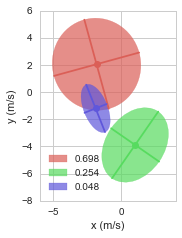

In [66]:
fig_gmm, ax = plt.subplots(figsize=(3.5,3.5))
plot_gmm_ellipses(gmm, ax=ax, xlabel='x'+speed_unit_text, ylabel='y'+speed_unit_text)

## 6.2 Bivariate Goodness-of-fit statistics

In [67]:
gof_df(gmm_pdf_result, kde_result, BIN_WIDTH)

R_square    K_S Chi_square Chi_square_2           MSE RMSE / Max RMSE / Mean
0    0.990  0.010      0.076    18707.056  8.480442e-08      0.023       0.124

In [68]:
# Empirical Power
gofs_mean_set_bivar

Chi_square  Chi_square_2       K_S           MSE  RMSE / Max  \
year_lim                                                                     
(2001, 2006)    0.276953  2.684603e+06  0.018811  1.321299e-07    0.027436   
(1991, 1996)    0.117373  1.312346e+06  0.018339  1.436740e-07    0.029923   

              RMSE / Mean  R_square  
year_lim                             
(2001, 2006)     0.154744  0.985249  
(1991, 1996)     0.161446  0.983623

In [69]:
X = Y = PLOT_AXIS_RANGE
pdf_Z = generate_Z_from_X_Y(X,Y, mixed_model_pdf)# passing a function as an argument

def residule_between_kde_and_gmm(points):
    kde_vals = exp(kde.score_samples(points))
    gmm_vals = mixed_model_pdf(points)
    return kde_vals - gmm_vals 

residual_Z = generate_Z_from_X_Y(X,Y, residule_between_kde_and_gmm)

plot_3d_prob_density(X,Y,pdf_Z)
plt.gca().set_xlabel('x')
plt.gca().set_ylabel('y')

plot_3d_prob_density(X,Y,residual_Z)
align_figures()

fig = plt.figure(figsize=pdf_fig_size)
plot_2d_prob_density(X,Y,kde_Z, xlabel='x'+speed_unit_text, ylabel='y'+speed_unit_text)
fig_gmm = plt.figure(figsize=pdf_fig_size)
plot_2d_prob_density(X,Y,pdf_Z, xlabel='x'+speed_unit_text, ylabel='y'+speed_unit_text)
fig = plt.figure(figsize=pdf_fig_size)
plot_2d_prob_density(X,Y,residual_Z,  xlabel='x'+speed_unit_text, ylabel='y'+speed_unit_text)
align_figures()

<img style="margin:0" align="left" src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAATkAAAE5CAYAAADr4VfxAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAALEgAACxIB0t1+/AAAIABJREFUeJzsvXmULFd9JvjFmlvt+6uqV+tDsowbjEDIGi+y1Y0xjDnG
zWDDnJlpBrp78GBolmNACFkM4hmxSbjBqI1s7B49PBKWm8EcGPvYZjPQLLIsbEsCpFfvVVVWVlVW
LpV7Zmx3/si6UTcjIyIjMqNeZZbiO+edqlcZeeNmZsSXv/X7cYQQghAhQoQ4o+BPewMhQoQIcZII
SS5EiBBnGiHJhQgR4kwjJLkQIUKcaYQkFyJEiDONkORChAhxphGSXIgQIc40QpILESLEmUZIciFC
hDjTCEkuRIgQZxohyYUIEeJMIyS5ECFCnGmEJBciRIgzjZDkQoQIcaYRklyIECHONEKSCxEixJlG
SHIhQoQ40whJLkSIEGcaIcmFCBHiTCMkuRAhQpxphCQXIkSIM42Q5EKECHGmEZJciBAhzjRCkgsR
IsSZRkhyIUKEONMQT3sDIU4fhBAoigJN0yAIAiRJAs/z4DjutLcWIkTP4Agh5LQ3EeL00Gg0UCgU
MDw8DFVVAQCpVArj4+MYHh4Gz/Mh6YUYaISW3LMYuq6jVqvh4OAAiUQCmqZBkiQQQkAIga7r0DQN
iqKA4zgIghCSXoiBQ0hyz0IQQqBpGnRdB8dx0HUdly9fhq7rEEURhmGgWq0iEolAFI8vEUp6jUYD
PM9DEAQIggBRFEPSC9G3CN3VZxkMw4CqqqAf++7uLnK5HJaWliDLMhRFwd7eHjiOg6qqEEUR8Xgc
sVgM8XgcgiC0rEfX4TjOJDtRFNuOCxHitBBacs8SUPdT13UAgKZpSCaTMAwDkiRheHgYiqIgGo1C
kiSMjo4ikUig0WigWq2iUChgf3/fJD1KfCyZaZoGQggajQbS6TRmZ2chy3JIeiFOFSHJPQtgGAY0
TYNhGOA4DqVSCTs7O5iYmMDIyAi2trZajuc4DoQQcByHaDSKaDSKiYkJEEJQr9dRq9VweHiIvb09
SJJkEh5LepVKBYqimKRH3dvQ0gtxrRGS3BkHjaPRZMLe3h6KxSLOnz9vWmpeIxYcx5lkxpJetVrF
4eEhdnd3Icsy4vE4CCEmqQLHccCQ9EJca4Qkd0ZhGAZ0XYdhGAAARVGwvb0NWZaxvr5uJhR6SRaw
pEfPSS09wzCwvb2NSCRixvNisRh4vll/HpJeiGuFkOTOIAzDQCaTQaFQwNLSEvL5PPb29jAzM4OJ
iYk2YrNactRd9Que5814XbFYxLlz58xMbS6XQ71eRyQSaXFv3UivXC5jZGQEkUgkJL0QXSMkuTMG
6p4CTeJIJpOo1WpYXV1FNBptO/4kyz54nkc0GkU8HgfQJN9arYZarYZsNotGo4FoNGpaetFotIX0
0uk0RFGEpmmhpReia4Qkd0ZgrX1TVRXlchljY2NYX183ycPpucDJEh7QJL1EIoFEIgHgmPSq1Soy
mYxJetTSo8kPalk6ubeyLIc1eiEcEZLcGYC19i2TySCdTkOWZSwsLLg+144cunVX/cJKerQDg3Zh
aJqGvb09JBIJ09LrlMigvbch6YWgCEluwEGtN6BJEjs7O9A0DXNzcygWi57W6Jd6cEEQMDQ0hKGh
IQDAxsYGRkZGoCgK0uk0VFVtsfTsSE9VVdTrdZP0OI6DJEmhe/ssRkhyAwqre1oul5FMJjE2Noal
pSVUKhVP5OVk8QRBfL2uwXEc4vE4xsbGABxbetVqFfv7+9A0zSS9eDyOSCTSRnq7u7vmGqGl9+xE
SHIDCLb2DQD29/eRz+exsLCA4eFh87huSSYIAjgJErFaepqmmaS3t7cHTdNaylUikYi5FydLLyS9
s4+Q5AYIhBBks1lIkoRoNApVVZFMJsFxHNbX1yFJknms15v2WsXfTgKiKGJ4eNgkdpb0Dg8Poeu6
mXCJRCItCQqW9GhMjxJfSHpnCyHJDQhoa1Y+nzfjVDs7O5iamsLU1FTbTdkreQ0i8dmRXiqVMn/q
ut4iNsCSnmEYZgKHJT1RFCGKYkh6A4yQ5AYAuq6bgpYAkM/noSgKlpeXzRq0bsH2qbJ/OwugBEWJ
T1XVFkvPMAyT8OLxeIsFx5KeqqoolUqYnZ0NSW8AEZJcH8OaXKjX6yiXy4hEIrhw4YJrxnCQ3dCT
giRJkCQJIyMjAABVVVGtVlGr1ZDL5UAIabH0KOlpmoZqtWq6txzHhZbeACEkuT4FqxwCALlcDvv7
+4hGoxgdHe1YEuGV5NgYld/nDjqopNTo6CgIIS2WXi6XAwDEYjFTSJS1eFlLLyS9/kZIcn0ItvbN
MAykUinU63Wsrq6aN9+zAUGVsXghHI7jIMsyZFluIb1qtYpSqYRGo4ErV67YWnpASHr9jJDk+ghW
97RarWJ7exvDw8Nma5YfC82PhBK9QVm5814RBEmdFjmwpCdJEnK5HGZnZ1GtVlGpVJDJZMDzfEvJ
ihPpAc3yF1rMzNbzhTh5hCTXJ7DWvh0cHCCTyWB+fh6jo6NdremVZAghuHr1aktWUZZlqKraUpbi
B2fpJiaEmO+JLMsYGxszxzhWq1WUy2Wk02kIgtCSyGAtOMMwkE6nkUgkMDw83DIUiHZmhDgZhCR3
yiCEoFKpYHd3F0tLS9B13ZQlX19fhyzLLcf7jbV1Am39Gh4exuLiIlRVRTqdhqIo2NzchCAI5k1r
N+Oh3+HVXfULjuMQiUQQiUQwPj7eQnqlUskkPVYqnhUcsLP06FCgkPSCRUhypwiaXKATsKgs+fj4
OGZmZnpqnu90HCEE+/v7KBQK4DgOk5OT0HUdsiybPaETExNoNBqo1WooFovY3993lDs/y/BClHak
Z33vqFoycJzQsLq3iqIAQNtQoJD0ukdIcqcE1j2l0kg7OztYXFw025bs4CfW5nQcVQkWRRHr6+t4
+umnzX1Yf9IZD/TGpXLn+Xweu7u7pgimVQ/uLKGb2KLde7e1tQVRFNuGArGT0CiZ0aFD1pm3Ien5
R0hy1xh2um/JZBKEEFy4cMFT4L8Xd7VYLLp2SnRak1pwk5OTpty5nR4cLbk4bQTlrva6Bs24joyM
mDMwqFR8oVDA3t4eZFluSWQ4kd7u7i7OnTvXMgktJD1nhCR3DWGdmlUoFJBKpTAxMeE5s9ltTyrr
ntp1SvQqdw60qoTQkYdsPG9QxS1PIq7nZygQGxrgOA61Ws3sggktvc4ISe4aga19I4QglUqhUqlg
ZWXFLFHwgm4Kda3uqZVM7fpeaezID1iVkFqthsnJSRBCPLVRPRvgRpZuQ4HY0EAsFmuxkkP3tjNC
kjth2LVmbW9vIxaLYX19HYIgQNd1XzVtfhIPXt3Tk7BWaEkFbZi3tlEBaMk+dluu4oZrWVAc5Dqs
lWwNDdCSH7uhQCzpaZoWkh5CkjtRWBvrs9ks0uk05ubmMD4+bv7db+Gun8TD7u5ux0b+kyqxsMKu
jYrWmR0cHLTc2LTk4qT2chrohSzZ9yaXy2FtbQ2NRgPVarXjUCDAnvQajQaGhobOfEdGSHInAEII
dF3HE088gQsXLgAAUqkUFEXB2tqaKeZI4dcF7XQsdU8B2LqnTmvSC/1a9K6yHQXW4lpacmEYBrLZ
LIaGhk61XOWkau26Af1crPFQp6FAbqR39epVLC8vmwXJtDiZtQjPAkKSCxjWxvpKpYK9vT2MjIxg
cXGx49QsL/VYbqDu6fT0NGq1midi6IcL2q7O7PLlyxAEoadylX7I8FIEQZZsQTELt0loBwcHUBSl
RSo+Go2CEGJeH3aWHi1OHnTSC0kuQFhbs2hz/cLCginvYwd60XolObsblxCCvb09FItF0z3d29vz
fGNZ1zxtcqD

<img style="margin:0" align="left" src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAPIAAAC3CAYAAAAo/QN7AAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAALEgAACxIB0t1+/AAAIABJREFUeJztnXtQVPf5/9/LwiJll1CiIIqgEmjwfkFjGkMaU6U6NAQN
CCjMGKOJHZNorTF2BGxFMRfNzNdLUjWpEbSA5DeTZJohsWq0iYmNUBS5qMWwiiigBrMgAp49vz82
53h2Odfl7JXPa2Zn3D23Z5E3z/N5Ps/n+WhomqZBIBA8Gh9XG0AgEPoPETKB4AUQIRMIXgARMoHg
BRAhEwheABEygeAFuETIZ8+eRVZWFgDAaDQiIyMDmZmZyMvLg9lsdoVJBIJH43Qh7927Fxs2bEB3
dzcAoKCgAKtWrcKhQ4dA0zSOHj3qbJMIBI/H6UKOjIzEjh072Pc1NTWYPn06ACAhIQGnTp1ytkkE
gsfj6+wHJiYmoqmpiX1P0zQ0Gg0AIDAwECaTSfIeFRUVDrOP4B1MnTpV8pz/Vh2FmQrmPabT6TB+
/Hi1zXIYTheyLT4+D4KCzs5OBAUFybquNP+ko0ySjanDBIPe4GoziB02pG1IkHWemQpGWGQB77GW
K+vVNMnhuDxrPWbMGJw+fRoAcPLkScTHx7vYIgLB83C5kNetW4cdO3Zg4cKF6O3tRWJioqtNIhA8
DpeE1hERESgtLQUAjBo1CkVFRa4wg0DwGlzukQkEQv9xebKL0JeLt7us3seGBLjIEoKnQITsImzF
yiV6/Aj23w3VV4mw3Qyz2YyNGzfiwoUL0Ol0yM/PR1RUFHv82LFj2LVrF3x9fbFgwQKkpaWxx86e
PYt33nkHhYWFAIC6ujps2rQJWq0WOp0Ob775JgYPHoz8/HxUVlYiMDAQALB7924YDMIzAkTITsRW
kFzBCmF7DlfYRNCu4V//+hd6enpQUlKCqqoqbN26Fe+99x4AoLe3FwUFBSgrK0NAQAAyMjIwa9Ys
DB48GHv37sWnn36KgIAH/2+bN29GTk4O4uLiUFxcjL1792L9+vWoqanBvn37EBISIssmMkZ2Ahdv
d7Hiix4/gn3ZA/da7n0JzqOiogJPPvkkAGDSpEk4f/48e6yhoQGRkZF46KGHoNPpMHXqVHz//fcA
+lY1AsD27dsRFxcHAKAoCv7+/jCbzTAajcjNzUV6ejrKysokbSIe2YFwxas2zD0bqq+iqUsDbU8X
8dBOoqOjA3q9nn2v1Wpx//59+Pr6oqOjwyoEDgwMREdHB4C+VY0AEBoaCgCorKxEUVERDh48iLt3
72Lx4sVYsmQJKIpCdnY2xo0bh0cffVTQJuKRHYCtB3Yk0eNHIDz6Yfa5BMej1+vR2dnJvjebzfD1
9eU91tnZKTq2BYDPP/8ceXl52LNnD0JCQhAQEIDs7GwEBARAr9djxowZqK+vF70HEbKK8IXQzoJ5
Hgm3Hc+UKVNw8qSlRLiqqgqxsbHssejoaBiNRrS3t6OnpwdnzpzB5MmTBe/1ySefoKioCIWFhRgx
wvL70tjYiIyMDFAUhd7eXlRWVmLs2LGiNpHQWgW4wnGmePmIHj+CTYiRUNsxzJ49G9988w3S09NB
0zS2bNmCzz77DHfv3sXChQvxxhtvYOnSpaBpGgsWLEBYWBjvfSiKwubNmxEeHo5XXnkFADBt2jS8
+uqrSE5ORlpaGvz8/JCcnIyYmBhRmzSe2Ne6oqLCLRZN1LV1QKvVAnCtgE0mE2/41lB9FYDzstvu
tGhCzuqniooK0UUTcu7hLhCPbAfu5IHFIN5ZmtNdUbyfj3SuGf2GCFkh3DGwnLXTroadqnKydyY4
FyJkBaidia42/ajo/PGGX9r9LOKdvRsiZJmoJWKueKNjhsq+ruHSDatr7RE1EbP3QoQsgdoCViJe
LrbXVV+6AUC5oLliBkio7S0QIYughoj7K2AhmPtVX7qB+xSFyZCfLeZWhRHv7B2QghAB+iviatOP
DhMxF1bQCsfbAKxqtgmeDREyD2qIGLCIzJEiZhg2PAjRMUOt/njIhYjZOyBCtkFNETsbe70zEbPn
Q8bIHPoj4v4K+Gxnm+CxiYFDZN8nOmYom+FWkghjkmAEz4QI+WecKWI+0cZGhfLbZWy1Ol+OqO0V
MwCS/PJQiJDhPBFzBSkkXFtszztrbGX/LSZqe8RMvLLnMuDHyPaKuNr0I/5HWTaikxLx2c42VsSx
UaGyRcwH93qxcJxrl5IxM7MUkuBZDGiP3B8RA5ZssdSica6A1SQ2KpQNuymawhSBeWTufDPQvzJP
gvsy4D2yvSJWEkqrLWIGR3ln4pU9jwHrkS/e7nKYiB0tYFsiQvW4fqsLZzvbZI2b5TIQEl+XO5p4
Px/pXDP6jdsIOSUlhW1oFhERgYIC/gXfauAuIq7qbZH9/El+/F0mGLihtpSYqy/dkAyxB0riq536
tatNUAW3EHJ3dzdommabdjsSe0JGNUVsK964YdKCr2tuZa8TE7RcMQOQnc0eCF5ZKWo2qDcajXjj
jTeg0WgQExODvLw8+Pj4oLS0FMXFxfD19cWKFSvw9NNPi9rkFmPk+vp6dHV14YUXXkB2djaqqqoc
8hx7kluOEHHcsFD2JQfu+VW9LaKeXM6YWe542Z27n7gSboP6NWvWYOvWrewxpkH9hx9+iMLCQpSU
lODmzZsAgL1792LDhg3o7u5mzy8oKMCqVatw6NAh0DSNo0ePoq2tDYWFhSguLsYHH3yA7du3o6en
R9Qmt/DIgwYNwtKlS5GamorGxkYsW7YM5eXlbItRPkwdyrtzUJQG4dEPy+7swUwvDRseJHiNyWTC
JdrS/jQiVM9r10XfB59FBev71VkkwmDxjhXtzQCA2PuWbDX3ueEPB6CptQOVP91AjCaQ9z6hQwPR
fO0nSVsoikJdWwciAuS1drPn/8XTkNugHgDboH7u3Llsg/rXX3+dPb+mpgbTp08HACQkJOCbb76B
j48PJk+eDJ1OB51Oh8jISNTX12PChAmCNrmFkEeNGoWoqChoNBqMGjUKwcHBaGtrQ3h4uOA1Spu8
XbzdhdhJyjyxr1Yr6olNJhMu+9yDFlpBT1zV2wIttLK9r1zGGQyoa25Fg/Yuort/0efnEac34KKx
FZdxTzDM9tV2ohH3RUNswyQDGqqvwqCXDq/dpfmeo1GzQT1N09BoNOy5JpNJ9B5CuEVoXVZWxoYn
LS0t6OjowJAh8uuLpVA6LpYbTl+iO0ULPLihtBwu0FesXlIw9+V6fC5SYbbcklIyHWWNmg3qfXx8
rM4NCgqyq8m9Wwj5+eefh8lkQkZGBlavXo0tW7aIhtX2IHe8p2RMHBGqFzwuR8S2wh0zJNTqJUfY
zP2Fxs1yxsxyK7+ImC2o2aB+zJgxOH36NADg5MmTiI+Px4QJE1BRUYHu7m6YTCY0NDRYPYMPtwit
dTodtm3b5mozFIk4NipUcDwoJWKuKMcMERY691htWyt73a80kVbnRQXr0WTqQlVvC29Wm8lm8yF3
bnmgTEfJQa0G9QCwbt065OTkYPv27Rg9ejQSExOh1WqRlZWFzMxM0DSN1atXw9/fX9Qmr29QL3fO
2J7sNN+YUEzEcgUsRm3bA0EygmYa1Nc1W44JTVFdNLYKjpcbZMwtSzW8d5cxspIG9f9P9zXvsfk9
Mz2qQb1bhNbuQn+nmOSImAmb7YV7vW24LRVmA9KlnGKQ6Sj3hQgZ8saIaolYDp0+dexLCHvELDZe
ZloFyYGMld0PrxayklJMORlcqbJLscSWmIi5wmXEGxc8VPAY955jhoTiyqCbfexgikeUfgdSJOKZ
uEWyy5Uo8cZCVPW2iCa2hETMFSYjXC62n9W130CnTx0CzXFWn4/S63HhXt9EWNywUFQ18yfA+Mo4
lS6qILgPXu2

In [70]:
%%time
if df_all_years.index.year[0] <= 2000:
    # GMM test against previous data
    fig1, ax1 = plt.subplots(figsize=(3,2.5))
    fig2, ax2 = plt.subplots(figsize=(3,2.5))
    gofs_mean_set_bivar_previous = []
    prop_cycle = iter(mpl.rcParams['axes.color_cycle'])
    for year_length in [10]:
        color = next(prop_cycle)
        start_year, end_year = df_all_years.index.year[0], 2015-year_length+1
        gofs_bivar_previous=Parallel(n_jobs=-1)(delayed(gmm_gofs_in_previous)(df_all_years[str(sub_start_year):str(sub_start_year+year_length-1)], gmm_pdf_result, config) 
           for sub_start_year in arange(start_year, end_year+1)) 
        gofs_bivar_previous=pd.DataFrame(gofs_bivar_previous, index=arange(start_year, end_year+1))    
        gofs_bivar_set[year_length].plot(y='R_square',ax=ax1, style='--', color=color, label='Empirical')
        gofs_bivar_set[year_length].plot(y='K_S',ax=ax2, style='--', color=color, label='Empirical')
        gofs_bivar_previous.plot(y='R_square', color=color, ax=ax1, label='GMM on previous')
        gofs_bivar_previous.plot(y='K_S', color=color, ax=ax2, label='GMM on previous')
        year_lim = end_year-year_length-5, end_year-year_length
        gofs_mean = gofs_bivar_previous.query('index >= @year_lim[0] & index <= @year_lim[1]').mean().to_dict()
        gofs_mean['year_lim']=year_lim
        gofs_mean_set_bivar_previous.append(gofs_mean)

    print('10 year comparison')
    plt_configure(ax=ax1, ylabel='$\ R^2$', xlabel='start year', legend=True)
    plt_configure(ax=ax2, ylabel='K-S', xlabel='start year', legend=True)
    align_figures()
    display(pd.DataFrame(gofs_mean_set_bivar_previous).set_index('year_lim'))

D:\ProgramData\Anaconda3\lib\site-packages\matplotlib\__init__.py:938: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


10 year comparison


<img style="margin:0" align="left" src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAOUAAAC3CAYAAADtj5nqAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAALEgAACxIB0t1+/AAAIABJREFUeJztnXl8jNf+x98zk31fiUQiEgSxRKJEY6eNtSq2JgStLtRW
SmmvS0u321qKe0u1lLq/UlTpQpVYbyxZSIKESCKRRRLZt8kyM8/vj9RUKmSRTCbxvF8vL+aZ5znn
e8Z85jzPOd9zPhJBEARERES0BmlTByAiIlIVUZQiIlqGKEoRES1DFKWIiJYhilJERMsQRSkiomU0
mSgjIyMJDAx86PjJkyeZMGECU6ZMYd++fQCoVCpWrlzJlClTCAwMJCkpSdPhiohoDJ2mqPTrr7/m
559/xtDQsMrxiooKPvnkEw4cOIChoSH+/v4MHTqUy5cvU15ezg8//EBERASffvopW7ZsaYrQRUQa
nSbpKZ2cnNi8efNDx+Pj43FycsLc3Bw9PT28vLwIDQ0lPDycAQMGAODh4cG1a9c0HbKIiMZokp7S
19eXlJSUh44XFRVhamqqfm1sbExRURFFRUWYmJioj8tkMhQKBTo6jw4/PDy8YYMWEWlgvLy8qj3e
JKJ8FCYmJhQXF6tfFxcXY2pq+tBxlUr1WEHe51GNDg8Pf+R7LRmx3Y2PIAhcib1HWbmCft3tAdj5
63WuxWfTx92Ovu52ONmZcvny5UeWoVWidHV1JSkpiby8PIyMjAgLC2PWrFlIJBJOnTrFqFGjiIiI
oFOnTk0dqohIFcoqlJwOT+bw2QSSMwqxtTSkj3sbZFIJ00d1RSqV1LosrRDlL7/8QklJCVOmTGH5
8uXMmjULQRCYMGECrVu35rnnniM4OJiXXnoJQRD4+OOPmzpkEREA7uXK+f1iIkfPJ1JYUo5MKmGw
Z1vGDXRF9qcQ6yJIaEJRtm3bVj3lMXbsWPXxoUOHMnTo0CrnSqVSVq9erdH4REQeRKkSuJ2Wz63k
PNLuFTHrhW4ApN0rYt+JWEyNdJk0rCOjfdpjbW5YQ2mPRyt6ShERbSYiNpNvDl8jKb1QfcxvSAcs
TQ3o6GTBkqle9O1mh4Few8hJFKWIyCPILSjlPwciuXQ9HYkEBvZyoGdHWzo6WmBmrA+AkYEugzzb
Nmi9oihFRB6Bvp6M2Du5uLtY89q4bri2tdBIvaIoRZ56lCqBjOxiktILuZ2Wj72tCYM922JkoMva
hQOxtTBEIqnbYM2TIIpS5Knlh+M3OR91l5TMQsoVKvXxVlZGDPBwQCaV0MrSSONxiaLUEJcuXeKt
t96iQ4cO6mOWlpZs2rSpXuUtWrSIf/3rX+jp6amPxcTEEBQUxLx582pdzsGDB0lISGDJkiX1iqM5
cy9PTkpmIW1bm+JkZ4pTa1Pa2Znh1s5SPZ3RFDzVopz14R/VHvcb3IHR/V0AWPd9ONEJ2Q+d49bO
incCe9epPm9vbzZs2FD3QKuhunK6dOlCly5dGqT8lsr5qDQ8O7fCQE+HV8a6M2dCzyYVYHU81aLU
BgIDA3Fzc+PWrVsYGRnRu3dv/ve//1FQUMCOHTsICgrixIkTFBcXk5uby9y5c/H19WXo0KEcPXqU
VatWkZeXR15eHrNmzeLIkSNs2LCB/fv3s2fPHlQqFUOHDmXBggUcO3aMjRs3IpfLsbS05N///ndT
N1+jHLuYxL/3RzDAw4F3AntjZKDb1CFVy1Mtyu0rnq/xnLcDGi5n8uLFi1XWkA4aNAiAHj16sGLF
CmbNmoWBgQHffvsty5YtIzQ0FAC5XM63335LTk4OkyZNYtiwYVXK9fb2ZubMmVy6dAmA7Oxs9fI4
fX191q1bp07s37lzJ1KplFmzZnH16tUGa5u2c+5KKv85EIGpkR4vPafdaZpPtSg1TXW3r2fOnMHd
3R0AMzMz9TOnmZkZZWVlADzzzDNIpVJsbGwwMzMjJyenShnt27ev8jo5OZmOHTtiYGAAoH5e1NHR
YfHixRgZGZGeno5CoWj4RmohsalyfjgXjqG+Dqtf74eTnVlTh/RYRFE2A65fvw5AVlYWRUVFWFtb
V3n/78P1Tk5OJCQkUF5ejp6eHgsWLGDatGmEhYVx5MgR5HI5fn5+PA37cF+Lz2Lf/7KRyWSsnOVN
B0fNzDU+CaIoNcjfb18BSktLa7wuKyuLGTNmUFhYyKpVq5DJZI8938rKitdee41p06YhkUgYMmQI
3bt3R19fn5deegkAW1tbMjMz69+YZkJaVjGCAO/NfAZ3F+uaL9AGhBZKWFhYvd7TNn788Ufh888/
b5CymlO764u8tEL48WSskJpZqD4WdPZiE0ZUPY/7vxB7SpEWQWmZgiPnb3PwdBz5ReWkZRUzb5IH
AOZGzetr3ryifQrx8/Nr6hC0nusJ2XyyK4T8onKMDHTwf96NFwa4NHVY9UYUpUizprCknM//G0ZR
SQUvPefGuIEumBjp1XyhFiOKUqRZk19UhoGeDv6+zkwZ7tbU4TQIoihFmjVtW5nyxeJB6Mpazmb/
LaclIk8VmTklpGRW7gRgoKeDTBSlSF1JTk5mwYIFTJ48menTp/P6669z69YtADZv3kyXLl3IyMhQ
n5+dnY27uzsHDx4kJSUFNzc3tm3bVqXM2bNnV2v9oA189NFHpKWlNUrZSpXAuu/DWbj+DGn3ihql
jqbkqb193fHLdYIjUxukLJ+eDrwy1v2R78vlcubMmcOaNWvo1asXAFFRUaxevZrdu3cD4OzszNGj
R5k5cyYAR44coU2bNuoynJycOHbsGK+//joAubm5JCUlYWNj0yBtaGj+8Y9/NFrZP568RfTtHHx6
2tPGxrjR6mkqxJ5SA5w6dQpvb2+1IKEyCf27775Tvx41ahS///57lWuGDBmifm1paYm1tTXx8fEA
HD16lBEjRlRb344dO9QmSZ9//jlQ2Rtv2bKFV199lVGjRnHu3Lkq16SkpDBhwgRmz57N+PHj1Tm6
y5cvZ/bs2bz00kvk5+ezbt06/P39mTJlCkePHiUnJ4eRI0eqU/ZWr17N8ePHCQwMJD4+noKCAt54
4w2mTp3KSy+9xIULF4DKXQvv5/auXbuWgwcPkpOTw/Tp0wkMDGTy5MnExMQ81LZbybl8f+wGVmYG
zJ3YU6M7AmiKp7anfGWs+2N7t4YkJSUFJycn9es5c+ZQVFREZmYmu3btAsDGxgZDQ0OSk5NRqVTY
2dmhr69fpZzRo0fz22+/sWDBAoKCgli8eDFhYWFVzrl58yZHjx5l79696OjoMH/+fE6dOgVUJqRv
3bqV4OBgduzYofZnuU9qairbt2/H1NSUgIAAdc7t/VUoZ86cISUlhT179lBWVsbkyZPx8fHBzc2N
sLAwevbsyaVLl3jvvffUPzhbtmzh2WefZcaMGWRkZODv709QUFC1n1NUVBQWFhZ89tlnxMXFUVJS
UuX90jIF6/4vHKVKYJF/L0yb+dTHo3hqRalJ7OzsqpgS3XcMmzx5cpWVGvdFp1AoGDt2LMHBwVXK
GT58OFOnTsXPzw9bW1v1KpAHSUhIoGfPnujqVq4V7N27t/rZ1dnZWR1PeXn5Q9d27twZC4vKhO0e
PXpw+/Zt4K9VKLGxsVy/fl39HKtQKEhNTWXy5Mn89NNP3Lt3j6FDh1axlIiPj1fv69u6dWtMTEzI
zq66aPx+Lztw4EASExN588030dHRYc6cOVXOO3g6jtR7xYwb6IpHp1YPxd9SEG9fNcCwYcO4cOEC
ERER6mNJSUmkp6dXuf3y9fUlKCiIsLAw+vbt+1A5xsbGtG/fns8//5wxY8ZUW5eLiwtRUVEoFAoE
QSA0NFQtqppu9eLj45HL5SiVSqKiotTLyO5f5+LiQt++fdm9eze7du1i5MiRODo60q9fP2JiYvjx
xx+ZNGlSlTJ

Chi_square  Chi_square_2       K_S           MSE  RMSE / Max  \
year_lim                                                                     
(1991, 1996)    0.085535   1205.054686  0.020725  2.431632e-07    0.043333   

              RMSE / Mean  R_square  
year_lim                             
(1991, 1996)     0.210581  0.971776

Wall time: 14.3 s


In [77]:
df[['x','y']].to_csv('./data/barebone_dat.csv', index=False, float_format='%.2f')

In [78]:
df.describe()

lat       lon             x             y         speed  \
count  1.460800e+04  14608.00  14608.000000  14608.000000  14608.000000   
mean   4.875000e+01    261.75     -1.109358      0.384930      4.748665   
std    5.990080e-12      0.00      3.211968      4.081346      2.408673   
min    4.875000e+01    261.75    -15.540935    -14.095932      0.078250   
25%    4.875000e+01    261.75     -3.088625     -2.488610      2.839054   
50%    4.875000e+01    261.75     -1.099026      0.498566      4.399262   
75%    4.875000e+01    261.75      1.117667      3.211591      6.256472   
max    4.875000e+01    261.75     11.594738     14.818791     15.833463   

                dir          date          HrMn  dir_windrose  
count  14608.000000  1.460800e+04  14608.000000  14608.000000  
mean     180.842596  2.010567e+07    900.000000    212.993658  
std       88.380238  2.872210e+04    670.843355    102.903882  
min        0.024999  2.006010e+07      0.000000      0.024554  
25%      113.554200  2.008070e+07    450.000000    144.801217  
50%      168.028948  2.010567e+07    900.000000    224.524145  
75%      259.781612  2.013070e+07   1350.000000    303.423234  
max      359.969737  2.015123e+07   1800.000000    359.997332

In [71]:
sss

NameError: name 'sss' is not defined

## 6.3 Univariate Goodness-of-fit

In [ ]:
def f(V,theta):
    return (mixed_model_pdf([[V*cos(theta),V*sin(theta)]]))*V

def f_em(V,theta):
    return (mixed_model_pdf_em([[V*cos(theta),V*sin(theta)]]))*V

In [ ]:
kap_params = distr.kap.lmom_fit(df.speed.copy().as_matrix())
kap = distr.kap(**kap_params)
speed_params = kap_params['k'], kap_params['h'], kap_params['scale'], kap_params['loc']

In [ ]:
%%time
x = bins = arange(0, max_speed+BIN_WIDTH, BIN_WIDTH)
# 1. Fit Weibull
_, y_weibull, density_expected_weibull, y_cdf_weibull, weibull_params, y_ecdf = fit_weibull_and_ecdf(df.speed, x=x)

# 2. GMM Model
_, _, density_speed_expected_gmm, y_cdf_gmm, density_dir_expected = gmm_marginal_distribution(f, bins, bin_width=BIN_WIDTH)

y_gmm_em  = array([integrate.nquad(f_em, [[x_, x_+BIN_WIDTH],[0, 2*pi]]) 
                   for x_ in x])[:, 0]

# 3. Plot Comparison
df['speed'].hist(bins=bins, alpha=0.5, label='Data')
plot(x[:-1]+BIN_WIDTH/2, density_speed_expected_gmm*len(df.speed),'-', color='black', label='GMM')
plot(x, y_weibull*len(df.speed)*BIN_WIDTH, '--', color='black', label='Weibull') 
plot(x, kap.pdf(x)*len(df.speed)*BIN_WIDTH, '-.', color='black', label='Kappa')

print('Speed Distribution Comparison')
plt_configure(xlabel='Speed'+speed_unit_text, ylabel='Frequency', 
              legend=True, figsize=(4, 2))
plt.gca().set_ylim(bottom = 0)
plt.tight_layout()
plt.locator_params(axis='y', nbins=5)

density, _ = np.histogram(df['speed'], bins=x, density=True)
R_square_gmm = sector_r_square(density*BIN_WIDTH, density_speed_expected_gmm)
R_square_weibull = sector_r_square(density*BIN_WIDTH, density_expected_weibull)
R_square_gmm_em = sector_r_square(density*BIN_WIDTH, y_gmm_em[:-1])

print(R_square_gmm, R_square_weibull, R_square_gmm_em)

In [ ]:
density_expected_kap = kap.cdf(bins[1:]) - kap.cdf(bins[:-1])
print(sector_r_square(density*BIN_WIDTH, density_expected_kap))

beta_params = sp.stats.beta.fit(df.speed)
density_expected_beta = beta.cdf(bins[1:], *beta_params) - beta.cdf(bins[:-1], *beta_params)
print(sector_r_square(density*BIN_WIDTH, density_expected_beta))

In [ ]:
%%time
plot(x, y_ecdf,'o', alpha=0.8, label='Data')
plot(x, y_cdf_gmm,'-', color='black',label='GMM')
plot(x, y_cdf_weibull,'--',label='Weibull')
plot(x, kap.cdf(x),'-.', label='Kappa')
plt_configure(xlabel = "V", ylabel='P', legend=True, figsize=(4,3))

plt.figure()
plot(log(x), log(-log(1-y_ecdf)),'o', label = 'Data')
plot(log(x), log(-log(1-y_cdf_gmm)),'-', color='black', label = 'GMM')
plot(log(x), log(-log(1-y_cdf_weibull)),'--', label = 'Weibull')
plot(log(x), log(-log(1- kap.cdf(x))),'-.', label = 'Kappa')
plt_configure(xlabel='ln(V)',ylabel='ln(-ln(1-P))',legend={'loc':'best'}, figsize=(4,3))
align_figures()

# 5.2. CDF Comaprison
cdf_diff, cdf_diff_weibull= np.abs(y_ecdf - y_cdf_gmm), np.abs(y_ecdf - y_cdf_weibull)
print(cdf_diff.max(), cdf_diff_weibull.max()) 
print(x[cdf_diff.argmax()], x[cdf_diff_weibull.argmax()])

In [ ]:
# sss #above works

In [ ]:
print(np.abs(y_ecdf - kap.cdf(x)).max())

y_cdf_beta=beta.cdf(x, *beta_params)
print(np.abs(y_ecdf - y_cdf_beta).max())

In [ ]:
dir_ =df['dir'].as_matrix()
dir_data = [cos(dir_/180*pi), sin(dir_/180*pi)]
n_vM_dir = N_VM_DIR

In [ ]:
%%R -i dir_data,n_vM_dir -o result,theta,alpha
result = movMF(dir_data, n_vM_dir, nruns = 10)
theta = result$theta
alpha = result$alpha

In [ ]:
# print(result)
dir_params = [[sqrt(sum(power(theta_,2))), np.arctan2(theta_[1], theta_[0]), alpha[i]] 
                     for i, theta_ in enumerate(theta)]

In [ ]:
# 1. Calculate Angle Distribution
x = linspace(0,2*pi, num=36+1)
density, _ = dir_hist(df['dir'], bins=arange(-5, 375, 10), density=True)

# 2. Caculate von Mises
y_vonmises = von_mises_mixture_pdf(x, dir_params)

# plot
plt.bar(arange(0, 360, 10), density*10*len(df['dir']), width=10, alpha=0.5, label='Data')
plot(x/pi*180, density_dir_expected*len(df['dir']) ,'-', color='black', label='GMM')
plot(x/pi*180, y_vonmises*2*pi/36*len(df['dir']), '-.', color='black', label='VM')
plt_configure(xlabel='Direction'+dir_unit_text, ylabel='Frequency', 
              legend={'loc': 'best'} ,tight='xtight',figsize = (4,2))
plt.tight_layout()
dir_fig = plt.gcf()
print('Direction Distribution Comparison')
print(sector_r_square(density*10, density_dir_expected[:-1]))
print(sector_r_square(density*10, (y_vonmises*2*pi/36)[:-1]))

In [ ]:
phi = phi_from_speed_dir(df.speed, df.dir, speed_params, dir_params)
phi_data = [cos(phi), sin(phi)]
n_vM_phi = N_VM_PHI

In [ ]:
%%R -i phi_data,n_vM_phi -o result,theta,alpha
result = movMF(phi_data, n_vM_phi, nruns = 10)
theta = result$theta
alpha = result$alpha

In [ ]:
connection_params = [[sqrt(sum(power(theta_,2))), np.arctan2(theta_[1], theta_[0]), alpha[i]] 
                     for i, theta_ in enumerate(theta)]

In [ ]:
fig, ax = plt.subplots(figsize=(4,3))

x = linspace(0,2*pi, num=36+1)
y = von_mises_mixture_pdf(x, connection_params)
pd.DataFrame(phi).hist(bins=x, ax=ax, alpha=0.5, normed=True)
ax.plot(x, y, label='vonmises pdf')

In [ ]:
al_pdf = generate_al_pdf_from(speed_params, dir_params, connection_params, cartesian=True)

X = Y = PLOT_AXIS_RANGE
XX, YY=np.meshgrid(X,Y)
coords=np.array((XX.ravel(), YY.ravel())).T

x = [np.sqrt(x**2 + y**2) for x,y in coords]
alpha = [np.arctan2(y, x) for x,y in coords]
al_pdf_result = al_pdf(x, alpha)
al_Z = al_pdf_result.reshape(XX.shape)

fig = plt.figure(figsize=pdf_fig_size)
plot_2d_prob_density(X,Y,al_Z, xlabel='x'+speed_unit_text, ylabel='y'+speed_unit_text)

In [ ]:
with np.errstate(divide='ignore'): # papermill has bugs
    display(gof_df(al_pdf_result, kde_result, BIN_WIDTH))

In [ ]:
speed_params, dir_params, connection_params

In [ ]:
# Empirical Power
if 'gofs_mean_set_df' in globals():
    display(gofs_mean_set_df)

In [ ]:
%%time
if df_all_years.index.year[0] <= 2000:    
    fig1, ax1 = plt.subplots(figsize=(2.8,2.5))
    fig2, ax2 = plt.subplots(figsize=(2.8,2.5))
    fig3, ax3 = plt.subplots(figsize=(2.8,2.5))
    prop_cycle = iter(mpl.rcParams['axes.color_cycle'])
    gofs_mean_set = []

    x = arange(0, df['speed'].max()+BIN_WIDTH, BIN_WIDTH)
    _, _, density_speed_expected_gmm, y_cdf_gmm, density_dir_expected = gmm_marginal_distribution(f, x, bin_width=BIN_WIDTH)
    _, _, density_expected_weibull, y_cdf_weibull = fit_weibull(df.speed, x)

    for year_length in [10]:
        start_year, end_year = df_all_years.index.year[0], 2015-year_length+1
        gofs = []
        for sub_start_year in arange(start_year, end_year+1):
            df_previous = df_all_years[str(sub_start_year):str(sub_start_year+year_length-1)]

            _, _, density_speed, y_ecdf_previous, density_dir = empirical_marginal_distribution(df_previous, x) 

            r_square_speed = sector_r_square(density_speed*BIN_WIDTH, density_speed_expected_gmm)
            r_square_speed_weibull = sector_r_square(density_speed*BIN_WIDTH, density_expected_weibull)

            k_s_speed = (np.abs(y_ecdf_previous - y_cdf_gmm)).max()
            k_s_speed_weibull = (np.abs(y_ecdf_previous - y_cdf_weibull)).max()

            r_square_dir = sector_r_square(density_dir*10, density_dir_expected[:-1])
            gofs.append({'year': sub_start_year, 
                         'r_square': r_square_speed, 'k_s': k_s_speed, 'r_square_dir': r_square_dir,
                          'r_square_weibulll': r_square_speed_weibull, 'k_s_weibulll': k_s_speed_weibull})

        gofs=pd.DataFrame(gofs).set_index(['year'])  
        year_lim = end_year-year_length-5, end_year-year_length
        gofs_mean = gofs.query('index >= @year_lim[0] & index <= @year_lim[1]').mean().to_dict()
        gofs_mean['year_lim']=year_lim
        gofs_mean_set.append(gofs_mean)

        color = next(prop_cycle)
        # GMM agains previous data
        gofs.plot(y='r_square', ax=ax1, color=color, label='GMM on previous')
        gofs.plot(y='k_s', ax=ax2, color=color, label='GMM on previous')
        gofs.plot(y='r_square_dir', ax=ax3, color=color, label='GMM on previous')
        # Empricial agains previous data
        ax1.plot(gofs_univar_set[year_length].r_square, color=color, linestyle='--', label='Empirical')
        ax2.plot(gofs_univar_set[year_length].k_s, color=color, linestyle='--', label='Empirical')
        ax3.plot(gofs_univar_set[year_length].r_square_dir, color=color, linestyle='--', label='Empirical')
        color = next(prop_cycle)
        gofs.plot(y='r_square_weibulll', ax=ax1, label='Weibull', color=color)
        gofs.plot(y='k_s_weibulll', ax=ax2, label='Weibull', color=color)

        plt_configure(ax=ax1, ylabel='$\ R^2$', xlabel='start year', legend=True)
        plt_configure(ax=ax2, ylabel='K-S', xlabel='start year', legend=True)
        plt_configure(ax=ax3, ylabel='$\ R^2$', xlabel='start year', legend=True)

    align_figures()
    display(pd.DataFrame(gofs_mean_set).set_index('year_lim'))

## 6.4 Sectoral Comaprison

In [ ]:
%%time
incre = max(SECTOR_LENGTH, 10)
density_collection=Parallel(n_jobs=-1)(delayed(direction_compare)(gmm, df, angle, incre, bin_width=BIN_WIDTH) 
                                        for angle in arange(0, 360, incre))  
# This R square is computed as in paper 
# Comparison of bivariate distribution constructionapproaches for analysing wind speed anddirection data
# http://onlinelibrary.wiley.com/doi/10.1002/we.400/full
print(true_R_square(density_collection, len(df)))

In [ ]:
al_params = [speed_params, dir_params, connection_params]

In [ ]:
# %%time
# incre = max(SECTOR_LENGTH, 10)
# al_density_collection=Parallel(n_jobs=-1)(delayed(al_direction_compare)(al_params, df, angle, incre, bin_width=BIN_WIDTH) 
#                                         for angle in arange(0, 360, incre))  
# print(true_R_square(al_density_collection, len(df)))

In [ ]:
# %%time
# true_R_square_mean_set=[]
# for year_length in [10]:
#     start_year, end_year = df_all_years.index.year[0], 2015-year_length+1
# #     start_year, end_year = 2005, 2015-year_length+1
#     df_standard = df_all_years[str(2015-year_length+1):str(2015)]
#     true_R_square_set = []
#     for sub_start_year in arange(start_year, end_year+1):
#         df_previous =  df_all_years[str(sub_start_year):str(sub_start_year+year_length-1)]
#         emp_density_collection=Parallel(n_jobs=-1)(delayed(emp_direction_compare)(df_previous, df_standard, angle, incre) 
#                                             for angle in arange(0, 360, incre))  
#         true_R_square_set.append(true_R_square(emp_density_collection, len(df)))
#     true_R_square_set=pd.DataFrame(true_R_square_set, index=arange(start_year, end_year+1))
#     year_lim = end_year-year_length-5, end_year-year_length
#     true_R_square_mean = true_R_square_set.query('index >= @year_lim[0] & index <= @year_lim[1]').mean()
#     true_R_square_mean['year_lim']=year_lim
#     true_R_square_mean_set.append(true_R_square_mean)
#     plot(true_R_square_set[5], label=year_length)
#     display(pd.DataFrame(true_R_square_mean_set).set_index('year_lim'))

In [ ]:
%%time
if len(effective_column) == 16:
    rebinned_angle = 22.5
else: 
    rebinned_angle = 20
    
gmm_vals=Parallel(n_jobs=-1)(delayed(gmm_weibull_empirical_direction)(gmm, df, angle, rebinned_angle, BIN_WIDTH) 
                                for angle in arange(0, 360, rebinned_angle))  

In [ ]:
# %%time
# y_als=Parallel(n_jobs=-1)(delayed(al_direction)(al_params, df, angle, rebinned_angle, BIN_WIDTH) 
#                                     for angle in arange(0, 360, rebinned_angle))  

In [ ]:
handle_length=1.8

In [ ]:
# Turn to parrallel would run 50% faster
# Calculate Speed Distribution
def model_data_comparison(df, original_incre = 10, incre = 10, bin_width=1):
    start, end = 0, 360
    curve_collection = []
    max_speed = df['speed'].quantile(.99)

    # Find a max count for plotting histogram
    max_count = max_count_for_angles(df, start, end, incre, bin_width)
    plot_range = [0, max_speed, 0, max_count*1.05]
    
    for angle in arange(start, end, incre):
        sub_df, bins, start_radian, end_radian, data_size = sub_df_at_angle(df, angle, incre, bin_width)
        x = bins
        
        # 1. Fit Weibull, Empirical and GMM PDF, CDF
        gmm_val = [element for element in gmm_vals if element['angle'] == angle][0]
        density, y_ecdf = gmm_val['density'], gmm_val['y_ecdf']
        density_expected_gmm, y_cdf_gmm, direction_prob = gmm_val['density_expected_gmm'], gmm_val['y_cdf_gmm'], gmm_val['direction_prob']
        y_weibull, density_expected_weibull, y_cdf_weibull = gmm_val['y_weibull'], gmm_val['density_expected_weibull'], gmm_val['y_cdf_weibull']
        
        # 3. R square for GMM, Weibull
        R_square_gmm = sector_r_square(density, density_expected_gmm)                
        R_square_weibull = sector_r_square(density*bin_width, density_expected_weibull)

        # 4. K-S for GMM, Weibull
        cdf_diff, cdf_diff_weibull= np.abs(y_ecdf - y_cdf_gmm), np.abs(y_ecdf - y_cdf_weibull)
        
        # Makeup for Angular-Linear
        if 'y_als' in globals():
            al = [element for element in y_als if element['angle'] == angle][0]
            y_al, y_cdf_al = al['y_al'], al['y_cdf_al']
            R_square_al = sector_r_square(density, y_al)
            k_s_al =  np.abs(y_ecdf - y_cdf_al).max()
        else:
            R_square_al = None
            k_s_al = None
                
        # 5. Make Plots
        fig = plt.figure(figsize=(10,1.9))
        # 5.1. Frequency Comparison
        ax1 = fig.add_subplot(1,3,1)        
        sub_df['speed'].hist(bins=bins, alpha=0.5, label='Data')                  
        plot(bins[:-1]+BIN_WIDTH/2, density_expected_gmm*data_size*bin_width,'-', color='black', label='GMM')
        plot(x, y_weibull*data_size*bin_width, '--', color='black',label='Weibull')   
        if 'y_als' in globals():
            ax1.plot(bins[:-1]+BIN_WIDTH/2, y_al*data_size*bin_width,'-.', color='black', label='AL')
        plt_configure(xlabel = "V", ylabel='Frequency', legend={'handlelength': handle_length})
        plt.axis(plot_range)
        
        # 5.2. CDF Comaprison
        ax2 = fig.add_subplot(1,3,2)
        plot(x, y_ecdf,'o', alpha=0.8, label='Data')
        plot(x, y_cdf_gmm,'-', color='black',label='GMM')
        plot(x, y_cdf_weibull,'--', color='black',label='Weibull')
        if 'y_als' in globals():
            ax2.plot(x, y_cdf_al,'-.', color='black', label='AL')
        plt.gca().set_xlim(right = max_speed)
        plt_configure(xlabel = "V", ylabel='P', legend={'handlelength': handle_length})
        
        curves = {'direction': angle, 'datasize': data_size,  
                  'weibull_pdf': y_weibull, 'weibull_cdf': y_cdf_weibull, 'ecdf': y_ecdf,
                  'max_cdf_diff_gmm': cdf_diff.max(), 'max_cdf_diff_weibull': cdf_diff_weibull.max(),  'max_cdf_diff_al': k_s_al, 
                  'r_square_gmm': R_square_gmm, 'r_square_weibull': R_square_weibull, 'r_square_al': R_square_al}
        curve_collection.append(curves)
        
        plt.tight_layout()
        plt.show()
        print('%s degree' % (angle))
        print('data size:', len(sub_df), 'weight', len(sub_df)/len(df))
        print('GMM', 'Weibull')
        print('R square', R_square_gmm,  R_square_weibull, R_square_al)
        print('max diff:', cdf_diff.max(), cdf_diff_weibull.max(), 
              'speed value:', x[cdf_diff.argmax()], x[cdf_diff_weibull.argmax()], 'y gmm', y_cdf_gmm[cdf_diff.argmax()])
        print(' ')
    return curve_collection

In [ ]:
%%time
curve_collection = model_data_comparison(df, SECTOR_LENGTH, rebinned_angle, BIN_WIDTH)

In [ ]:
diff_df = pd.DataFrame(curve_collection) 

vals = [{'name': 'GMM', 'value': diff_df.r_square_gmm},
        {'name': 'Weibull', 'value': diff_df.r_square_weibull}]
if 'y_als' in globals():
    vals.append({'name': 'AL', 'value': diff_df.r_square_al})
means = plot_sectoral_comparison(vals, diff_df.direction, diff_df.datasize)
plt_configure(ylabel="$\ R^2$", xlabel='Direction'+dir_unit_text)
ylim = min(plt.gca().get_ylim()[0],0.75)
plt.gca().set_ylim(top=1, bottom=ylim)
plt.tight_layout()
print(means)

In [ ]:
vals = [{'name': 'GMM', 'value': diff_df.max_cdf_diff_gmm},
        {'name': 'Weibull', 'value': diff_df.max_cdf_diff_weibull},]
if 'y_als' in globals():
    vals.append({'name': 'AL', 'value': diff_df.max_cdf_diff_al})
means = plot_sectoral_comparison(vals, diff_df.direction, diff_df.datasize)
plt_configure(ylabel="K-S", xlabel='Direction'+dir_unit_text)
ylim = max(plt.gca().get_ylim()[1],0.25)
plt.gca().set_ylim(top=ylim, bottom=0)
plt.tight_layout()
print(means)

In [ ]:
# Compare direction weight with previous figure
display(dir_fig)

# 7. Energy Evaluation

In [ ]:
# x = arange(0, max_speed, 0.5)
# y_ =[]
# for x_ in x:
#     def sub_f(theta, V=x_):
#         return 0.5*1.225*V**3*(mixed_model_pdf([[V*cos(theta),V*sin(theta)]]))*V
#     y_.append(integrate.nquad(sub_f, [[0, 2*pi]]))
# y = array(list(zip(*y_))[0])
# plot(x, y)

In [ ]:
# for rad in  linspace(0,2*pi, num=9):
#     x = arange(0, max_speed, 0.5)
#     y = [0.5*1.225*x_**3*f(x_, rad) for x_ in x]
#     plot(x, y, label=rad/pi*180)
# plt_configure(legend=True, 
#               xlabel='Speed'+speed_unit_text, ylabel='Power densitiy per wind speed'+speed_power_density_unit, 
#               figsize=(4.5,3.5))

In [ ]:
# for integrate_interval, line_style in zip([[0, inf], [10, 25], [0,10]],  ['-', '--', '-.']):
#     rads = linspace(0,2*pi, num=40)
#     y_ =[]
#     for rad in rads:
#         def sub_f(V,theta=rad):
#             return 0.5*1.225*V**3*(mixed_model_pdf([[V*cos(theta),V*sin(theta)]]))*V
#         y_.append(integrate.nquad(sub_f, [integrate_interval]))
#     y = array(list(zip(*y_))[0])
#     plot(rads/pi*180, y, line_style, label=str(integrate_interval)+bare_speed_unit_text)
# plt_configure(legend=True, 
#               xlabel='Direction'+dir_unit_text, ylabel='Power densitiy per direction'+dir_power_density_unit, 
#               figsize=(4.5,3.5))

# 7. Result Variability & Cross-Validation

In [ ]:
if 'bandwidth' not in globals():
    bandwidth = DEFAULT_BANDWDITH    
if 'FIT_METHOD' not in globals():
    FIT_METHOD = 'square_error'       
if 'KDE_KERNEL' not in globals():
    KDE_KERNEL = 'gaussian'
    
config = {'bandwidth': bandwidth, 
          'fitting_range': FITTING_RANGE,
          'fit_limit': fit_limit,
          'kde_kernel': KDE_KERNEL,
          'bin_width': BIN_WIDTH}

print(bandwidth, FIT_METHOD)

## 7.1  Result Variability

In [ ]:
%%time
results = Parallel(n_jobs=-1)(delayed(resampled_fitting)(df, FIT_METHOD, NUMBER_OF_GAUSSIAN, config) for i in range(20))         

In [ ]:
from sklearn.cluster import MeanShift, estimate_bandwidth

X = []
for result in results:
    X.append(result['gmm'][0][0:3])
X= np.asarray(X)

# The following bandwidth can be automatically detected using
ms_bandwidth = estimate_bandwidth(X)
ms = MeanShift(bandwidth=ms_bandwidth, bin_seeding=True)
ms.fit(X)

labels = ms.labels_
cluster_centers = ms.cluster_centers_
n_clusters_ = len(np.unique(labels))

print("number of estimated clusters : %d" % n_clusters_)

pd.DataFrame(ms.labels_).hist()

In [ ]:
from itertools import cycle

colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')
for k, col in zip(range(n_clusters_), colors):
    my_members = labels == k
    cluster_center = cluster_centers[k]
    plt.plot(X[my_members, 1], X[my_members, 2], col + '.')
    plt.plot(cluster_center[1], cluster_center[2], 'o', markerfacecolor=col,
             markeredgecolor='k', markersize=14)
plt.title('Estimated number of clusters: %d' % n_clusters_)

for result, label in zip(results, ms.labels_) :
    result['cluster_num']=label

In [ ]:
for cluster_num in arange(0, n_clusters_):
    print('Cluster Number:', cluster_num)
    display_num = 0
    for result in results:
        if result['cluster_num'] == cluster_num:
            display_num = display_num+1
            display(pretty_print_gmm(result['gmm']))
            fig,ax = plt.subplots(figsize=(3.5,3.5))
            plot_gmm_ellipses(result['gmm'],ax=ax, xlabel='x'+speed_unit_text, ylabel='y'+speed_unit_text)
            plt.show()

            display(gof_df(result['gmm_pdf_result'], result['kde_result'], BIN_WIDTH))
            display(gof_df(result['gmm_pdf_result'], kde_result, BIN_WIDTH))
            print('')
        if display_num == 5:
            break

## 7.2 Cross-validation, to select the number of Gaussian

In [ ]:
%%time
from sklearn.model_selection import train_test_split, KFold

## 5-fold cross validation
gaussian_number_range = arange(1,6)
CV_result_train_all,CV_result_test_all =[],[]
number_of_fold = 4
print('Number of train/test dataset', len(df)*(number_of_fold-1)/number_of_fold, len(df)/number_of_fold) 

for number_of_gaussian in gaussian_number_range:
    print( '  ')
    print('Number of gaussian', number_of_gaussian)
    
    kf = KFold(n_splits=number_of_fold, shuffle=True) 

    CV_result = Parallel(n_jobs=-1)(delayed(fit_per_fold)(df, train_index, test_index, FIT_METHOD, number_of_gaussian, config) for train_index, test_index in kf.split(df))                        

    CV_result_train, CV_result_test = list(zip(*CV_result))
    CV_result_train, CV_result_test = list(CV_result_train), list(CV_result_test)
        
    CV_result_train_all.append(CV_result_train)
    CV_result_test_all.append(CV_result_test)
    
    print('Train')
    pretty_pd_display(CV_result_train)
    print('Test')
    pretty_pd_display(CV_result_test)

In [ ]:
train_scores_mean, train_scores_std = generate_mean_std_gof(CV_result_train_all)
print('Train gof mean, std')
display(train_scores_mean)

test_scores_mean, test_scores_std = generate_mean_std_gof(CV_result_test_all)
print('Test gof mean, std')
display(test_scores_mean)

In [ ]:
prop_cycle=mpl.rcParams['axes.color_cycle']
gaussian_number_range = train_scores_mean.index
for column, column_name in zip(['R_square','K_S','Chi_square','MSE'],["$\ R^2$", "K-S", "$\widetilde{\chi^2} $","MSE"]):
    plot(gaussian_number_range, train_scores_mean[column],
             '--', label = 'training', color=prop_cycle[0])
    plt.fill_between(gaussian_number_range, 
                     train_scores_mean[column] - train_scores_std[column],
                     train_scores_mean[column] + train_scores_std[column], 
                     alpha=0.2, color=prop_cycle[0])
    
    plot(gaussian_number_range, test_scores_mean[column],
             '-', label = 'test',color=prop_cycle[1])
    plt.fill_between(gaussian_number_range, 
                 test_scores_mean[column] - test_scores_std[column],
                 test_scores_mean[column] + test_scores_std[column], 
                 alpha=0.2,color=prop_cycle[1])
    plt.xticks(gaussian_number_range)
    print(column)
    plt.locator_params(axis='y', nbins=5)
    plt_configure(xlabel='Number of Gaussian Distributions', ylabel=column_name, 
                  figsize=(3,2), legend={'loc':'best'})
    if column == 'R_square':
        plt.gca().set_ylim(top=1)
    if column == 'K_S' or column == 'Chi_square':
        plt.gca().set_ylim(bottom=0)
    plt.show()

In [ ]:
# for fig in [fig_hist, fig_kde, fig_em, fig_gmm]:
#     display(fig)

In [ ]:
import time
save_notebook()
time.sleep(3)
location_name = get_location_name(file_path)
print(location_name)
current_file = 'GMM.ipynb'
output_file = 'D:/output_HTML/'+location_name+'.html' 

output_HTML(current_file, output_file)